# Sentiment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('all')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Scraping tweets for Facebook using snscrape

In [ ]:
!pip install snscrape

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [ ]:
dfTweet=pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    '"facebook"').get_items(), 1000))

In [ ]:
dfTweetSenti=dfTweet[['date','content']]

In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
# Iterate through the headlines and get the polarity scores using vader
scores = dfTweet['content'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
dfTweet = dfTweet.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
from datetime import datetime
dfTweet['date'] = pd.to_datetime(dfTweet.date).dt.date

dfTweet

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,neg,neu,pos,compound
0,https://twitter.com/pinkalbhartiya9/status/141...,2021-07-06,Since a week facebook groups not loading prope...,1412300987050598405,pinkalbhartiya9,[],,[],,0.000,1.000,0.000,0.0000
1,https://twitter.com/JesusNiyongabo/status/1412...,2021-07-06,Join us for this Tuesday for our live service ...,1412300981132484610,JesusNiyongabo,"[https://www.facebook.com/ManifestRwanda/, htt...",https://www.facebook.com/ManifestRwanda/ https...,"[https://t.co/AlanWe2tlf, https://t.co/WlqW9H8...",https://t.co/AlanWe2tlf https://t.co/WlqW9H8awk,0.000,0.788,0.212,0.8356
2,https://twitter.com/watakashe/status/141230095...,2021-07-06,"@BKPR701 gen x aka ""i believe everything i see...",1412300955614257152,watakashe,[],,[],,0.000,1.000,0.000,0.0000
3,https://twitter.com/Ostrov_A/status/1412300955...,2021-07-06,So excited to interview the one and only @Yose...,1412300955547209730,Ostrov_A,[],,[],,0.000,0.886,0.114,0.5400
4,https://twitter.com/bursaihh/status/1412300944...,2021-07-06,Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...,1412300944335900673,bursaihh,[],,[],,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/JafferMTG/status/141229342...,2021-07-06,@Uflufflive You still use FaceBook? KEKW,1412293425714581504,JafferMTG,[],,[],,0.000,1.000,0.000,0.0000
996,https://twitter.com/KKsen54/status/14122934165...,2021-07-06,@ILooveKSJ Min anden Facebook er også blevet f...,1412293416541634561,KKsen54,[],,[],,0.000,1.000,0.000,0.0000
997,https://twitter.com/MateenHundekal/status/1412...,2021-07-06,#ArrestGundaRajaSingh\nFacebook and Instagram ...,1412293413282537475,MateenHundekal,[],,[],,0.360,0.589,0.051,-0.9451
998,https://twitter.com/RafiqueShaikh_/status/1412...,2021-07-06,Facebook and Instagram had banned BJP MLA @Tig...,1412293396442456064,RafiqueShaikh_,[],,[],,0.383,0.563,0.054,-0.9451


In [ ]:
dfTweet.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [ ]:
dfTweet.groupby(dfTweet.date)['compound'].mean()

date
2021-07-06    0.028099
Name: compound, dtype: float64

In [ ]:
dfTweet.to_csv("TwitterSentimentAnalysis.csv")

# Extracting Google Search Results for sentiment analysis for Facebook using GoogleNews

In [ ]:
!pip install GoogleNews

In [ ]:
dfgoogle=pd.DataFrame()
dfgoogle

""


In [ ]:
from GoogleNews import GoogleNews
googlenews = GoogleNews(lang='en',start='05/18/2012',end='06/20/2021')
googlenews.search('Facebook')

In [ ]:
for i in range(2,googlenews.total_count()//100):
  print("Extracting news at page",i)
  googlenews.get_page(i)
  dfgoogle=dfgoogle.append(pd.DataFrame(googlenews.results()))
  print("Extracted")
dfgoogle

""


In [ ]:
len(dfgoogle)

0

In [ ]:
len(set(dfgoogle.media))

47

In [ ]:
dfgoogle

,title,media,date,datetime,desc,link,img
0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08 00:00:00.000000,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11 00:00:00.000000,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10 00:00:00.000000,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20 00:00:00.000000,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22 00:00:00.000000,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
189,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17 02:59:35.551539,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
190,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17 02:59:36.013422,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
191,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18 02:59:36.015562,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
192,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18 02:59:36.017531,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [ ]:
dfgoogle.to_csv('GoogleNewsFacebook.csv')

In [ ]:
#For csv in drive
dfgoogle=pd.read_csv('/content/drive/MyDrive/week2/GoogleNewsFacebook.csv')
dfgoogle

,Unnamed: 0,title,media,date,datetime,desc,link,img
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08 00:00:00.000000,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,1,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11 00:00:00.000000,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10 00:00:00.000000,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,3,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20 00:00:00.000000,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,4,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22 00:00:00.000000,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...,...
1572315,189,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17 02:59:35.551539,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1572316,190,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17 02:59:36.013422,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1572317,191,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18 02:59:36.015562,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1572318,192,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18 02:59:36.017531,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [ ]:
from datetime import datetime

dfgoogle.datetime=pd.to_datetime(dfgoogle.datetime)

In [ ]:
type(dfgoogle.datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
from datetime import datetime
# Iterate through the headlines and get the polarity scores using vader
scores = dfgoogle['desc'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
dfgoogle = dfgoogle.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
dfgoogle['datetime'] = pd.to_datetime(dfgoogle.datetime,format='%Y%m%d', errors='ignore').dt.date

dfgoogle.head()

,Unnamed: 0,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.3400
1,1,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.917,0.083,0.2263
2,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,1.000,0.000,0.0000
3,3,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.901,0.099,0.3182
4,4,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.824,0.176,0.7184


In [ ]:
dfgoogle.to_csv('GoogleNewsFacebookVader.csv')

In [ ]:
dfAdd=dfgoogle.groupby(dfgoogle.datetime)['compound'].mean().reset_index(name='AverageCompound')

In [ ]:
dfgoogle

,Unnamed: 0,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400
1,1,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263
2,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
3,3,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182
4,4,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184
...,...,...,...,...,...,...,...,...,...,...,...,...
1572315,189,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
1572316,190,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
1572317,191,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767
1572318,192,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.925,0.075,0.2960


In [ ]:
dfAdd

,datetime,AverageCompound
0,2012-05-23,-0.557400
1,2012-09-11,-0.340000
2,2012-10-04,0.802000
3,2014-02-04,0.401900
4,2014-02-13,0.226300
...,...,...
117,2021-06-17,0.196767
118,2021-06-18,-0.031803
119,2021-06-19,0.092555
120,2021-06-20,0.010315


In [ ]:
dfAdd.to_csv('CompoundDateAvg.csv')

In [ ]:
dfFB=pd.read_csv('FB.csv')
dfFB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
from sklearn.preprocessing import MinMaxScaler
  
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
  
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])
dfAdd[["ScaledAverage"]] = scaler.fit_transform(dfAdd[["AverageCompound"]])
#dfgoogle[["ScaledCompound"]] = scaler.fit_transform(dfgoogle[["compound"]])
#dfTweet[["ScaledCompoundTweet"]] = scaler.fit_transform(dfTweet[["compound"]])

In [ ]:
dfFB=dfFB.rename(columns={'Date':'datetime'})
#dfTweet=dfTweet.rename(columns={'date':'datetime'})
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.064255
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,0.051091
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,0.041594
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.047956
...,...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800,1.000000
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185


In [ ]:
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.064255
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,0.051091
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,0.041594
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.047956
...,...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800,1.000000
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185


In [ ]:
df_outer = pd.merge(dfFB, dfAdd,on='datetime')
#df_outer = pd.merge(dfFB, dfgoogle,on='datetime')
#df_outer = pd.merge(df_outer, dfTweet,on='datetime')
df_outer

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,AverageCompound,ScaledAverage
0,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728,-0.557400,0.195650
1,2012-09-11,18.920000,19.580000,18.850000,19.430000,19.430000,50508200,0.005328,-0.340000,0.316280
2,2012-10-04,22.320000,22.400000,21.410000,21.950001,21.950001,46892100,0.013227,0.802000,0.949950
3,2014-02-04,62.049999,63.139999,61.820000,62.750000,62.750000,45985500,0.141111,0.401900,0.727944
4,2014-02-13,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,0.226300,0.630507
...,...,...,...,...,...,...,...,...,...,...
100,2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,14580500,0.990315,-0.177481,0.406458
101,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937,0.195353,0.613336
102,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165,0.000000,0.504938
103,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185,0.196767,0.614120


In [ ]:
df_outer.to_csv('MergedData.csv')

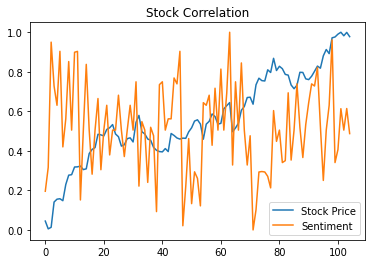

In [ ]:
plt.title('Stock Correlation')
plt.plot(df_outer['ScaledClose'], label='Stock Price')
plt.plot(df_outer['ScaledAverage'], label='Sentiment')
#plt.plot(df_outer['ScaledCompoundTweet'], label='Tweet Sentiment')
#plt.xticks(df_outer['datetime'])
plt.legend()
plt.show();

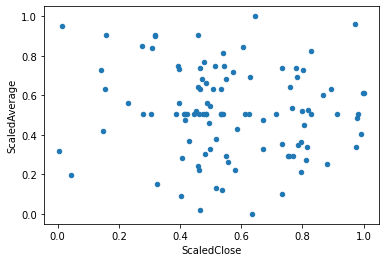

In [ ]:
df_outer.plot.scatter(x='ScaledClose',y='ScaledAverage')

In [ ]:
from scipy.stats import pearsonr
corr,_=pearsonr(df_outer.Close,df_outer.AverageCompound)
#corr1,_=pearsonr(df_outer.Close,df_outer.ScaledCompoundTweet)
print(corr)#,corr1)

-0.10379322011829194


# Multivariate LSTM using GoogleNews and Sentiment Polarity

In [ ]:
# Remote data access for pandas
import pandas_datareader as webreader #Not required
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler

In [ ]:
df_outer=df_outer.set_index('datetime')

In [ ]:
train_dfs = df_outer.copy()

## Plotting each column on dfFB

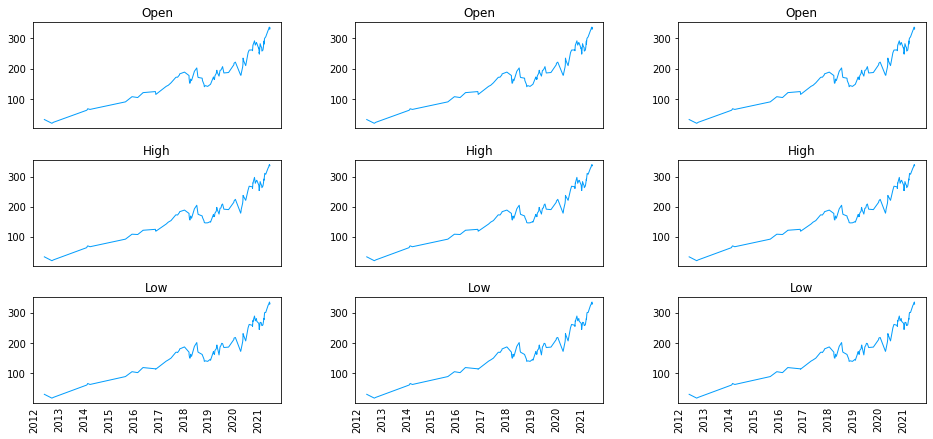

In [ ]:
# Plot each column
register_matplotlib_converters()
nrows = 3
ncols = int(round(df_outer.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x = df_outer.index

for f, i in enumerate(range(nrows)):
    for j in range(ncols):
        ax[i, j].xaxis.set_major_locator(mdates.YearLocator())
        assetname = df_outer.columns[f]
        y = df_outer[assetname]
        ax[i, j].plot(x, y, color='#039dfc', label='Facebook', linewidth=1.0)
        ax[i, j].set_title(assetname)
        ax[i, j].tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show()

## Scaling and Feature Selection

In [ ]:
# Indexing Batches
train_df = train_dfs.sort_values(by=['datetime']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,ScaledClose,AverageCompound,ScaledAverage
0,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728,-0.5574,0.195650
1,18.920000,19.580000,18.850000,19.430000,19.430000,50508200,0.005328,-0.3400,0.316280
2,22.320000,22.400000,21.410000,21.950001,21.950001,46892100,0.013227,0.8020,0.949950
3,62.049999,63.139999,61.820000,62.750000,62.750000,45985500,0.141111,0.4019,0.727944
4,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,0.2263,0.630507


In [ ]:
# List of considered Features
FEATURES = [#'High', 'Low', 'Open', 
            'ScaledClose', 
            #'Volume', 
            'AverageCompound',
            #'Year',
            #'Adj Close'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['ScaledClose', 'AverageCompound']


,ScaledClose,AverageCompound,Prediction
100,0.990315,-0.177481,0.990315
101,0.999937,0.195353,0.999937
102,0.982165,0.000000,0.982165
103,0.999185,0.196767,0.999185
104,0.977714,-0.031803,0.977714


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(105, 2)


## Transforming the data

In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(34, 50, 2) (34,)
(21, 50, 2) (21,)
0.5167063931913564
0.5167063931913564


## Train the multi-variate prediction model

### Normal LSTM

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 100 Input shape: 50 2


### Stacked LSTM (Does not produce good results)

In [ ]:
# Configure the neural network model
#model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
'''n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False)) 
model.add(Dense(1, activation='relu'))'''

# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 100 Input shape: 50 2


In [ ]:
# Training the model
epochs = 10
early_stop = EarlyStopping(monitor='loss', patience=1)
history = model.fit(x_train, y_train, 
                    batch_size=1, 
                    epochs=epochs, 
                    callbacks=[early_stop])

Epoch 1/10
34/34 [==============================] - 2s 12ms/step - loss: 0.1847
Epoch 2/10
34/34 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 3/10
34/34 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 4/10
34/34 [==============================] - 0s 12ms/step - loss: 0.0026


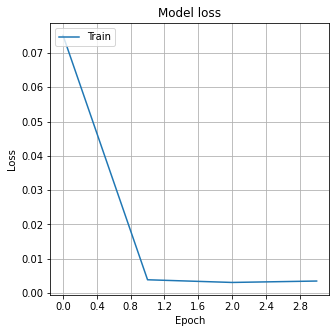

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

## Evaluate the model performance

In [ ]:
# Get the predicted values
y_pred = model.predict(x_test)
# Get the predicted values
y_pred_unscaled = scaler_pred.inverse_transform(y_pred)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.06
Mean Absolute Percentage Error (MAPE): 6.99 %
Median Absolute Percentage Error (MDAPE): 6.97 %


In [ ]:
def rev_min_max_func(scaled_val):
    max_val = max(df_outer['Close'])
    min_val = min(df_outer['Close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

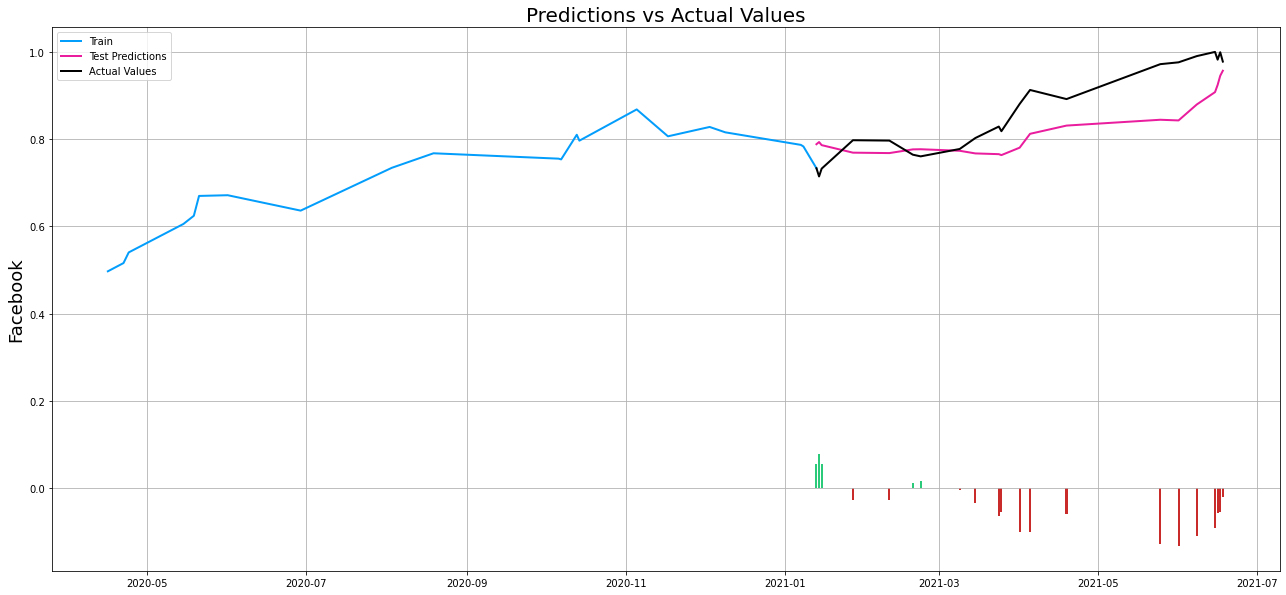

In [ ]:
# Get the predicted values
pred_unscaled = scaler_pred.inverse_transform(y_pred_unscaled)

# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", pred_unscaled.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["ScaledClose"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["ScaledClose"]]
xv = valid['Date']; yv = valid[["ScaledClose", "Prediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.ylabel("Facebook", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["ScaledClose"], color="black", linewidth=2.0)
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

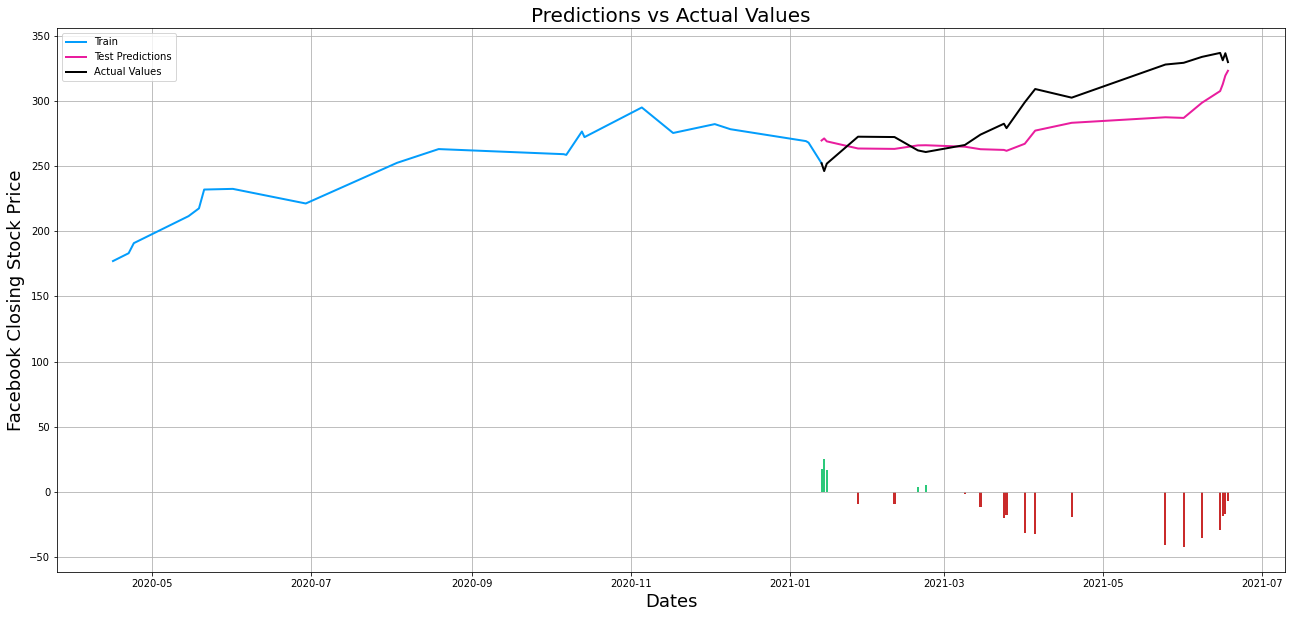

In [ ]:
# Get the predicted values
pred_unscaled = scaler_pred.inverse_transform(y_pred_unscaled)

# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
train['Inverse']=train['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid['Inverse']=valid['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Prediction", pred_unscaled.ravel(), True)
valid['InversePrediction']=valid['Prediction'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Difference", valid["InversePrediction"] - valid["Inverse"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Inverse"]]
xv = valid['Date']; yv = valid[["Inverse", "InversePrediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.xlabel("Dates", fontsize=18)
plt.ylabel("Facebook Closing Stock Price", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["InversePrediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Inverse"], color="black", linewidth=2.0)


# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")
plt.show()

## Predict the next day's price

In [ ]:
new_df = data_filtered

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list and Append past 100 days
X_test_new = []
X_test_new.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled)

# Print last price and predicted price for the next day
price_today = rev_min_max_func(round(new_df['ScaledClose'][len(new_df)-1], 2))
predicted_price = rev_min_max_func(round(pred_price_unscaled.ravel()[0], 2))
percent = round(100 - (predicted_price * 100)/price_today, 2)

plus = '+'; minus = '-'
print(f'The close price for Facebook on 21 June 2021 was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if percent > 0 else minus}{percent}%)')

The close price for Facebook on 21 June 2021 was 330.4036
The predicted close price is 336.75 (--1.92%)


# Testing a model based on Historical data (Not Facebook data)

[https://www.datacamp.com/community/tutorials/lstm-python-stock-market](https://)

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
dfAxis=pd.read_csv("AXISBANK.csv")
dfAxis.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


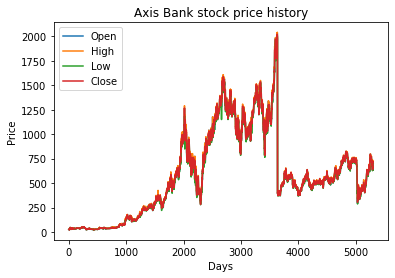

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(dfAxis["Open"])
plt.plot(dfAxis["High"])
plt.plot(dfAxis["Low"])
plt.plot(dfAxis["Close"])
plt.title('Axis Bank stock price history')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

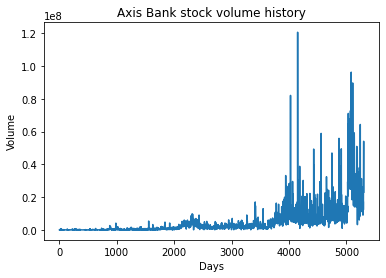

In [ ]:
plt.figure()
plt.plot(dfAxis["Volume"])
plt.title('Axis Bank stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

Checking for null values

In [ ]:
print("checking if any null values are present\n", dfAxis.isna().sum())

checking if any null values are present
 Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


In [ ]:
len(dfAxis)-0.3*len(dfAxis)

3714.2

In [ ]:
dfShort=dfAxis[['Date','Close']]

In [ ]:
training_set = dfShort.iloc[:3715, 1:2].values
test_set = dfShort.iloc[3715:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 3715):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

We have now reshaped the data into the following format (#values, #time-steps, #1 dimensional output).

In [ ]:
model = Sequential()#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
115/115 [==============================] - 19s 111ms/step - loss: 0.0351
Epoch 2/100
115/115 [==============================] - 13s 110ms/step - loss: 0.0033
Epoch 3/100
115/115 [==============================] - 13s 110ms/step - loss: 0.0032
Epoch 4/100
115/115 [==============================] - 13s 110ms/step - loss: 0.0033
Epoch 5/100
115/115 [==============================] - 13s 109ms/step - loss: 0.0044
Epoch 6/100
115/115 [==============================] - 13s 109ms/step - loss: 0.0046
Epoch 7/100
115/115 [==============================] - 13s 109ms/step - loss: 0.0025
Epoch 8/100
115/115 [==============================] - 13s 109ms/step - loss: 0.0023
Epoch 9/100
115/115 [==============================] - 13s 110ms/step - loss: 0.0024
Epoch 10/100
115/115 [==============================] - 13s 110ms/step - loss: 0.0019
Epoch 11/100
115/115 [==============================] - 13s 111ms/step - loss: 0.0016
Epoch 12/100
115/115 [==============================] - 13s 110

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = dfShort.iloc[:3715, 1:2]
dataset_test = dfShort.iloc[3715:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1651):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1591, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(1591, 1)

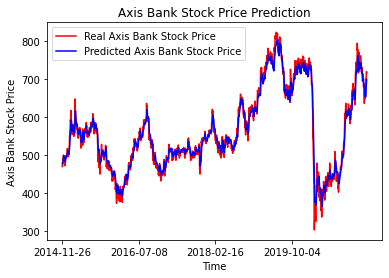

In [ ]:
# Visualising the results
plt.plot(dfShort.loc[3715:, 'Date'],dataset_test.values, color = 'red', label = 'Real Axis Bank Stock Price')
plt.plot(dfShort.loc[3715:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Axis Bank Stock Price')
plt.xticks(np.arange(0,1591,400))
plt.title('Axis Bank Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Axis Bank Stock Price')
plt.legend()
plt.show()

Huger drop than anticipated by the model in covid approximately 2020 march and more increase than expected after that

# Extracting News articles from ingovern (Not Facebook Data)

In [ ]:
from bs4 import BeautifulSoup
import requests
import urllib.request as urllib2
import pandas as pd

In [ ]:
Date = list ()
Headline = list ()
Description = list ()
Reference = list ()

In [ ]:
ingovern = 'http://www.ingovern.com/insights/news/'

In [ ]:
ingovernSoup = BeautifulSoup(urllib2.urlopen(ingovern).read())

In [ ]:
for link in ingovernSoup.findAll('a',class_= "read-more"):
  try :
        page = requests.get(link.attrs['href'], verify=False)
        soup = BeautifulSoup(page.content, 'html.parser')
        for title in soup.findAll('h2',class_='entry-title'):
          Headline.append(title.text)
        for content in soup.findAll('div',class_='entry-content'):
          story=content.text.split("\n")
          desc=''
          for i in range(1,len(story)):
            desc=desc+story[i]
          Description.append(desc)
  except requests.exceptions.RequestException:
        continue

In [ ]:
for i in range(len(Headline)):
  print(Headline[i])
  print(Description[i])
  #print(Reference[i])
  print()

US$113b Tata empire faces tough decisions over airlines
 “Airlines are very competitive and capital intensive and running one is difficult,” said Shriram Subramanian, founder of proxy advisory firm InGovern Research Services. “Tata Group invested in two with two different partners. It’s not clear what the group was trying to achieve.”https://www.dailyexpress.com.my/news/162859/us-113b-tata-empire-faces-tough-decisions-over-airlines/

Tata, Mistry spar over a $13 billion valuation difference
 “This is on expected lines,” said Shriram Subramanian, founder of proxy advisory firm InGovern Research Services Pvt., adding that bridging such a wide valuation gap is going to be difficult. “There is a long way of negotiations before they iron out issues.”https://www.business-standard.com/article/companies/tata-mistry-spar-over-a-13-billion-valuation-difference-120120800980_1.html 

Jet 2.0: Flight of fancy
 In October, a resolution plan by Murari Lal Jalan and Kalrock Capital—with an investment 

In [ ]:
dfIngovern = pd.DataFrame(list(zip(Headline,Description)),
               columns =['Headline','Description'])
dfIngovern

,Headline,Description
0,US$113b Tata empire faces tough decisions over...,“Airlines are very competitive and capital in...
1,"Tata, Mistry spar over a $13 billion valuation...","“This is on expected lines,” said Shriram Sub..."
2,Jet 2.0: Flight of fancy,"In October, a resolution plan by Murari Lal J..."
3,"Who are Rishi Sunak’s in-laws, the Indian entr...",Shriram Subramaniam of InGovern says: “At that...
4,Gautam Thapar: Victim Or Villain?,The InGovern report noted: “During the invest...
...,...,...
95,How Infosys became the darling of investors,"On 14 June 1993, a Bengaluru-based company, wi..."
96,Minority shareholders question Century Textile...,Not everyone is happy with UltraTech Cement’s ...
97,ICICI board recast to further unsettle investo...,"Talking to ET Now, Shriram Subramanium, founde..."
98,"Videocon case: Pushed to a corner, ICICI Bank ...",The bank’s move is notable because barely a mo...


In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
# Iterate through the headlines and get the polarity scores using vader
scores = dfIngovern['Description'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
dfIngovern = dfIngovern.join(scores_df, rsuffix='_right')

dfIngovern

,Headline,Description,neg,neu,pos,compound
0,US$113b Tata empire faces tough decisions over...,“Airlines are very competitive and capital in...,0.049,0.905,0.045,-0.0493
1,"Tata, Mistry spar over a $13 billion valuation...","“This is on expected lines,” said Shriram Sub...",0.060,0.940,0.000,-0.3612
2,Jet 2.0: Flight of fancy,"In October, a resolution plan by Murari Lal J...",0.021,0.921,0.057,0.5719
3,"Who are Rishi Sunak’s in-laws, the Indian entr...",Shriram Subramaniam of InGovern says: “At that...,0.052,0.948,0.000,-0.2960
4,Gautam Thapar: Victim Or Villain?,The InGovern report noted: “During the invest...,0.061,0.939,0.000,-0.5696
...,...,...,...,...,...,...
95,How Infosys became the darling of investors,"On 14 June 1993, a Bengaluru-based company, wi...",0.031,0.867,0.102,0.9960
96,Minority shareholders question Century Textile...,Not everyone is happy with UltraTech Cement’s ...,0.029,0.826,0.145,0.9969
97,ICICI board recast to further unsettle investo...,"Talking to ET Now, Shriram Subramanium, founde...",0.146,0.754,0.099,-0.9220
98,"Videocon case: Pushed to a corner, ICICI Bank ...",The bank’s move is notable because barely a mo...,0.028,0.923,0.049,0.7735


In [ ]:
dfIngovern.to_csv('ingovern.csv')

**Note**


*   Bajaj Finance Limited, a subsidiary of Bajaj Finserv, is an Indian non-banking financial company (NBFC). The company deals in consumer finance, SME (small and medium-sized enterprises) and commercial lending, and wealth management.
*   HDFC is the parent company which is specialised in Home loans and Mortgage loans. Where HDFC bank is the banking arm with wholesale, retail and business



In [ ]:
nifty50={'adaniports':['Adani Ports'],'asianpaint':['Asian Paints'],'axisbank':['Axis Bank'],
         'bajajauto':['Bajaj Auto'],'bajajfinsv':['Bajaj Finserv'],'bajajfinance':['Bajaj Finance'],'bhartiartl':['Bharti Airtel'],'bpcl':['Bharat Petroleum','Oil & Gas Companies India'],'britannia':['Britannia'],
         'cipla':['Cipla'],'coalindia':['Coal India'],
         'drreddy':["Dr. Reddy's Laboratories"],'eichermot':['Eicher Motors'],
         'gail':['GAIL'],'grasim':['Grasim'],
         'hcltech':['HCL Technologies'],'hdfc':['HDFC'],'hdfcbank':['HDFC Bank'],'heromotoco':['Hero MotoCorp'],'hindalco':['Hindalco'],'hindunilvr':['Hindustan Unilever'],
         'icicibank':['ICICI Bank'],'indusindbk':['IndusInd Bank'],'infratel':['Indus Towers','Bharti Infratel'],'infy':['Infosys'],'ioc':['Indian Oil Corporation'],'itc':['ITC'],
         'jswsteel':['JSW Steel'],'kotakbank':['Kotak Mahindra Bank'],'lt':['Larsen & Toubro'],
         'maruti':['Maruti Suziki'],'mm':['Mahindra & Mahindra'],
         'nestleind':['Nestle India'],'ntpc':['NTPC'],
         'ongc':['Oil & Natural Gas Corporation'],'powergrid':['Power Grid'],'reliance':['Reliance'],
         'sbin':['State Bank of India','SBI'],'shreecem':['Shree Cement'],'sunpharma':['Sun Pharmaceutical'],
         'tatamotors':['Tata Motors','Tata'],'tatasteel':['Tata Steel','Tata'],'tcs':['TCS','Tata Consultancy Services','Tata'],'techm':['Tech Mahindra'],'titan':['Titan'],
         'ultracemco':['UltraTech Cement'],'upl':['UPL'],
         'vedl':['Vedanta'],'wipro':['Wipro'],'zeel':['Zee Entertainment']}

In [ ]:
classification=dict()

In [ ]:
for i in nifty50:
  classification[i]=[]

In [ ]:
unclassified = list ()

In [ ]:
for i in range(len(dfIngovern)):
  flag=0
  for j in nifty50:
    for k in nifty50[j]:
      if((k in dfIngovern.Headline[i]) or (k in dfIngovern.Description[i])):
        classification[j].append([dfIngovern.Headline[i],dfIngovern.Description[i]])
        flag=1
        break
  if (flag==0):
    unclassified.append([dfIngovern.Headline[i],dfIngovern.Description[i]])

In [ ]:
len(unclassified)

60

In [ ]:
unclassified

[['Jet 2.0: Flight of fancy',
  ' In October, a resolution plan by Murari Lal Jalan and Kalrock Capital—with an investment that’s pegged at ₹2,000 crore in reviving the airline—was approved by the airlines’ creditors. The plan was then put forth to the NCLT for its approval. “The release [from the new investors] seems to be putting some pressure on the resolution professional and the government to sort of work towards some timelines,” says Shriram Subramanian, founder and managing director, InGovern Research Services, a corporate governance advisory firm. “If someone is willing to plonk ₹2,000 crore, you give them the company tomorrow to start operations,” adds Subramanian.https://www.fortuneindia.com/enterprise/jet-20-flight-of-fancy/104916'],
 ['Gautam Thapar: Victim Or Villain?',
  ' The InGovern report noted: “During the investigations by SEBI, (the) SFIO and restatement of accounts, KKR was exiting its holdings in the company. So, it is not clear as to why KKR, which triggered in 

In [ ]:
classification

{'adaniports': [],
 'asianpaint': [],
 'axisbank': [],
 'bajajauto': [],
 'bajajfinance': [],
 'bajajfinsv': [],
 'bhartiartl': [],
 'bpcl': [],
 'britannia': [['Britannia violated listing norms in not reporting Ness Wadia’s arrest: InGovern',
   ' InGovern said a company has to report any fraud, default by promoter or arrest of key managerial persons or promoters as it is a material event.https://economictimes.indiatimes.com/markets/stocks/news/britannia-violated-listing-norms-in-not-reporting-ness-wadias-arrest-ingovern/articleshow/69205903.cms'],
  ['Britannia violated SEBI listing norms on Wadia arrest: InGovern',
   ' “Britannia is in violation of Sebi’s listing obligations and disclosure requirements (LODR). The arrest of the promoter should have been disclosed by the company to the exchanges, which was not done,” InGovern founder Shriram Subramanian told IANS in an interview.https://www.moneylife.in/article/britannia-violated-sebi-listing-norms-on-wadia-arrest-ingovern/57086.htm

# Macrotrends

In [ ]:
import pandas as pd
from urllib.request import Request, urlopen
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

In [ ]:
trends_attributes = list ()
trends_correlation = list ()

## Adding dfFB

### Reading and pre-processing of data

In [ ]:
dfFB=pd.read_csv('/content/drive/MyDrive/week2/FB.csv')
dfFB=dfFB.rename(columns={'Date':'datetime'})
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100


### Scaling

In [ ]:
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])

## Diluted Earnings per share

### Reading the webpage

In [ ]:
earnings_per_share='https://www.macrotrends.net/stocks/charts/FB/facebook/eps-earnings-per-share-diluted'
req = Request(earnings_per_share)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the dataframe required

In [ ]:
dfs

[    Facebook Annual EPS Facebook Annual EPS.1
 0                  2020                $10.09
 1                  2019                 $6.43
 2                  2018                 $7.57
 3                  2017                 $5.39
 4                  2016                 $3.49
 5                  2015                 $1.29
 6                  2014                 $1.10
 7                  2013                 $0.60
 8                  2012                 $0.01
 9                  2011                 $0.46
 10                 2010                 $0.28
 11                 2009                 $0.10
 12                 2008                $-0.06
 13                 2007                $-0.16,
    Facebook Quarterly EPS Facebook Quarterly EPS.1
 0              2021-03-31                    $3.30
 1              2020-12-31                    $3.87
 2              2020-09-30                    $2.71
 3              2020-06-30                    $1.80
 4              2020-03-31        

In [ ]:
dfEPS=dfs[1]
dfEPS

,Facebook Quarterly EPS,Facebook Quarterly EPS.1
0,2021-03-31,$3.30
1,2020-12-31,$3.87
2,2020-09-30,$2.71
3,2020-06-30,$1.80
4,2020-03-31,$1.71
5,2019-12-31,$2.55
6,2019-09-30,$2.12
7,2019-06-30,$0.91
8,2019-03-31,$0.85
9,2018-12-31,$2.38


### Data preprocessing

In [ ]:
dfEPS['datetime']=pd.to_datetime(dfEPS['Facebook Quarterly EPS']).dt.date
type(dfEPS.datetime[0])

datetime.date

In [ ]:
type(dfEPS['Facebook Quarterly EPS.1'][0])

str

In [ ]:
dfEPS['QuarterlyEps']=dfEPS['Facebook Quarterly EPS.1'].str.lstrip('$').astype(float)

In [ ]:
dfEPS.head()

,Facebook Quarterly EPS,Facebook Quarterly EPS.1,datetime,QuarterlyEps
0,2021-03-31,$3.30,2021-03-31,3.30
1,2020-12-31,$3.87,2020-12-31,3.87
2,2020-09-30,$2.71,2020-09-30,2.71
3,2020-06-30,$1.80,2020-06-30,1.80
4,2020-03-31,$1.71,2020-03-31,1.71


In [ ]:
dfEPS[["ScaledEPS"]] = scaler.fit_transform(dfEPS[["QuarterlyEps"]])
dfEPS

,Facebook Quarterly EPS,Facebook Quarterly EPS.1,datetime,QuarterlyEps,ScaledEPS
0,2021-03-31,$3.30,2021-03-31,3.30,0.855696
1,2020-12-31,$3.87,2020-12-31,3.87,1.000000
2,2020-09-30,$2.71,2020-09-30,2.71,0.706329
3,2020-06-30,$1.80,2020-06-30,1.80,0.475949
4,2020-03-31,$1.71,2020-03-31,1.71,0.453165
5,2019-12-31,$2.55,2019-12-31,2.55,0.665823
6,2019-09-30,$2.12,2019-09-30,2.12,0.556962
7,2019-06-30,$0.91,2019-06-30,0.91,0.250633
8,2019-03-31,$0.85,2019-03-31,0.85,0.235443
9,2018-12-31,$2.38,2018-12-31,2.38,0.622785


In [ ]:
df_outerEPS = pd.merge(dfFB, dfEPS[['datetime','ScaledEPS']],on='datetime')
df_outerEPS

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledEPS
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.027848
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.063291
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.073418
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.083544
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.096203
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.096203
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.083544
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.065823
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.083544
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.098734


### Correlation

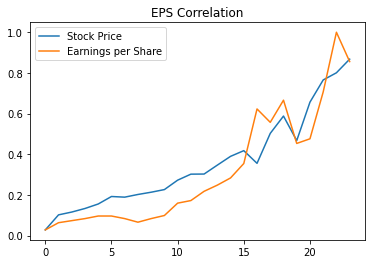

In [ ]:
plt.title('EPS Correlation')
plt.plot(df_outerEPS['ScaledClose'], label='Stock Price')
plt.plot(df_outerEPS['ScaledEPS'], label='Earnings per Share')
plt.legend()
plt.show();

In [ ]:
corrEPS,_=pearsonr(df_outerEPS.ScaledClose,df_outerEPS.ScaledEPS)
corrEPS

0.9366397046100028

In [ ]:
trends_attributes.append('Diluted Earnings per Share')
trends_correlation.append(corrEPS)

## PE Ratio

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


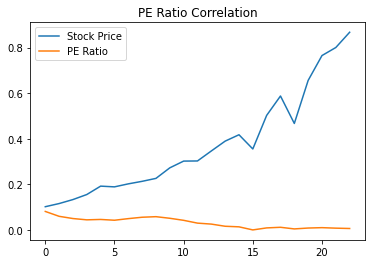

-0.8126991106294986

In [ ]:
# Reading the webpage
pe_ratio='https://www.macrotrends.net/stocks/charts/FB/facebook/pe-ratio'
req = Request(pe_ratio)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

# Choosing the dataframe required
dfPE=dfs[0]
dfPE

#Data Preprocessing
dfPE['datetime']=pd.to_datetime(dfPE[('Facebook PE Ratio Historical Data','Date')]).dt.date
type(dfPE.datetime[0])

dfPE['QuarterlyPE']=dfPE[('Facebook PE Ratio Historical Data',    'PE Ratio')].astype(float)

dfPE["ScaledPE"] = scaler.fit_transform(dfPE[('QuarterlyPE','')].to_numpy().reshape(-1,1))

df_outerPE = pd.merge(dfFB, dfPE[['datetime','ScaledPE']],on='datetime')

#Correlation
plt.title('PE Ratio Correlation')
plt.plot(df_outerPE['ScaledClose'], label='Stock Price')
plt.plot(df_outerPE[('ScaledPE','')], label='PE Ratio')
plt.legend()
plt.show();

corrPE,_=pearsonr(df_outerPE.ScaledClose,df_outerPE[('ScaledPE','')])
corrPE

In [ ]:
trends_attributes.append('PE Ratio')
trends_correlation.append(corrPE)

## Net income

### Reading the webpage

In [ ]:
net_income='https://www.macrotrends.net/stocks/charts/FB/facebook/net-income'
req = Request(net_income)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the dataframe

In [ ]:
dfNetIncome=dfs[1]
dfNetIncome

,Facebook Quarterly Net Income(Millions of US $),Facebook Quarterly Net Income(Millions of US $).1
0,2021-03-31,"$9,497"
1,2020-12-31,"$11,220"
2,2020-09-30,"$7,846"
3,2020-06-30,"$5,178"
4,2020-03-31,"$4,902"
5,2019-12-31,"$7,349"
6,2019-09-30,"$6,091"
7,2019-06-30,"$2,616"
8,2019-03-31,"$2,429"
9,2018-12-31,"$6,881"


### Data preprocessing

In [ ]:
dfNetIncome['datetime']=pd.to_datetime(dfNetIncome['Facebook Quarterly Net Income(Millions of US $)']).dt.date
type(dfNetIncome.datetime[0])

datetime.date

In [ ]:
dfNetIncome['QuarterlyNetIncome']=dfNetIncome['Facebook Quarterly Net Income(Millions of US $).1'].str.lstrip('$')
for i in range(len(dfNetIncome.QuarterlyNetIncome)):
  if(isinstance(dfNetIncome.QuarterlyNetIncome[i],str)):
    dfNetIncome.QuarterlyNetIncome[i]=dfNetIncome.QuarterlyNetIncome[i].replace(',','')
    dfNetIncome.QuarterlyNetIncome[i]=float(dfNetIncome.QuarterlyNetIncome[i])

In [ ]:
type(dfNetIncome['QuarterlyNetIncome'][0])

float

In [ ]:
dfNetIncome.head()

,Facebook Quarterly Net Income(Millions of US $),Facebook Quarterly Net Income(Millions of US $).1,datetime,QuarterlyNetIncome
0,2021-03-31,"$9,497",2021-03-31,9497
1,2020-12-31,"$11,220",2020-12-31,11220
2,2020-09-30,"$7,846",2020-09-30,7846
3,2020-06-30,"$5,178",2020-06-30,5178
4,2020-03-31,"$4,902",2020-03-31,4902


In [ ]:
dfNetIncome[["ScaledNetIncome"]] = scaler.fit_transform(dfNetIncome[["QuarterlyNetIncome"]])
dfNetIncome

,Facebook Quarterly Net Income(Millions of US $),Facebook Quarterly Net Income(Millions of US $).1,datetime,QuarterlyNetIncome,ScaledNetIncome
0,2021-03-31,"$9,497",2021-03-31,9497,0.848554
1,2020-12-31,"$11,220",2020-12-31,11220,1.000000
2,2020-09-30,"$7,846",2020-09-30,7846,0.703437
3,2020-06-30,"$5,178",2020-06-30,5178,0.468929
4,2020-03-31,"$4,902",2020-03-31,4902,0.444669
5,2019-12-31,"$7,349",2019-12-31,7349,0.659752
6,2019-09-30,"$6,091",2019-09-30,6091,0.549178
7,2019-06-30,"$2,616",2019-06-30,2616,0.243737
8,2019-03-31,"$2,429",2019-03-31,2429,0.227301
9,2018-12-31,"$6,881",2018-12-31,6881,0.618617


In [ ]:
dfNetIncome=dfNetIncome.dropna()

In [ ]:
dfNetIncome

,Facebook Quarterly Net Income(Millions of US $),Facebook Quarterly Net Income(Millions of US $).1,datetime,QuarterlyNetIncome,ScaledNetIncome
0,2021-03-31,"$9,497",2021-03-31,9497,0.848554
1,2020-12-31,"$11,220",2020-12-31,11220,1.000000
2,2020-09-30,"$7,846",2020-09-30,7846,0.703437
3,2020-06-30,"$5,178",2020-06-30,5178,0.468929
4,2020-03-31,"$4,902",2020-03-31,4902,0.444669
5,2019-12-31,"$7,349",2019-12-31,7349,0.659752
6,2019-09-30,"$6,091",2019-09-30,6091,0.549178
7,2019-06-30,"$2,616",2019-06-30,2616,0.243737
8,2019-03-31,"$2,429",2019-03-31,2429,0.227301
9,2018-12-31,"$6,881",2018-12-31,6881,0.618617


In [ ]:
df_outerNetIncome = pd.merge(dfFB, dfNetIncome[['datetime','ScaledNetIncome']],on='datetime')
df_outerNetIncome

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledNetIncome
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.019425
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.050892
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.059594
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.069966
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.083062
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.084293
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.074976
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.058539
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.076646
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.092116


### Correlation

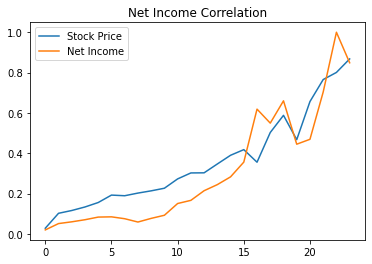

In [ ]:
plt.title('Net Income Correlation')
plt.plot(df_outerNetIncome['ScaledClose'], label='Stock Price')
plt.plot(df_outerNetIncome['ScaledNetIncome'], label='Net Income')
plt.legend()
plt.show();

In [ ]:
corrNetIncome,_=pearsonr(df_outerNetIncome.ScaledClose,df_outerNetIncome.ScaledNetIncome)
corrNetIncome

0.9373908966717267

In [ ]:
trends_attributes.append('Net Income')
trends_correlation.append(corrNetIncome)

In [ ]:
trends_correlation

[0.9366397046100028, -0.8126991106294986, 0.9373908966717267]

## Return on Equity

### Reading the webpage

In [ ]:
roe='https://www.macrotrends.net/stocks/charts/FB/facebook/roe'
req = Request(roe)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the dataframe

In [ ]:
dfs

[   Facebook ROE - Return on Equity Historical Data  ...                 
                                               Date  ... Return on Equity
 0                                       2021-03-31  ...           27.54%
 1                                       2020-12-31  ...           25.25%
 2                                       2020-09-30  ...           23.27%
 3                                       2020-06-30  ...           22.90%
 4                                       2020-03-31  ...           21.54%
 5                                       2019-12-31  ...           19.97%
 6                                       2019-09-30  ...           20.39%
 7                                       2019-06-30  ...           20.09%
 8                                       2019-03-31  ...           23.67%
 9                                       2018-12-31  ...           27.51%
 10                                      2018-09-30  ...           25.02%
 11                                   

In [ ]:
dfroe=dfs[0]
dfroe

Facebook ROE - Return on Equity Historical Data  ...                 
                                              Date  ... Return on Equity
0                                       2021-03-31  ...           27.54%
1                                       2020-12-31  ...           25.25%
2                                       2020-09-30  ...           23.27%
3                                       2020-06-30  ...           22.90%
4                                       2020-03-31  ...           21.54%
5                                       2019-12-31  ...           19.97%
6                                       2019-09-30  ...           20.39%
7                                       2019-06-30  ...           20.09%
8                                       2019-03-31  ...           23.67%
9                                       2018-12-31  ...           27.51%
10                                      2018-09-30  ...           25.02%
11                                      2018-06-30  ...           25.20%
12                                      2018-03-31  ...           24.65%
13                                      2017-12-31  ...           23.22%
14                                      2017-09-30  ...           23.49%
15                                      2017-06-30  ...           21.70%
16                                      2017-03-31  ...           20.39%
17                                      2016-12-31  ...           19.33%
18                                      2016-09-30  ...           16.71%
19                                      2016-06-30  ...           14.09%
20                                      2016-03-31  ...           11.36%
21                                      2015-12-31  ...            9.03%
22                                      2015-09-30  ...            7.28%
23                                      2015-06-30  ...            8.11%
24                                      2015-03-31  ...            9.88%
25                                      2014-12-31  ...           12.66%
26                                      2014-09-30  ...           15.32%
27                                      2014-06-30  ...           14.91%
28                                      2014-03-31  ...           13.28%
29                                      2013-12-31  ...           11.32%
30                                      2013-09-30  ...            8.44%
31                                      2013-06-30  ...            4.41%
32                                      2013-03-31  ...            0.51%
33                                      2012-12-31  ...           -0.13%
34                                      2012-09-30  ...            1.34%
35                                      2012-06-30  ...            5.71%
36                                      2012-03-31  ...           25.60%
37                                      2011-12-31  ...           54.46%
38                                      2011-09-30  ...          131.91%
39                                      2011-06-30  ...          128.40%
40                                      2011-03-31  ...          122.85%
41                                      2010-12-31  ...          112.12%

[42 rows x 4 columns]

### Data preprocessing

In [ ]:
dfroe.columns[0][1]

'Date'

In [ ]:
dfroe.columns=['_'.join(col) if type(col) is tuple else col for col in dfroe.columns.values]

In [ ]:
dfroe.columns

Index(['Facebook ROE - Return on Equity Historical Data_Date',
       'Facebook ROE - Return on Equity Historical Data_TTM Net Income',
       'Facebook ROE - Return on Equity Historical Data_Shareholder's Equity',
       'Facebook ROE - Return on Equity Historical Data_Return on Equity'],
      dtype='object')

In [ ]:
dfroe['datetime']=pd.to_datetime(dfroe['Facebook ROE - Return on Equity Historical Data_Date']).dt.date
type(dfroe.datetime[0])

datetime.date

In [ ]:
dfroe['QuarterlyROE']=dfroe['Facebook ROE - Return on Equity Historical Data_Return on Equity'].str.rstrip('%').astype(float)
type(dfroe['QuarterlyROE'][0])

numpy.float64

In [ ]:
dfroe.head()

,Facebook ROE - Return on Equity Historical Data_Date,Facebook ROE - Return on Equity Historical Data_TTM Net Income,Facebook ROE - Return on Equity Historical Data_Shareholder's Equity,Facebook ROE - Return on Equity Historical Data_Return on Equity,datetime,QuarterlyROE
0,2021-03-31,$33.74B,$133.66B,27.54%,2021-03-31,27.54
1,2020-12-31,$29.15B,$128.29B,25.25%,2020-12-31,25.25
2,2020-09-30,$25.28B,$117.73B,23.27%,2020-09-30,23.27
3,2020-06-30,$23.52B,$110.45B,22.90%,2020-06-30,22.90
4,2020-03-31,$20.96B,$105.30B,21.54%,2020-03-31,21.54


In [ ]:
dfroe[["ScaledROE"]] = scaler.fit_transform(dfroe[["QuarterlyROE"]])
dfroe

,Facebook ROE - Return on Equity Historical Data_Date,Facebook ROE - Return on Equity Historical Data_TTM Net Income,Facebook ROE - Return on Equity Historical Data_Shareholder's Equity,Facebook ROE - Return on Equity Historical Data_Return on Equity,datetime,QuarterlyROE,ScaledROE
0,2021-03-31,$33.74B,$133.66B,27.54%,2021-03-31,27.54,0.209558
1,2020-12-31,$29.15B,$128.29B,25.25%,2020-12-31,25.25,0.192214
2,2020-09-30,$25.28B,$117.73B,23.27%,2020-09-30,23.27,0.177219
3,2020-06-30,$23.52B,$110.45B,22.90%,2020-06-30,22.90,0.174417
4,2020-03-31,$20.96B,$105.30B,21.54%,2020-03-31,21.54,0.164117
5,2019-12-31,$18.49B,$101.05B,19.97%,2019-12-31,19.97,0.152227
6,2019-09-30,$18.02B,$94.00B,20.39%,2019-09-30,20.39,0.155407
7,2019-06-30,$17.06B,$88.76B,20.09%,2019-06-30,20.09,0.153135
8,2019-03-31,$19.55B,$86.52B,23.67%,2019-03-31,23.67,0.180248
9,2018-12-31,$22.11B,$84.13B,27.51%,2018-12-31,27.51,0.209331


In [ ]:
df_outerROE = pd.merge(dfFB, dfroe[['datetime','ScaledROE']],on='datetime')
df_outerROE

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledROE
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.000000
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.064905
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.086716
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.101560
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.113905
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.117010
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.096865
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.075810
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.062405
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.056119


### Correlation

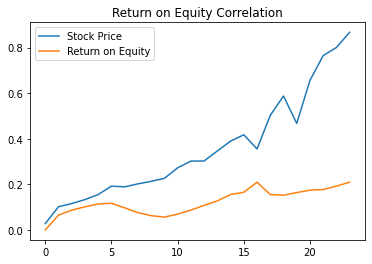

In [ ]:
plt.title('Return on Equity Correlation')
plt.plot(df_outerROE['ScaledClose'], label='Stock Price')
plt.plot(df_outerROE['ScaledROE'], label='Return on Equity')
plt.legend()
plt.show();

In [ ]:
corrROE,_=pearsonr(df_outerROE.ScaledClose,df_outerROE.ScaledROE)
corrROE

0.8232586181012392

In [ ]:
trends_attributes.append('Return on Equity')
trends_correlation.append(corrROE)

## Return on Assets

### Reading the webpage

In [ ]:
roa='https://www.macrotrends.net/stocks/charts/FB/facebook/roa'
req = Request(roa)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the dataframe

In [ ]:
dfs

[   Facebook ROA - Return on Assets Historical Data  ...                 
                                               Date  ... Return on Assets
 0                                       2021-03-31  ...           22.16%
 1                                       2020-12-31  ...           19.97%
 2                                       2020-09-30  ...           18.12%
 3                                       2020-06-30  ...           17.56%
 4                                       2020-03-31  ...           16.34%
 5                                       2019-12-31  ...           15.27%
 6                                       2019-09-30  ...           16.08%
 7                                       2019-06-30  ...           16.40%
 8                                       2019-03-31  ...           20.08%
 9                                       2018-12-31  ...           23.97%
 10                                      2018-09-30  ...           21.89%
 11                                   

In [ ]:
dfroa=dfs[0]
dfroa.columns

MultiIndex([('Facebook ROA - Return on Assets Historical Data', ...),
            ('Facebook ROA - Return on Assets Historical Data', ...),
            ('Facebook ROA - Return on Assets Historical Data', ...),
            ('Facebook ROA - Return on Assets Historical Data', ...)],
           )

### Data preprocessing

In [ ]:
dfroa.columns=['_'.join(col) if type(col) is tuple else col for col in dfroa.columns.values]

In [ ]:
dfroa.columns

Index(['Facebook ROA - Return on Assets Historical Data_Date',
       'Facebook ROA - Return on Assets Historical Data_TTM Net Income',
       'Facebook ROA - Return on Assets Historical Data_Total Assets',
       'Facebook ROA - Return on Assets Historical Data_Return on Assets'],
      dtype='object')

In [ ]:
dfroa['datetime']=pd.to_datetime(dfroa['Facebook ROA - Return on Assets Historical Data_Date']).dt.date
type(dfroa.datetime[0])

datetime.date

In [ ]:
dfroa['QuarterlyROA']=dfroa['Facebook ROA - Return on Assets Historical Data_Return on Assets'].str.rstrip('%').astype(float)
type(dfroa['QuarterlyROA'][0])

numpy.float64

In [ ]:
dfroa[["ScaledROA"]] = scaler.fit_transform(dfroa[["QuarterlyROA"]])
dfroa

,Facebook ROA - Return on Assets Historical Data_Date,Facebook ROA - Return on Assets Historical Data_TTM Net Income,Facebook ROA - Return on Assets Historical Data_Total Assets,Facebook ROA - Return on Assets Historical Data_Return on Assets,datetime,QuarterlyROA,ScaledROA
0,2021-03-31,$33.74B,$163.52B,22.16%,2021-03-31,22.16,0.233218
1,2020-12-31,$29.15B,$159.32B,19.97%,2020-12-31,19.97,0.210284
2,2020-09-30,$25.28B,$146.44B,18.12%,2020-09-30,18.12,0.190910
3,2020-06-30,$23.52B,$139.69B,17.56%,2020-06-30,17.56,0.185046
4,2020-03-31,$20.96B,$138.37B,16.34%,2020-03-31,16.34,0.172269
5,2019-12-31,$18.49B,$133.38B,15.27%,2019-12-31,15.27,0.161064
6,2019-09-30,$18.02B,$124.42B,16.08%,2019-09-30,16.08,0.169547
7,2019-06-30,$17.06B,$117.01B,16.40%,2019-06-30,16.40,0.172898
8,2019-03-31,$19.55B,$109.48B,20.08%,2019-03-31,20.08,0.211436
9,2018-12-31,$22.11B,$97.33B,23.97%,2018-12-31,23.97,0.252173


In [ ]:
df_outerROA = pd.merge(dfFB, dfroa[['datetime','ScaledROA']],on='datetime')
df_outerROA

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledROA
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.000000
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.072259
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.099173
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.119698
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.137815
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.141795
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.119070
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.093413
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.076971
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.069431


### Correlation

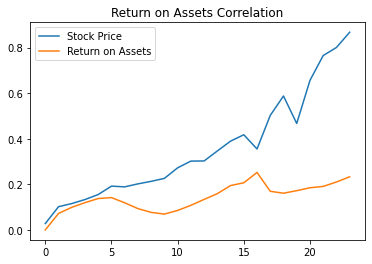

In [ ]:
plt.title('Return on Assets Correlation')
plt.plot(df_outerROA['ScaledClose'], label='Stock Price')
plt.plot(df_outerROA['ScaledROA'], label='Return on Assets')
plt.legend()
plt.show();

In [ ]:
corrROA,_=pearsonr(df_outerROA.ScaledClose,df_outerROA.ScaledROA)
corrROA

0.7582793442251459

In [ ]:
trends_attributes.append('Return on Assets')
trends_correlation.append(corrROA)

## Revenue

### Reading the webpage

In [ ]:
revenue='https://www.macrotrends.net/stocks/charts/FB/facebook/revenue'
req = Request(revenue)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the dataframe

In [ ]:
dfs

[    Facebook Annual Revenue(Millions of US $) Facebook Annual Revenue(Millions of US $).1
 0                                        2020                                     $85,965
 1                                        2019                                     $70,697
 2                                        2018                                     $55,838
 3                                        2017                                     $40,653
 4                                        2016                                     $27,638
 5                                        2015                                     $17,928
 6                                        2014                                     $12,466
 7                                        2013                                      $7,872
 8                                        2012                                      $5,089
 9                                        2011                                      $3,711

In [ ]:
dfrevenue=dfs[1]
dfrevenue

,Facebook Quarterly Revenue(Millions of US $),Facebook Quarterly Revenue(Millions of US $).1
0,2021-03-31,"$26,171"
1,2020-12-31,"$28,071"
2,2020-09-30,"$21,470"
3,2020-06-30,"$18,687"
4,2020-03-31,"$17,737"
5,2019-12-31,"$21,082"
6,2019-09-30,"$17,652"
7,2019-06-30,"$16,886"
8,2019-03-31,"$15,077"
9,2018-12-31,"$16,914"


### Data preprocessing

In [ ]:
dfrevenue=dfrevenue.dropna()

In [ ]:
dfrevenue.columns

Index(['Facebook Quarterly Revenue(Millions of US $)', 'Facebook Quarterly Revenue(Millions of US $).1'], dtype='object')

In [ ]:
dfrevenue['datetime']=pd.to_datetime(dfrevenue['Facebook Quarterly Revenue(Millions of US $)']).dt.date
type(dfrevenue.datetime[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datetime.date

In [ ]:
dfrevenue['QuarterlyRevenue']=dfrevenue['Facebook Quarterly Revenue(Millions of US $).1'].str.lstrip('$')
for i in range(len(dfrevenue.QuarterlyRevenue)):
  if(isinstance(dfrevenue.QuarterlyRevenue[i],str)):
    dfrevenue.QuarterlyRevenue[i]=dfrevenue.QuarterlyRevenue[i].replace(',','')
    dfrevenue.QuarterlyRevenue[i]=float(dfrevenue.QuarterlyRevenue[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dfrevenue[["ScaledRevenue"]] = scaler.fit_transform(dfrevenue[["QuarterlyRevenue"]])
dfrevenue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Facebook Quarterly Revenue(Millions of US $),Facebook Quarterly Revenue(Millions of US $).1,datetime,QuarterlyRevenue,ScaledRevenue
0,2021-03-31,"$26,171",2021-03-31,26171,0.931472
1,2020-12-31,"$28,071",2020-12-31,28071,1.000000
2,2020-09-30,"$21,470",2020-09-30,21470,0.761920
3,2020-06-30,"$18,687",2020-06-30,18687,0.661545
4,2020-03-31,"$17,737",2020-03-31,17737,0.627281
5,2019-12-31,"$21,082",2019-12-31,21082,0.747926
6,2019-09-30,"$17,652",2019-09-30,17652,0.624216
7,2019-06-30,"$16,886",2019-06-30,16886,0.596588
8,2019-03-31,"$15,077",2019-03-31,15077,0.531342
9,2018-12-31,"$16,914",2018-12-31,16914,0.597598


In [ ]:
df_outerRevenue = pd.merge(dfFB, dfrevenue[['datetime','ScaledRevenue']],on='datetime')
df_outerRevenue

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledRevenue
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.044723
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.060268
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.080791
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.077797
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.092512
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.103080
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.126452
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.115343
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.133341
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.149895


### Correlation

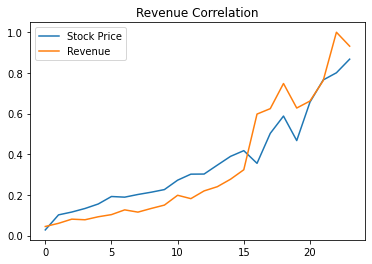

In [ ]:
plt.title('Revenue Correlation')
plt.plot(df_outerRevenue['ScaledClose'], label='Stock Price')
plt.plot(df_outerRevenue['ScaledRevenue'], label='Revenue')
plt.legend()
plt.show();

In [ ]:
corrRevenue,_=pearsonr(df_outerRevenue.ScaledClose,df_outerRevenue.ScaledRevenue)
corrRevenue

0.9528330072322454

In [ ]:
trends_attributes.append('Revenue')
trends_correlation.append(corrRevenue)

## Shares Outstanding

### Reading the webpage

In [ ]:
shares_outstanding='https://www.macrotrends.net/stocks/charts/FB/facebook/shares-outstanding'
req = Request(shares_outstanding)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

### Choosing the Dataframe

In [ ]:
dfs

[    Facebook Annual Shares Outstanding(Millions of Shares)  Facebook Annual Shares Outstanding(Millions of Shares).1
 0                                                2020                                                    2888       
 1                                                2019                                                    2876       
 2                                                2018                                                    2921       
 3                                                2017                                                    2956       
 4                                                2016                                                    2925       
 5                                                2015                                                    2853       
 6                                                2014                                                    2664       
 7                                                2013  

In [ ]:
dfSharesOutstanding=dfs[1]
dfSharesOutstanding

,Facebook Quarterly Shares Outstanding(Millions of Shares),Facebook Quarterly Shares Outstanding(Millions of Shares).1
0,2021-03-31,2882.0
1,2020-12-31,2888.0
2,2020-09-30,2891.0
3,2020-06-30,2879.0
4,2020-03-31,2868.0
5,2019-12-31,2876.0
6,2019-09-30,2874.0
7,2019-06-30,2875.0
8,2019-03-31,2869.0
9,2018-12-31,2921.0


### Data Preprocessing

In [ ]:
dfSharesOutstanding=dfSharesOutstanding.dropna()

In [ ]:
dfSharesOutstanding.columns

Index(['Facebook Quarterly Shares Outstanding(Millions of Shares)', 'Facebook Quarterly Shares Outstanding(Millions of Shares).1'], dtype='object')

In [ ]:
type(dfSharesOutstanding['Facebook Quarterly Shares Outstanding(Millions of Shares)'][0])

str

In [ ]:
dfSharesOutstanding['datetime']=pd.to_datetime(dfSharesOutstanding['Facebook Quarterly Shares Outstanding(Millions of Shares)'],format = "%Y-%m-%d").dt.date
type(dfSharesOutstanding.datetime[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


datetime.date

In [ ]:
type(dfSharesOutstanding['Facebook Quarterly Shares Outstanding(Millions of Shares).1'][0])

numpy.float64

In [ ]:
dfSharesOutstanding['QuarterlySharesOutstanding']=dfSharesOutstanding['Facebook Quarterly Shares Outstanding(Millions of Shares).1']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfSharesOutstanding[["ScaledSharesOutstanding"]] = scaler.fit_transform(dfSharesOutstanding[["QuarterlySharesOutstanding"]])
dfSharesOutstanding

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Facebook Quarterly Shares Outstanding(Millions of Shares),Facebook Quarterly Shares Outstanding(Millions of Shares).1,datetime,QuarterlySharesOutstanding,ScaledSharesOutstanding
0,2021-03-31,2882.0,2021-03-31,2882.0,0.948824
1,2020-12-31,2888.0,2020-12-31,2888.0,0.952974
2,2020-09-30,2891.0,2020-09-30,2891.0,0.955048
3,2020-06-30,2879.0,2020-06-30,2879.0,0.946750
4,2020-03-31,2868.0,2020-03-31,2868.0,0.939142
5,2019-12-31,2876.0,2019-12-31,2876.0,0.944675
6,2019-09-30,2874.0,2019-09-30,2874.0,0.943292
7,2019-06-30,2875.0,2019-06-30,2875.0,0.943983
8,2019-03-31,2869.0,2019-03-31,2869.0,0.939834
9,2018-12-31,2921.0,2018-12-31,2921.0,0.975795


In [ ]:
type(dfFB.datetime[0]),type(dfSharesOutstanding.datetime[0])

(datetime.date, datetime.date)

In [ ]:
df_outerSharesOutstanding = pd.merge(dfFB, dfSharesOutstanding[['datetime','ScaledSharesOutstanding']],on='datetime')
df_outerSharesOutstanding

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledSharesOutstanding
0,2012-12-31,26.200001,26.990000,26.110001,26.620001,26.620001,60374500,0.027865,0.688797
1,2013-09-30,50.139999,51.599998,49.799999,50.230000,50.230000,100095000,0.101868,0.704011
2,2013-12-31,54.119999,54.860001,53.910000,54.650002,54.650002,43076200,0.115722,0.696404
3,2014-03-31,60.779999,61.520000,59.869999,60.240002,60.240002,53011000,0.133243,0.760028
4,2014-06-30,67.459999,67.919998,67.129997,67.290001,67.290001,27102800,0.155341,0.764177
5,2014-09-30,79.349998,79.709999,78.599998,79.040001,79.040001,35899000,0.192170,0.784232
6,2014-12-31,79.540001,79.800003,77.860001,78.019997,78.019997,19935400,0.188973,0.798064
7,2015-03-31,82.900002,83.500000,82.209999,82.220001,82.220001,19734300,0.202138,0.917012
8,2015-06-30,86.599998,86.699997,85.570000,85.769997,85.769997,23016500,0.213265,0.926694
9,2015-09-30,88.440002,90.019997,88.010002,89.900002,89.900002,36169100,0.226210,0.935685


### Correlation

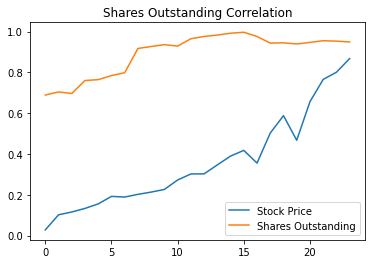

In [ ]:
plt.title('Shares Outstanding Correlation')
plt.plot(df_outerSharesOutstanding['ScaledClose'], label='Stock Price')
plt.plot(df_outerSharesOutstanding['ScaledSharesOutstanding'], label='Shares Outstanding')
plt.legend()
plt.show();

In [ ]:
corrSharesOutstanding,_=pearsonr(df_outerSharesOutstanding.ScaledClose,df_outerSharesOutstanding.ScaledSharesOutstanding)
corrSharesOutstanding

0.6426966987037788

In [ ]:
trends_attributes.append('Shares Outstanding')
trends_correlation.append(corrSharesOutstanding)

## PCA

In [ ]:
# Remote data access for pandas
import pandas_datareader as webreader #Not required
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler

In [ ]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.decomposition import PCA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Getting data

In [ ]:
dfFB.columns

Index(['datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ScaledClose'],
      dtype='object')

In [ ]:
# compile the list of dataframes you want to merge
data_frames = [df_outerEPS,
               df_outerNetIncome,
               df_outerPE,
               df_outerRevenue,
               df_outerROA,
               df_outerROE,
               df_outerSharesOutstanding]
dfmacro = reduce(lambda  left,right: pd.merge(left,right,on=['datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'ScaledClose'],
                                            how='outer'), data_frames)

In [ ]:
dfmacro.columns

Index([               'datetime',                    'Open',
                          'High',                     'Low',
                         'Close',               'Adj Close',
                        'Volume',             'ScaledClose',
                     'ScaledEPS',         'ScaledNetIncome',
                ('ScaledPE', ''),           'ScaledRevenue',
                     'ScaledROA',               'ScaledROE',
       'ScaledSharesOutstanding'],
      dtype='object')

In [ ]:
dfmacro=dfmacro.set_index('datetime')

### Data Synthesis Code

In [ ]:
synthesized = []
required_nums = [0, 1]
optional_nums = list(np.arange(0.1, 0.9, 0.1))
for i in tqdm(range(100000)):
    combo = list(np.random.choice(optional_nums, 12))+required_nums
    np.random.shuffle(combo)
    synthesized.append(combo)

100%|██████████| 100000/100000 [00:04<00:00, 22236.61it/s]


In [ ]:
x_train_simple = np.concatenate((x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))),synthesized[:80000]))
x_test_simple = np.concatenate((x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))),synthesized[80000:]))
x_test_simple = x_test_simple.reshape((len(x_test_simple), np.prod(x_test_simple.shape[1:])))


input_window = Input(shape=(window_length,))
encoded = Dense(encoding_dim, activation='relu')(input_window)
decoded = Dense(window_length, activation='sigmoid')(encoded)

ValueError: ignored

In [ ]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [ ]:
dfmacro=dfmacro.dropna()
X = dfmacro[['ScaledClose',       'ScaledEPS',
       'ScaledNetIncome',  ('ScaledPE', ''),   'ScaledRevenue',
             'ScaledROA',       'ScaledROE']].values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data
X_std.shape

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(23, 7)

In [ ]:
pca = PCA()
X_pca = pca.fit(X_std)

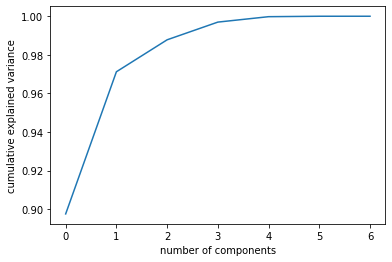

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [ ]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_)

4


In [ ]:
pd.DataFrame(pca.components_, columns = ['ScaledClose',       'ScaledEPS',
       'ScaledNetIncome',  ('ScaledPE', ''),   'ScaledRevenue',
             'ScaledROA',       'ScaledROE'])

,ScaledClose,ScaledEPS,ScaledNetIncome,"(ScaledPE, )",ScaledRevenue,ScaledROA,ScaledROE
0,0.372692,0.387743,0.388028,-0.370523,0.384458,0.361368,0.380143
1,-0.375363,-0.276184,-0.272301,-0.356893,-0.338606,0.562667,0.387370
2,-0.421453,0.306374,0.292976,0.709561,-0.016661,0.289031,0.235338
3,0.725387,-0.232528,-0.228880,0.448586,-0.242865,0.268445,0.187304


In [ ]:
n_pcs= pca.n_components_ # get number of component# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['ScaledClose',       'ScaledEPS',
       'ScaledNetIncome',  ('ScaledPE', ''),   'ScaledRevenue',
             'ScaledROA',       'ScaledROE']
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [ ]:
most_important_names

['ScaledNetIncome', 'ScaledROA', ('ScaledPE', ''), 'ScaledClose']

In [ ]:
dfmacro[most_important_names]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,ScaledNetIncome,ScaledROA,"(ScaledPE, )",ScaledClose
datetime,,,,
2013-09-30,0.050892,0.072259,0.081067,0.101868
2013-12-31,0.059594,0.099173,0.059690,0.115722
2014-03-31,0.069966,0.119698,0.049933,0.133243
2014-06-30,0.083062,0.137815,0.044243,0.155341
2014-09-30,0.084293,0.141795,0.045939,0.192170
2014-12-31,0.074976,0.119070,0.042491,0.188973
2015-03-31,0.058539,0.093413,0.049537,0.202138
2015-06-30,0.076646,0.076971,0.055640,0.213265
2015-09-30,0.092116,0.069431,0.058113,0.226210


In [ ]:
data_filtered = dfmacro[most_important_names]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,ScaledNetIncome,ScaledROA,"(ScaledPE, )",ScaledClose,Prediction
datetime,,,,,
2020-03-31,0.444669,0.172269,0.004383,0.467246,0.467246
2020-06-30,0.468929,0.185046,0.008251,0.656156,0.656156
2020-09-30,0.703437,0.190910,0.009915,0.765327,0.765327
2020-12-31,1.000000,0.210284,0.007712,0.800621,0.800621
2021-03-31,0.848554,0.233218,0.006246,0.867603,0.867603


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(23, 4)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 2

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(17, 2, 4) (17,)
(4, 2, 4) (4,)
0.06996572031291201
0.06996572031291201


In [ ]:
x_train.shape,test_data.shape

((17, 2, 4), (6, 4))

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 8 Input shape: 2 4


In [ ]:
x_train.shape,y_train.shape

((17, 2, 4), (17,))

In [ ]:
# Training the model
epochs = 10
early_stop = EarlyStopping(monitor='loss', patience=1)
history = model.fit(x_train, y_train, 
                    batch_size=1, 
                    epochs=epochs, 
                    callbacks=[early_stop])

Epoch 1/10
17/17 [==============================] - 2s 2ms/step - loss: 0.0430
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 8/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 9/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0147


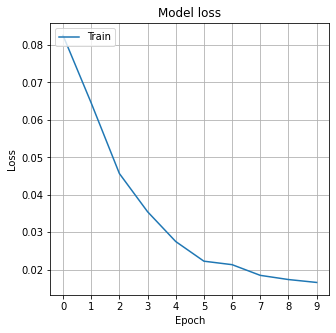

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(5, 5), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred = model.predict(x_test)
# Get the predicted values
y_pred_unscaled = scaler_pred.inverse_transform(y_pred)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.25
Mean Absolute Percentage Error (MAPE): 34.29 %
Median Absolute Percentage Error (MDAPE): 37.22 %


In [ ]:
def rev_min_max_func(scaled_val):
    max_val = max(dfmacro['Close'])
    min_val = min(dfmacro['Close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

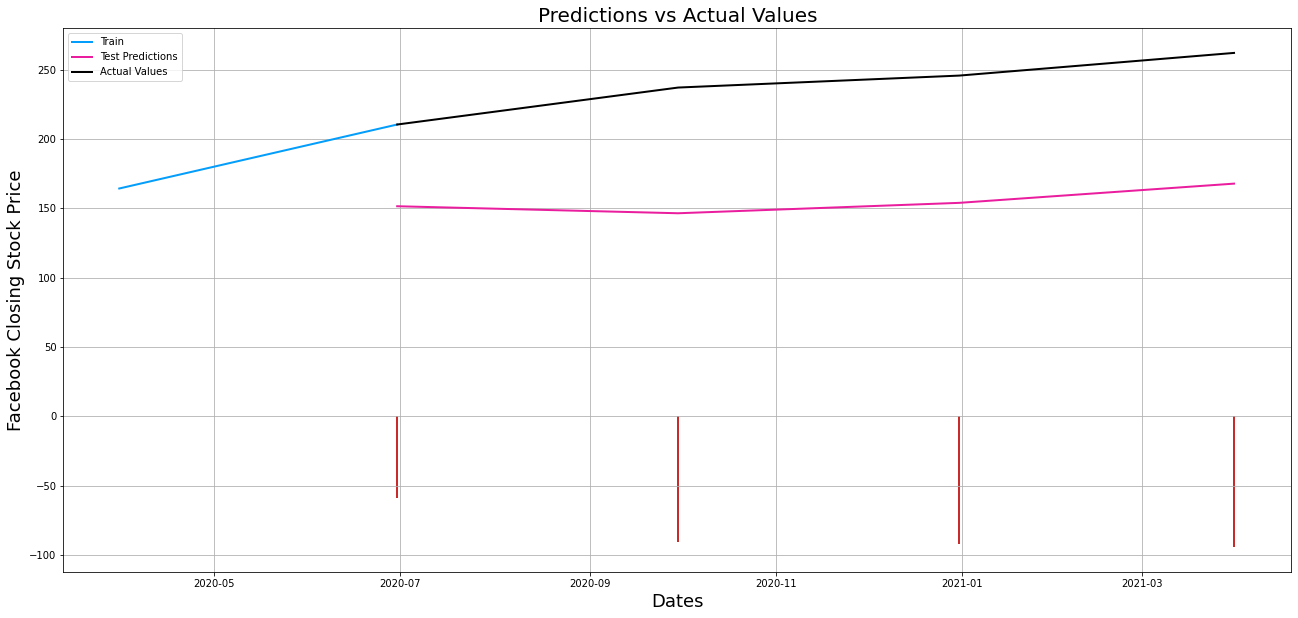

In [ ]:
# Get the predicted values
pred_unscaled = scaler_pred.inverse_transform(y_pred_unscaled)

# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
date_index = dfmacro.index
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
train['Inverse']=train['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid['Inverse']=valid['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Prediction", pred_unscaled.ravel(), True)
valid['InversePrediction']=valid['Prediction'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Difference", valid["InversePrediction"] - valid["Inverse"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Inverse"]]
xv = valid['Date']; yv = valid[["Inverse", "InversePrediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.xlabel("Dates", fontsize=18)
plt.ylabel("Facebook Closing Stock Price", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["InversePrediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Inverse"], color="black", linewidth=2.0)


# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")
plt.show()

In [ ]:
new_df = data_filtered

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list and Append past 100 days
X_test_new = []
X_test_new.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled)

# Print last price and predicted price for the next day
price_today = rev_min_max_func(round(new_df['ScaledClose'][len(new_df)-1], 2))
predicted_price = rev_min_max_func(round(pred_price_unscaled.ravel()[0], 2))
percent = round(100 - (predicted_price * 100)/price_today, 2)

plus = '+'; minus = '-'
print(f'The close price for Facebook on 21 June 2021 was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if percent > 0 else minus}{percent}%)')

The close price for Facebook on 21 June 2021 was 262.77099913000006
The predicted close price is 74.66000026403538 (+71.59%)


In [ ]:
macro_model=model.save('/content/drive/MyDrive/week2/macro/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/macro/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/macro/assets


# Topic Modelling

## GENERAL

In [ ]:
!pip install bertopic==0.8.0

In [ ]:
!pip install tbb

     |████████████████████████████████| 4.1MB 4.3MB/s 


In [ ]:
from bertopic import BERTopic
topic_model = BERTopic()

## GOOGLE

In [ ]:
import pandas as pd
docs=pd.read_csv('/content/drive/MyDrive/week2/GoogleNewsFacebookVader.csv')
docs = docs.loc[:, ~docs.columns.str.contains('^Unnamed')]
docs=docs.drop_duplicates()
docs=docs.reset_index()

In [ ]:
docs=docs['desc']

In [ ]:
from numba import config, njit, threading_layer
import numpy as np

config.THREADING_LAYER = 'omp'

In [ ]:
topics, _ = topic_model.fit_transform(docs)

In [ ]:
topic_information=topic_model.get_topic_info()
topic_information

,Topic,Count,Name
0,-1,70,-1_facebook_billion_by_users
1,0,43,0_facebook_zuckerberg_mark_company
2,1,42,1_facebook_data_users_personal
3,2,28,2_facebook_trump_president_donald
4,3,11,3_democrats_facebook_google_449


In [ ]:
topic_model.get_topic(3)

[('democrats', 0.082149701290895),
 ('facebook', 0.059095165386294286),
 ('google', 0.05527700289720419),
 ('449', 0.04630615012137161),
 ('threat', 0.04630615012137161),
 ('republicans', 0.04630615012137161),
 ('stripping', 0.04630615012137161),
 ('power', 0.04630615012137161),
 ('spanning', 0.04630615012137161),
 ('regulation', 0.04324603609791377)]

In [ ]:
TopicNumber= list ()
for i in docs:
  TopicNumber.append(topic_model.transform(i)[0][0])
TopicNumber

[-1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 2,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2,
 2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 2]

In [ ]:
TopicName = list ()

In [ ]:
for i in TopicNumber:
  TopicName.append(topic_information['Name'][i+1])
TopicName

['-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '2_facebook_trump_president_donald',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '0_facebook_zuckerberg_mark_company',
 '-1_facebook_billion_by_users',
 '2_facebook_trump_president_donald',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '2_facebook_trump_president_donald',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '2_facebook_trump_president_donald',
 '-1_facebook_billion_by_users',
 '-1_facebook_billion_by_users',
 '1_facebook_data_users_personal',
 '-1_facebook_b

In [ ]:
docs

0      All 2.2 billion Facebook users will receive a ...
1      Facebook tracks both its users and nonusers on...
2      Facebook CEO Mark Zuckerberg (C) leaves the of...
3      Sandy Parakilas, the platform operations manag...
4      You can find a list of apps that have access t...
                             ...                        
189    Facebook Removes Network in Ethiopia for Coord...
190    Facebook Removes Network in Ethiopia for Coord...
191    Facebook CEO Mark Zuckerberg has long faced sc...
192    Shares of Facebook Inc. Cl A FB, +1.64% rose 1...
193    Former President Donald Trump was banned from ...
Name: desc, Length: 194, dtype: object

In [ ]:
docs_topic=pd.concat(objs=[pd.Series(docs),pd.Series(TopicName)],axis=1)
docs_topic.columns=['desc','topic']
docs_topic

,desc,topic
0,All 2.2 billion Facebook users will receive a ...,-1_facebook_billion_by_users
1,Facebook tracks both its users and nonusers on...,-1_facebook_billion_by_users
2,Facebook CEO Mark Zuckerberg (C) leaves the of...,2_facebook_trump_president_donald
3,"Sandy Parakilas, the platform operations manag...",-1_facebook_billion_by_users
4,You can find a list of apps that have access t...,-1_facebook_billion_by_users
...,...,...
189,Facebook Removes Network in Ethiopia for Coord...,-1_facebook_billion_by_users
190,Facebook Removes Network in Ethiopia for Coord...,-1_facebook_billion_by_users
191,Facebook CEO Mark Zuckerberg has long faced sc...,-1_facebook_billion_by_users
192,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",-1_facebook_billion_by_users


In [ ]:
dfArticlesSenti=pd.read_csv('/content/drive/MyDrive/week2/GoogleNewsFacebookVader.csv')
dfArticlesSenti = dfArticlesSenti.loc[:, ~dfArticlesSenti.columns.str.contains('^Unnamed')]
dfArticlesSenti=dfArticlesSenti.drop_duplicates()
dfArticlesSenti=dfArticlesSenti.reset_index()

In [ ]:
dfTopicmodelled=pd.merge(dfArticlesSenti,docs_topic,on='desc')

In [ ]:
dfTopicmodelled

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,-1_facebook_billion_by_users
1,8113,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,-1_facebook_billion_by_users
2,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,2_facebook_trump_president_donald
3,24339,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182,-1_facebook_billion_by_users
4,32452,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184,-1_facebook_billion_by_users
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,-1_facebook_billion_by_users
206,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,-1_facebook_billion_by_users
207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,-1_facebook_billion_by_users
208,1556130,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.211,0.789,0.000,-0.7506,-1_facebook_billion_by_users


In [ ]:
dfTopicmodelled['absoluteCompound']=abs(dfTopicmodelled['compound'])
dfTopicmodelled

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,-1_facebook_billion_by_users,0.3400
1,8113,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,-1_facebook_billion_by_users,0.2263
2,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,2_facebook_trump_president_donald,0.0000
3,24339,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182,-1_facebook_billion_by_users,0.3182
4,32452,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184,-1_facebook_billion_by_users,0.7184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,-1_facebook_billion_by_users,0.6249
206,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,-1_facebook_billion_by_users,0.6249
207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,-1_facebook_billion_by_users,0.7506
208,1556130,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.211,0.789,0.000,-0.7506,-1_facebook_billion_by_users,0.7506


In [ ]:
dfTopicmodelled.to_csv('TopicModellingForGoogle.csv')

In [ ]:
dfSentimentForTopic=dfTopicmodelled[['absoluteCompound','topic']]
dfSentimentForTopic

,absoluteCompound,topic
0,0.3400,-1_facebook_billion_by_users
1,0.2263,-1_facebook_billion_by_users
2,0.0000,2_facebook_trump_president_donald
3,0.3182,-1_facebook_billion_by_users
4,0.7184,-1_facebook_billion_by_users
...,...,...
205,0.6249,-1_facebook_billion_by_users
206,0.6249,-1_facebook_billion_by_users
207,0.7506,-1_facebook_billion_by_users
208,0.7506,-1_facebook_billion_by_users


In [ ]:
dfSentimentForTopic['topic']=dfSentimentForTopic['topic'].astype('category')
dfSentimentForTopic.groupby(['topic']).mean().reset_index()

,topic,absoluteCompound
0,-1_facebook_billion_by_users,0.301357
1,0_facebook_zuckerberg_mark_company,0.194717
2,1_facebook_data_users_personal,0.285375
3,2_facebook_trump_president_donald,0.304800
4,3_democrats_facebook_google_449,0.910000


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.save('/content/drive/MyDrive/week2/topic_model')

In [ ]:
topic_model.load('/content/drive/MyDrive/week2/topic_model')

In [ ]:
topic_model.transform("facebook")

([-1], None)

### Topic 1: 2_zuckerberg_donald_trump_ceo

In [ ]:
dfTopic1=dfTopicmodelled.loc[dfTopicmodelled['topic'] == '2_zuckerberg_donald_trump_ceo']
dfTopic1

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound
10,81130,Trump Is Banned on Facebook 'at Least' Until H...,The New York Times,1 month ago,2021-05-22,"Mark Zuckerberg, Facebook's chief executive, s...",https://www.nytimes.com/2021/01/07/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.067,0.801,0.131,0.4588,2_zuckerberg_donald_trump_ceo,0.4588
22,178484,Facebook Employees Stage Virtual Walkout to Pr...,The New York Times,"Jun 1, 2020",2020-06-01,While Twitter started labeling some of the pre...,https://www.nytimes.com/2020/06/01/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,2_zuckerberg_donald_trump_ceo,0.0000
69,511004,How Facebook and Twitter decided to take down ...,NBC News,"Jan 14, 2021",2021-01-14,Mark Zuckerberg started to consider indefinite...,https://www.nbcnews.com/tech/tech-news/how-fac...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.373,0.557,0.070,-0.9100,2_zuckerberg_donald_trump_ceo,0.9100
182,1361814,Roger Waters tells Facebook CEO to Zuck off af...,The Register,4 days ago,2021-06-18,Grouchy former Pink Floyd bassist/vocalist Rog...,https://www.theregister.com/2021/06/17/roger_w...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.888,0.112,0.4404,2_zuckerberg_donald_trump_ceo,0.4404
207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506


In [ ]:
dfTopic1=dfTopic1.reset_index()
dfTopic1

,level_0,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound
0,10,81130,Trump Is Banned on Facebook 'at Least' Until H...,The New York Times,1 month ago,2021-05-22,"Mark Zuckerberg, Facebook's chief executive, s...",https://www.nytimes.com/2021/01/07/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.067,0.801,0.131,0.4588,2_zuckerberg_donald_trump_ceo,0.4588
1,22,178484,Facebook Employees Stage Virtual Walkout to Pr...,The New York Times,"Jun 1, 2020",2020-06-01,While Twitter started labeling some of the pre...,https://www.nytimes.com/2020/06/01/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,2_zuckerberg_donald_trump_ceo,0.0000
2,69,511004,How Facebook and Twitter decided to take down ...,NBC News,"Jan 14, 2021",2021-01-14,Mark Zuckerberg started to consider indefinite...,https://www.nbcnews.com/tech/tech-news/how-fac...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.373,0.557,0.070,-0.9100,2_zuckerberg_donald_trump_ceo,0.9100
3,182,1361814,Roger Waters tells Facebook CEO to Zuck off af...,The Register,4 days ago,2021-06-18,Grouchy former Pink Floyd bassist/vocalist Rog...,https://www.theregister.com/2021/06/17/roger_w...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.888,0.112,0.4404,2_zuckerberg_donald_trump_ceo,0.4404
4,207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506


In [ ]:
dfTopic1['datetime']=pd.to_datetime(dfTopic1['datetime'],format = "%Y-%m-%d").dt.date
type(dfTopic1.datetime[0])

datetime.date

In [ ]:
dfFB=pd.read_csv('/content/drive/MyDrive/week2/FB.csv')
dfFB=dfFB.rename(columns={'Date':'datetime'})
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

In [ ]:
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])
dfTopic1[["ScaledCompound"]]=scaler.fit_transform(dfTopic1[["absoluteCompound"]])

In [ ]:
df_outerTopic1 = pd.merge(dfFB, dfTopic1[['datetime','ScaledCompound']],on='datetime')
df_outerTopic1

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledCompound
0,2020-06-01,224.589996,232.440002,223.500000,231.910004,231.910004,18223800,0.671327,0.000000
1,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400,0.714362,1.000000
2,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,0.483956
3,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,0.824835


#### Date1: 2020-06-01

In [ ]:
dfFB.loc[2015:2025]

,datetime,Open,High,Low,Close,Adj Close,Volume
2015,2020-05-22,231.509995,235.990005,228.740005,234.910004,234.910004,33925600
2016,2020-05-26,239.770004,240.899994,231.669998,232.199997,232.199997,33178300
2017,2020-05-27,229.070007,230.559998,221.130005,229.139999,229.139999,34697600
2018,2020-05-28,224.300003,231.630005,224.000000,225.460007,225.460007,29377200
2019,2020-05-29,225.199997,227.490005,222.880005,225.089996,225.089996,23241500
2020,2020-06-01,224.589996,232.440002,223.500000,231.910004,231.910004,18223800
2021,2020-06-02,230.940002,233.000000,226.559998,232.720001,232.720001,20919000
2022,2020-06-03,232.110001,232.649994,228.529999,230.160004,230.160004,15380300
2023,2020-06-04,229.559998,231.630005,224.610001,226.289993,226.289993,17041500
2024,2020-06-05,226.710007,231.350006,225.309998,230.770004,230.770004,16750400


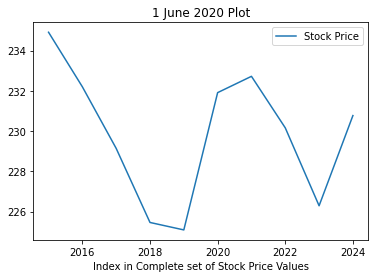

In [ ]:
plt.title('1 June 2020 Plot')
plt.plot(dfFB['Close'][2015:2025], label='Stock Price')
plt.xlabel("Index in Complete set of Stock Price Values")
plt.legend()
plt.show();

#### Date 2: 2021-01-14

In [ ]:
dfFB.loc[2173:2183]

,datetime,Open,High,Low,Close,Adj Close,Volume
2173,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2174,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
2175,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300
2176,2021-01-12,256.630005,259.720001,250.300003,251.089996,251.089996,26383500
2177,2021-01-13,251.550003,253.949997,249.199997,251.639999,251.639999,19528900
2178,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400
2179,2021-01-15,247.899994,253.860001,247.160004,251.360001,251.360001,24942900
2180,2021-01-19,256.899994,262.200012,252.720001,261.100006,261.100006,28028500
2181,2021-01-20,268.929993,270.320007,263.600006,267.480011,267.480011,25199900
2182,2021-01-21,269.260010,273.600006,267.489990,272.869995,272.869995,20838700


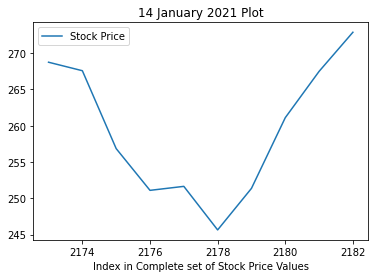

In [ ]:
plt.title('14 January 2021 Plot')
plt.plot(dfFB['Close'][2173:2183], label='Stock Price')
plt.xlabel("Index in Complete set of Stock Price Values")
plt.legend()
plt.show();

#### Date 3:2021-06-18

In [ ]:
dfFB.loc[2280:]

,datetime,Open,High,Low,Close,Adj Close,Volume
2280,2021-06-11,332.579987,332.829987,328.929993,331.260010,331.260010,13587900
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100
2285,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100


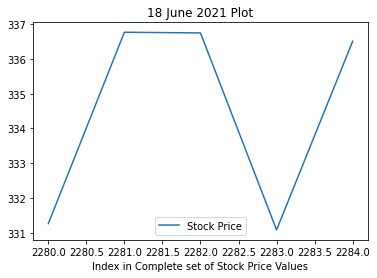

In [ ]:
plt.title('18 June 2021 Plot')
plt.plot(dfFB['Close'][2280:2285], label='Stock Price')
plt.xlabel("Index in Complete set of Stock Price Values")
plt.legend()
plt.show();

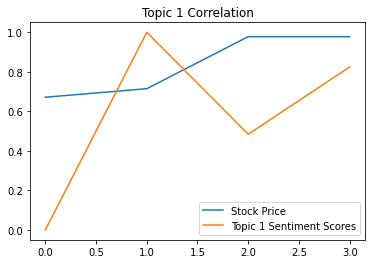

In [ ]:
plt.title('Topic 1 Correlation')
plt.plot(df_outerTopic1['ScaledClose'], label='Stock Price')
plt.plot(df_outerTopic1['ScaledCompound'], label='Topic 1 Sentiment Scores')
plt.legend()
plt.show();

In [ ]:
corrTopic1,_=pearsonr(df_outerTopic1.ScaledClose,df_outerTopic1.ScaledCompound)
corrTopic1

0.29970556835505224

### Topic 2: 3_billion_facebook_million_stock

In [ ]:
dfTopic2=dfTopicmodelled.loc[dfTopicmodelled['topic'] == '3_billion_facebook_million_stock']
dfTopic2

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound
40,259602,Facebook Posts a 53 Percent Jump in Profit,The New York Times,"Jan 27, 2021",2021-01-27,"Profits totaled $11.2 billion, up 53 percent. ...",https://www.nytimes.com/2021/01/27/business/fa...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.153,0.847,0.000,-0.5574,3_billion_facebook_million_stock,0.5574
135,981112,"S&P 500 near record high on Facebook boost, Na...",Reuters,1 month ago,2021-05-22,April 29 (Reuters) - The S&P 500 hovered near ...,https://www.reuters.com/business/autos-transpo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.4019,3_billion_facebook_million_stock,0.4019


In [ ]:
dfTopic2=dfTopic2.reset_index()

In [ ]:
dfTopic2['datetime']=pd.to_datetime(dfTopic2['datetime'],format = "%Y-%m-%d").dt.date
type(dfTopic2.datetime[0])

datetime.date

In [ ]:
dfTopic2[["ScaledCompound"]]=scaler.fit_transform(dfTopic2[["absoluteCompound"]])

In [ ]:
df_outerTopic2 = pd.merge(dfFB, dfTopic2[['datetime','ScaledCompound']],on='datetime')
df_outerTopic2

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,ScaledCompound
0,2021-01-27,282.529999,283.450012,268.119995,272.140015,272.140015,35346200,0.797424,1.0


In [ ]:
dfFB.loc[2180:2190]

,datetime,Open,High,Low,Close,Adj Close,Volume
2180,2021-01-19,256.899994,262.200012,252.720001,261.100006,261.100006,28028500
2181,2021-01-20,268.929993,270.320007,263.600006,267.480011,267.480011,25199900
2182,2021-01-21,269.260010,273.600006,267.489990,272.869995,272.869995,20838700
2183,2021-01-22,272.010010,278.470001,272.000000,274.500000,274.500000,21954000
2184,2021-01-25,278.140015,280.100006,271.510010,278.010010,278.010010,19087000
2185,2021-01-26,278.140015,285.390015,277.809998,282.049988,282.049988,19373600
2186,2021-01-27,282.529999,283.450012,268.119995,272.140015,272.140015,35346200
2187,2021-01-28,277.179993,286.790009,264.700012,265.000000,265.000000,37758800
2188,2021-01-29,265.299988,266.559998,254.850006,258.329987,258.329987,30389500
2189,2021-02-01,259.519989,264.170013,254.910004,262.010010,262.010010,22914300


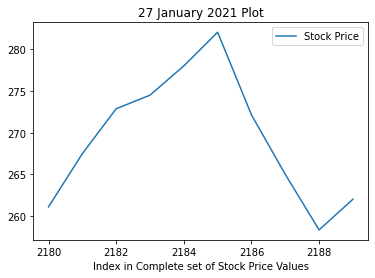

In [ ]:
plt.title('27 January 2021 Plot')
plt.plot(dfFB['Close'][2180:2190], label='Stock Price')
plt.xlabel("Index in Complete set of Stock Price Values")
plt.legend()
plt.show();

There seems to be a significant correlation between news articles of topics with high sentiment polarity and the stock price. But sample size is too small to give a definite comment.

## FOR TWITTER

In [ ]:
docs=dfTweetSenti['content']
docs

0      Since a week facebook groups not loading prope...
1      Join us for this Tuesday for our live service ...
2      @BKPR701 gen x aka "i believe everything i see...
3      So excited to interview the one and only @Yose...
4      Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...
                             ...                        
995             @Uflufflive You still use FaceBook? KEKW
996    @ILooveKSJ Min anden Facebook er også blevet f...
997    #ArrestGundaRajaSingh\nFacebook and Instagram ...
998    Facebook and Instagram had banned BJP MLA @Tig...
999    WooCommerce product feed plugin for Google, Fa...
Name: content, Length: 1000, dtype: object

In [ ]:
docs=docs.dropna()

In [ ]:
docs=docs.drop_duplicates()
docs

0      Since a week facebook groups not loading prope...
1      Join us for this Tuesday for our live service ...
2      @BKPR701 gen x aka "i believe everything i see...
3      So excited to interview the one and only @Yose...
4      Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...
                             ...                        
993    Just saw this on Facebook,  had to show it to ...
995             @Uflufflive You still use FaceBook? KEKW
996    @ILooveKSJ Min anden Facebook er også blevet f...
997    #ArrestGundaRajaSingh\nFacebook and Instagram ...
999    WooCommerce product feed plugin for Google, Fa...
Name: content, Length: 985, dtype: object

In [ ]:
docs.shape

(985,)

In [ ]:
docs=docs.reset_index()
docs

,index,content
0,0,Since a week facebook groups not loading prope...
1,1,Join us for this Tuesday for our live service ...
2,2,"@BKPR701 gen x aka ""i believe everything i see..."
3,3,So excited to interview the one and only @Yose...
4,4,Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...
...,...,...
980,993,"Just saw this on Facebook, had to show it to ..."
981,995,@Uflufflive You still use FaceBook? KEKW
982,996,@ILooveKSJ Min anden Facebook er også blevet f...
983,997,#ArrestGundaRajaSingh\nFacebook and Instagram ...


In [ ]:
docs=docs['content'].sample(700)
docs=docs.reset_index()

In [ ]:
docs

,index,content
0,682,@Facebook Where's Count Arthur Strong??
1,505,"Guardian: Google, Facebook and other tech comp..."
2,969,@jorgje @Michaelwhatis @Marc_Veld Let me answe...
3,723,@GolfSocialClub @ElizaS50826868 @SOSHoylakeBea...
4,243,เจ้าของร้านเสริมสวย และทำฟาร์มเลี้ยงแมว เปลี่ย...
...,...,...
695,524,Facebookもやってる人っている？？\n求めることはすくないからDMしませんか？
696,192,@ServeThe901 @perSONICk @Facebook As soon as y...
697,319,#facebook #affiliatemarketing Check my #websit...
698,345,今は、Twitterやインスタが集客に向いてます。\nFacebookは衰退気味のようですね...


In [ ]:
from numba import config, njit, threading_layer
import numpy as np

config.THREADING_LAYER = 'omp'

In [ ]:
topics, _ = topic_model.fit_transform(docs['content'])

In [ ]:
topic_information=topic_model.get_topic_info()
topic_information

,Topic,Count,Name
0,-1,609,-1_facebook_twitter_instagram_que
1,0,73,0_facebook_100_twitter_instagram
2,1,18,1_google_privacy_companies_tech


In [ ]:
topic_model.get_topic(1)

[('google', 0.21128311522970733),
 ('privacy', 0.19603985506780253),
 ('companies', 0.17016676500190292),
 ('tech', 0.17016676500190292),
 ('facebook', 0.07950808369817004),
 ('twitter', 0.05973104222577162),
 ('asia', 0.04941587430822707),
 ('apple', 0.04699521073541259),
 ('internet', 0.04699521073541259),
 ('stop', 0.045187193265765785)]

In [ ]:
docs

,index,content
0,682,@Facebook Where's Count Arthur Strong??
1,505,"Guardian: Google, Facebook and other tech comp..."
2,969,@jorgje @Michaelwhatis @Marc_Veld Let me answe...
3,723,@GolfSocialClub @ElizaS50826868 @SOSHoylakeBea...
4,243,เจ้าของร้านเสริมสวย และทำฟาร์มเลี้ยงแมว เปลี่ย...
...,...,...
695,524,Facebookもやってる人っている？？\n求めることはすくないからDMしませんか？
696,192,@ServeThe901 @perSONICk @Facebook As soon as y...
697,319,#facebook #affiliatemarketing Check my #websit...
698,345,今は、Twitterやインスタが集客に向いてます。\nFacebookは衰退気味のようですね...


In [ ]:
TopicNumber= list ()
for i in docs['content']:
  TopicNumber.append(topic_model.transform(i)[0][0])
TopicNumber

[-1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 -1,

In [ ]:
TopicName = list ()

In [ ]:
for i in TopicNumber:
  TopicName.append(topic_information['Name'][i+1])
TopicName

['-1_facebook_twitter_instagram_que',
 '1_google_privacy_companies_tech',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '1_google_privacy_companies_tech',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '0_facebook_100_twitter_instagram',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twitter_instagram_que',
 '-1_facebook_twi

In [ ]:
docs_topic=pd.concat(objs=[docs,pd.Series(TopicName)],axis=1)
docs_topic.columns=['tweet_scraped_index','content','topic']
docs_topic

,tweet_scraped_index,content,topic
0,682,@Facebook Where's Count Arthur Strong??,-1_facebook_twitter_instagram_que
1,505,"Guardian: Google, Facebook and other tech comp...",1_google_privacy_companies_tech
2,969,@jorgje @Michaelwhatis @Marc_Veld Let me answe...,-1_facebook_twitter_instagram_que
3,723,@GolfSocialClub @ElizaS50826868 @SOSHoylakeBea...,-1_facebook_twitter_instagram_que
4,243,เจ้าของร้านเสริมสวย และทำฟาร์มเลี้ยงแมว เปลี่ย...,-1_facebook_twitter_instagram_que
...,...,...,...
695,524,Facebookもやってる人っている？？\n求めることはすくないからDMしませんか？,0_facebook_100_twitter_instagram
696,192,@ServeThe901 @perSONICk @Facebook As soon as y...,-1_facebook_twitter_instagram_que
697,319,#facebook #affiliatemarketing Check my #websit...,-1_facebook_twitter_instagram_que
698,345,今は、Twitterやインスタが集客に向いてます。\nFacebookは衰退気味のようですね...,0_facebook_100_twitter_instagram


In [ ]:
dfTopicmodelled=pd.merge(dfTweet,docs_topic[['content','topic']],on='content')
dfTopicmodelled

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,neg,neu,pos,compound,topic
0,https://twitter.com/pinkalbhartiya9/status/141...,2021-07-06,Since a week facebook groups not loading prope...,1412300987050598405,pinkalbhartiya9,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que
1,https://twitter.com/JesusNiyongabo/status/1412...,2021-07-06,Join us for this Tuesday for our live service ...,1412300981132484610,JesusNiyongabo,"[https://www.facebook.com/ManifestRwanda/, htt...",https://www.facebook.com/ManifestRwanda/ https...,"[https://t.co/AlanWe2tlf, https://t.co/WlqW9H8...",https://t.co/AlanWe2tlf https://t.co/WlqW9H8awk,0.000,0.788,0.212,0.8356,-1_facebook_twitter_instagram_que
2,https://twitter.com/watakashe/status/141230095...,2021-07-06,"@BKPR701 gen x aka ""i believe everything i see...",1412300955614257152,watakashe,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que
3,https://twitter.com/Ostrov_A/status/1412300955...,2021-07-06,So excited to interview the one and only @Yose...,1412300955547209730,Ostrov_A,[],,[],,0.000,0.886,0.114,0.5400,-1_facebook_twitter_instagram_que
4,https://twitter.com/bursaihh/status/1412300944...,2021-07-06,Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...,1412300944335900673,bursaihh,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,https://twitter.com/prekshums/status/141229344...,2021-07-06,I reactivated my facebook after years cos I ne...,1412293441149575169,prekshums,[],,[],,0.126,0.665,0.209,0.3574,-1_facebook_twitter_instagram_que
708,https://twitter.com/S0FlAS/status/141229344028...,2021-07-06,@SOFWYLlES i don’t have Facebook but tell char...,1412293440281452547,S0FlAS,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que
709,https://twitter.com/JafferMTG/status/141229342...,2021-07-06,@Uflufflive You still use FaceBook? KEKW,1412293425714581504,JafferMTG,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que
710,https://twitter.com/KKsen54/status/14122934165...,2021-07-06,@ILooveKSJ Min anden Facebook er også blevet f...,1412293416541634561,KKsen54,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que


In [ ]:
dfTopicmodelled.to_csv("TopicModellingSentimentAnalysisTopics.csv")

In [ ]:
dfTopicmodelled['absoluteCompound']=abs(dfTopicmodelled['compound'])
dfTopicmodelled

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,neg,neu,pos,compound,topic,absoluteCompound
0,https://twitter.com/pinkalbhartiya9/status/141...,2021-07-06,Since a week facebook groups not loading prope...,1412300987050598405,pinkalbhartiya9,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000
1,https://twitter.com/JesusNiyongabo/status/1412...,2021-07-06,Join us for this Tuesday for our live service ...,1412300981132484610,JesusNiyongabo,"[https://www.facebook.com/ManifestRwanda/, htt...",https://www.facebook.com/ManifestRwanda/ https...,"[https://t.co/AlanWe2tlf, https://t.co/WlqW9H8...",https://t.co/AlanWe2tlf https://t.co/WlqW9H8awk,0.000,0.788,0.212,0.8356,-1_facebook_twitter_instagram_que,0.8356
2,https://twitter.com/watakashe/status/141230095...,2021-07-06,"@BKPR701 gen x aka ""i believe everything i see...",1412300955614257152,watakashe,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000
3,https://twitter.com/Ostrov_A/status/1412300955...,2021-07-06,So excited to interview the one and only @Yose...,1412300955547209730,Ostrov_A,[],,[],,0.000,0.886,0.114,0.5400,-1_facebook_twitter_instagram_que,0.5400
4,https://twitter.com/bursaihh/status/1412300944...,2021-07-06,Radyo 16 Genel Müdürü Ali Haydar Yıldırım'ın h...,1412300944335900673,bursaihh,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,https://twitter.com/prekshums/status/141229344...,2021-07-06,I reactivated my facebook after years cos I ne...,1412293441149575169,prekshums,[],,[],,0.126,0.665,0.209,0.3574,-1_facebook_twitter_instagram_que,0.3574
708,https://twitter.com/S0FlAS/status/141229344028...,2021-07-06,@SOFWYLlES i don’t have Facebook but tell char...,1412293440281452547,S0FlAS,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000
709,https://twitter.com/JafferMTG/status/141229342...,2021-07-06,@Uflufflive You still use FaceBook? KEKW,1412293425714581504,JafferMTG,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000
710,https://twitter.com/KKsen54/status/14122934165...,2021-07-06,@ILooveKSJ Min anden Facebook er også blevet f...,1412293416541634561,KKsen54,[],,[],,0.000,1.000,0.000,0.0000,-1_facebook_twitter_instagram_que,0.0000


In [ ]:
dfSentimentForTopic=dfTopicmodelled[['absoluteCompound','topic']]
dfSentimentForTopic

,absoluteCompound,topic
0,0.0000,-1_facebook_twitter_instagram_que
1,0.8356,-1_facebook_twitter_instagram_que
2,0.0000,-1_facebook_twitter_instagram_que
3,0.5400,-1_facebook_twitter_instagram_que
4,0.0000,-1_facebook_twitter_instagram_que
...,...,...
707,0.3574,-1_facebook_twitter_instagram_que
708,0.0000,-1_facebook_twitter_instagram_que
709,0.0000,-1_facebook_twitter_instagram_que
710,0.0000,-1_facebook_twitter_instagram_que


In [ ]:
dfSentimentForTopic['topic']=dfSentimentForTopic['topic'].astype('category')
dfSentimentForTopic.groupby(['topic']).mean().reset_index()

,topic,absoluteCompound
0,-1_facebook_twitter_instagram_que,0.260796
1,0_facebook_100_twitter_instagram,0.000000
2,1_google_privacy_companies_tech,0.406106


The chosen topic is google_privacy_companies_tech

# Sentiment Analysis by Source Popularity

In [ ]:
import pandas as pd
import requests
from urllib.request import Request, urlopen
from datetime import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
  
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

In [ ]:
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler
# To load a saved model
from keras.models import load_model

In [ ]:
news_websites_media_ranking='https://www.w3newspapers.com/newssites/'
req = Request(news_websites_media_ranking, headers={'User-Agent' : "Magic Browser"})
webpage = urlopen(req).read()

In [ ]:
popularity = list ()

In [ ]:
popularitySoup=BeautifulSoup(webpage)
popularitySoup

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_Head1"><title>
	Most Popular News Websites in the World
</title>
<script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js" type="bb84fa7b86387978717f6509-text/javascript"></script>
<script type="bb84fa7b86387978717f6509-text/javascript">
(adsbygoogle = window.adsbygoogle || []).push({
google_ad_client: "ca-pub-5867474042959696",
enable_page_level_ads: true
});
</script>
<link href="/images/favicon.ico" rel="shortcut icon"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="#c1c1c1" name="theme-color"/><link href="/manifest.json" rel="manifest"/>
<style>
body,p{text-align:left;}body{font-family:"Helvetica Neue",Helvetica,Arial,sans-serif,Geneva;color:#333;background-color:#00334e;margin:-3px 0 0;padding:0 0 0 2px}.ML a.thumb,A,div.countries a{text-decoration:none}A,a:

In [ ]:
for i in popularitySoup.find_all('h3'):
  popularity.append(i.text)
len(popularity)

55

In [ ]:
googleNewsSources=pd.read_csv('/content/drive/MyDrive/week2/GoogleNewsFacebookVader.csv')
googleNewsSources.head()

,Unnamed: 0,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.34
1,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.34
2,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.34
3,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.34
4,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.0,0.915,0.085,0.34


In [ ]:
filteredSources = googleNewsSources.loc[googleNewsSources['media'].isin(popularity)]
filteredSources

,Unnamed: 0,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
16226,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16227,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16228,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16229,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16230,2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
1572315,193,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572316,193,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572317,193,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572318,193,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743


In [ ]:
filteredSources = filteredSources.loc[:, ~filteredSources.columns.str.contains('^Unnamed')]
filteredSources

,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16227,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16228,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16229,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
16230,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1572315,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572316,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572317,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
1572318,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743


In [ ]:
filteredSources=filteredSources.reset_index(drop=True)
filteredSources

,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
0,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
1,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
2,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
3,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
4,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
259285,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
259286,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
259287,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743
259288,Is banning Trump from Facebook a First Amendme...,USA Today,1 day ago,2021-06-21,Former President Donald Trump was banned from ...,https://www.usatoday.com/in-depth/news/politic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.215,0.785,0.0,-0.743


In [ ]:
filteredSources=filteredSources.drop_duplicates()

In [ ]:
filteredSources.datetime=pd.to_datetime(filteredSources.datetime)
type(filteredSources.datetime.loc[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
dfAddSource=filteredSources.groupby(filteredSources.datetime)['compound'].mean().reset_index(name='AverageCompound')
dfAddSource

,datetime,AverageCompound
0,2014-02-13,0.34000
1,2014-03-25,0.00000
2,2018-04-04,-0.24110
3,2018-04-10,0.00000
4,2018-04-15,-0.05160
5,2018-10-30,-0.20230
6,2019-06-03,-0.17380
7,2020-06-28,0.10270
8,2020-10-13,0.30405
9,2020-12-03,-0.55740


In [ ]:
dfFB=pd.read_csv('/content/drive/MyDrive/week2/FB.csv')
dfFB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100


In [ ]:
# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])
dfAddSource[["ScaledAverage"]] = scaler.fit_transform(dfAddSource[["AverageCompound"]])

In [ ]:
dfFB=dfFB.rename(columns={'Date':'datetime'})
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.064255
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,0.051091
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,0.041594
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.047956
...,...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800,1.000000
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185


In [ ]:
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfAddSource['datetime'] = pd.to_datetime(dfAddSource.datetime, errors='ignore').dt.date
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.064255
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,0.051091
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,0.041594
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.047956
...,...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800,1.000000
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185


In [ ]:
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,0.064255
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,0.051091
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,0.041594
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.047956
...,...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800,1.000000
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200,0.999937
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200,0.982165
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100,0.999185


In [ ]:
dfAddSource

,datetime,AverageCompound,ScaledAverage
0,2014-02-13,0.34000,0.952817
1,2014-03-25,0.00000,0.693650
2,2018-04-04,-0.24110,0.509871
3,2018-04-10,0.00000,0.693650
4,2018-04-15,-0.05160,0.654318
5,2018-10-30,-0.20230,0.539447
6,2019-06-03,-0.17380,0.561171
7,2020-06-28,0.10270,0.771934
8,2020-10-13,0.30405,0.925414
9,2020-12-03,-0.55740,0.268770


In [ ]:
df_outerSource = pd.merge(dfFB, dfAddSource,on='datetime')
df_outerSource

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,AverageCompound,ScaledAverage
0,2014-02-13,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,0.34000,0.952817
1,2014-03-25,64.889999,66.190002,63.779999,64.889999,64.889999,68786000,0.147818,0.00000,0.693650
2,2018-04-04,152.029999,155.559998,150.509995,155.100006,155.100006,49885600,0.430573,-0.24110,0.509871
3,2018-04-10,157.929993,165.979996,157.009995,165.039993,165.039993,57889300,0.461729,0.00000,0.693650
4,2018-10-30,139.940002,146.639999,139.740005,146.220001,146.220001,50528300,0.402739,-0.20230,0.539447
5,2019-06-03,175.000000,175.050003,161.009995,164.149994,164.149994,56059600,0.458939,-0.17380,0.561171
6,2020-10-13,277.579987,279.100006,273.390015,276.140015,276.140015,18063300,0.809961,0.30405,0.925414
7,2020-12-03,286.250000,286.649994,281.070007,281.850006,281.850006,12921700,0.827859,-0.55740,0.268770
8,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400,0.714362,-0.91000,0.000000
9,2021-01-27,282.529999,283.450012,268.119995,272.140015,272.140015,35346200,0.797424,0.00000,0.693650


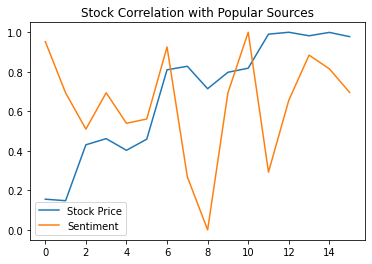

In [ ]:
plt.title('Stock Correlation with Popular Sources')
plt.plot(df_outerSource['ScaledClose'], label='Stock Price')
plt.plot(df_outerSource['ScaledAverage'], label='Sentiment')
#plt.plot(df_outer['ScaledCompoundTweet'], label='Tweet Sentiment')
#plt.xticks(df_outer['datetime'])
plt.legend()
plt.show();

In [ ]:
corrSource,_=pearsonr(df_outerSource.Close,df_outerSource.AverageCompound)
print(corrSource)

-0.054550239656322295


In [ ]:
df_outerSource=df_outerSource.set_index('datetime')

In [ ]:
train_dfs = df_outerSource.copy()

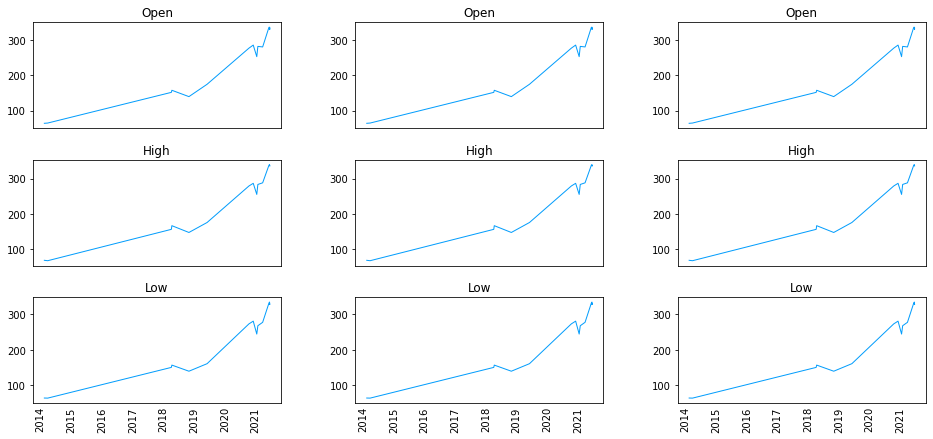

In [ ]:
# Plot each column
register_matplotlib_converters()
nrows = 3
ncols = int(round(train_dfs.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x = train_dfs.index

for f, i in enumerate(range(nrows)):
    for j in range(ncols):
        ax[i, j].xaxis.set_major_locator(mdates.YearLocator())
        assetname = train_dfs.columns[f]
        y = train_dfs[assetname]
        ax[i, j].plot(x, y, color='#039dfc', label='Facebook', linewidth=1.0)
        ax[i, j].set_title(assetname)
        ax[i, j].tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show()

In [ ]:
# Indexing Batches
train_df = train_dfs.sort_values(by=['datetime']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,ScaledClose,AverageCompound,ScaledAverage
0,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,0.3400,0.952817
1,64.889999,66.190002,63.779999,64.889999,64.889999,68786000,0.147818,0.0000,0.693650
2,152.029999,155.559998,150.509995,155.100006,155.100006,49885600,0.430573,-0.2411,0.509871
3,157.929993,165.979996,157.009995,165.039993,165.039993,57889300,0.461729,0.0000,0.693650
4,139.940002,146.639999,139.740005,146.220001,146.220001,50528300,0.402739,-0.2023,0.539447


In [ ]:
# List of considered Features
FEATURES = [#'High', 'Low', 'Open', 
            'ScaledClose', 
            #'Volume', 
            'AverageCompound',
            #'Year',
            #'Adj Close'
           ]

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['ScaledClose', 'AverageCompound']


,ScaledClose,AverageCompound,Prediction
11,0.990315,-0.52670,0.990315
12,0.999937,-0.04980,0.999937
13,0.982165,0.25000,0.982165
14,0.999185,0.15910,0.999185
15,0.977714,0.00242,0.977714


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(16, 2)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 10

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(3, 10, 2) (3,)
(3, 10, 2) (3,)
0.8181105786083763
0.8181105786083763


In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 20 Input shape: 10 2


In [ ]:
# Training the model
epochs = 40
early_stop = EarlyStopping(monitor='loss', patience=1)
history = model.fit(x_train, y_train, 
                    batch_size=1, 
                    epochs=epochs, 
                    callbacks=[early_stop])

Epoch 1/40
3/3 [==============================] - 2s 6ms/step - loss: 0.8138
Epoch 2/40
3/3 [==============================] - 0s 6ms/step - loss: 0.7241
Epoch 3/40
3/3 [==============================] - 0s 7ms/step - loss: 0.5512
Epoch 4/40
3/3 [==============================] - 0s 6ms/step - loss: 0.5652
Epoch 5/40
3/3 [==============================] - 0s 6ms/step - loss: 0.4096
Epoch 6/40
3/3 [==============================] - 0s 6ms/step - loss: 0.3847
Epoch 7/40
3/3 [==============================] - 0s 8ms/step - loss: 0.2790
Epoch 8/40
3/3 [==============================] - 0s 6ms/step - loss: 0.2593
Epoch 9/40
3/3 [==============================] - 0s 6ms/step - loss: 0.1682
Epoch 10/40
3/3 [==============================] - 0s 6ms/step - loss: 0.1460
Epoch 11/40
3/3 [==============================] - 0s 7ms/step - loss: 0.1095
Epoch 12/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0460
Epoch 13/40
3/3 [==============================] - 0s 6ms/step - loss: 0.

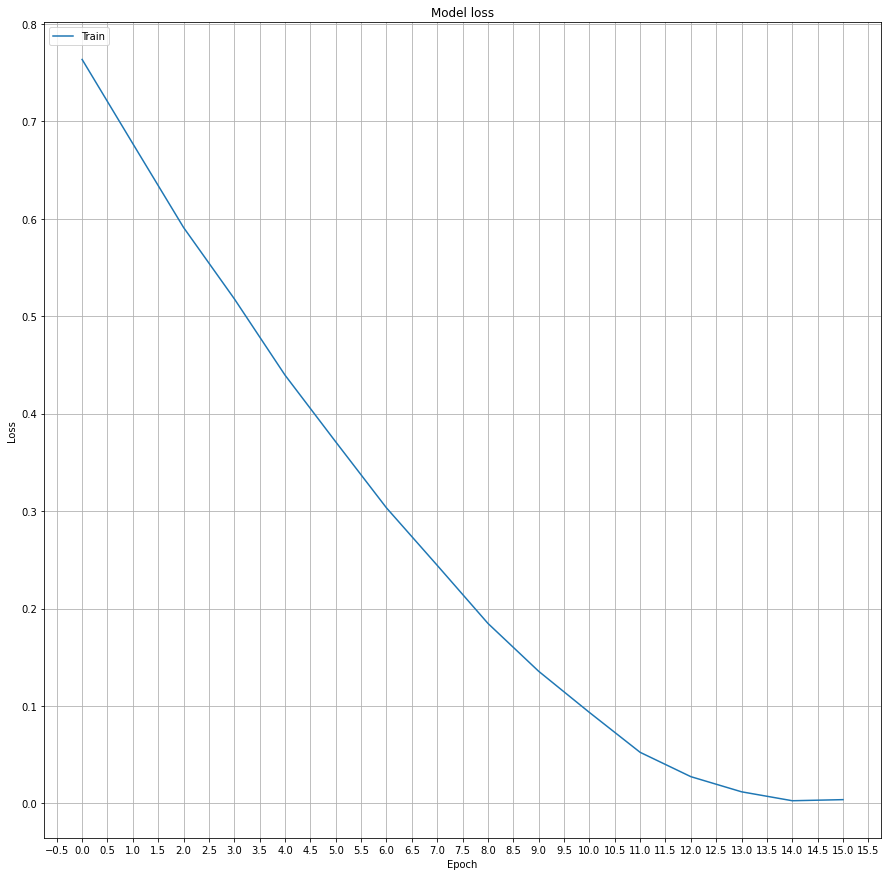

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(15, 15), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred = model.predict(x_test)
# Get the predicted values
y_pred_unscaled = scaler_pred.inverse_transform(y_pred)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.14
Mean Absolute Percentage Error (MAPE): 14.18 %
Median Absolute Percentage Error (MDAPE): 13.61 %


In [ ]:
def rev_min_max_func(scaled_val):
    max_val = max(df_outerSource['Close'])
    min_val = min(df_outerSource['Close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

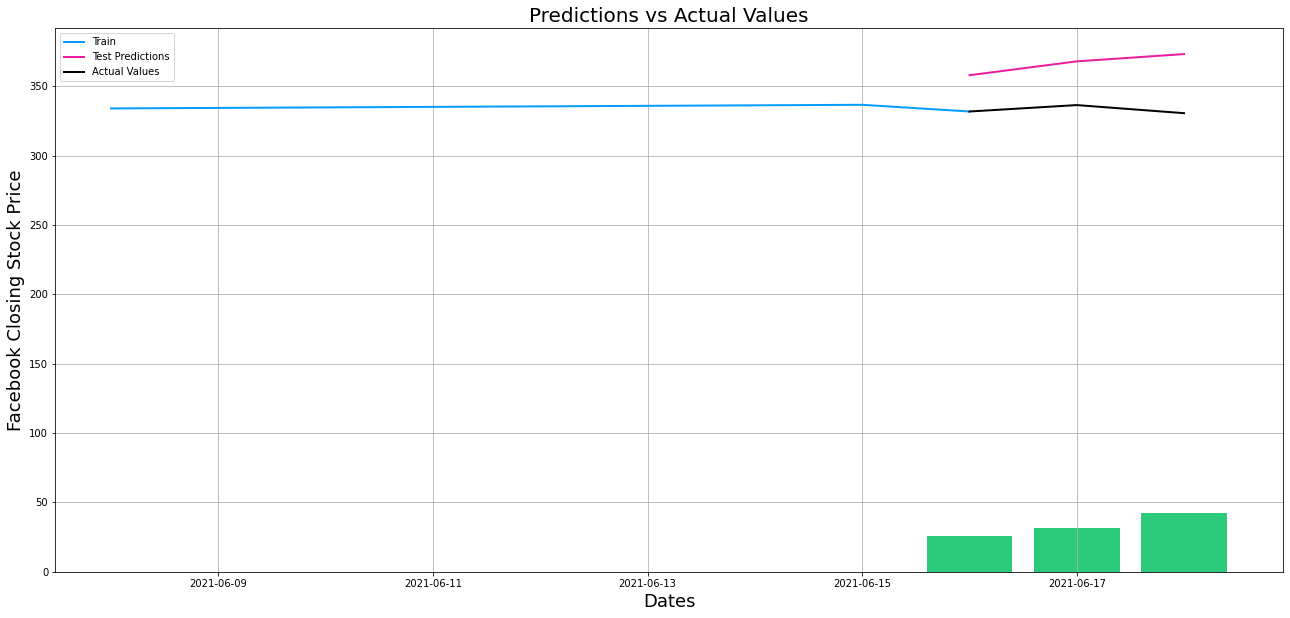

In [ ]:
# Get the predicted values
pred_unscaled = scaler_pred.inverse_transform(y_pred_unscaled)

# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=100)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
train['Inverse']=train['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid['Inverse']=valid['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Prediction", pred_unscaled.ravel(), True)
valid['InversePrediction']=valid['Prediction'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Difference", valid["InversePrediction"] - valid["Inverse"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Inverse"]]
xv = valid['Date']; yv = valid[["Inverse", "InversePrediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.xlabel("Dates", fontsize=18)
plt.ylabel("Facebook Closing Stock Price", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["InversePrediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Inverse"], color="black", linewidth=2.0)


# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")
plt.show()

In [ ]:
new_df = data_filtered

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list and Append past 100 days
X_test_new = []
X_test_new.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled)

# Print last price and predicted price for the next day
price_today = rev_min_max_func(round(new_df['ScaledClose'][len(new_df)-1], 2))
predicted_price = rev_min_max_func(round(pred_price_unscaled.ravel()[0], 2))
percent = round(100 - (predicted_price * 100)/price_today, 2)

plus = '+'; minus = '-'
print(f'The close price for Facebook on 21 June 2021 was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if percent > 0 else minus}{percent}%)')

The close price for Facebook on 21 June 2021 was 331.31279998
The predicted close price is 347.62438966936395 (--4.92%)


In [ ]:
saved_model=model.save('/content/drive/MyDrive/week2/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/assets


In [ ]:
model = load_model('/content/drive/MyDrive/week2/')
model.predict(x_test)

array([[1.1077232],
       [1.0803964],
       [1.0712966]], dtype=float32)

# Topic Modelling plus Analysis By Source

Already have topic modelling done on top of sentiment analysis. Just filtering by source too and checking for the results in GoogleNews articles

In [ ]:
import pandas as pd
import requests
from urllib.request import Request, urlopen
from datetime import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
  
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

In [ ]:
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler

In [ ]:
dfTopicSource=pd.read_csv('/content/drive/MyDrive/week2/TopicModellingForGoogle.csv')
dfTopicSource.columns

Index(['Unnamed: 0', 'index', 'title', 'media', 'date', 'datetime', 'desc',
       'link', 'img', 'neg', 'neu', 'pos', 'compound', 'topic',
       'absoluteCompound'],
      dtype='object')

In [ ]:
dfTopicSource.shape

(210, 15)

In [ ]:
news_websites_media_ranking='https://www.w3newspapers.com/newssites/'
req = Request(news_websites_media_ranking, headers={'User-Agent' : "Magic Browser"})
webpage = urlopen(req).read()

In [ ]:
popularity = list ()
popularitySoup=BeautifulSoup(webpage)
for i in popularitySoup.find_all('h3'):
  popularity.append(i.text)
len(popularity)

55

In [ ]:
filteredSources = dfTopicSource.loc[dfTopicSource['media'].isin(popularity)]

In [ ]:
filteredSources.shape

(36, 15)

In [ ]:
filteredSources = filteredSources.loc[:, ~filteredSources.columns.str.contains('^Unnamed')]
filteredSources=filteredSources.reset_index(drop=True)
filteredSources

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound
0,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000
1,56791,"Facebook says data leak hits 87 million users,...",Reuters,"Apr 4, 2018",2018-04-04,Chief Executive Mark Zuckerberg said in a conf...,https://www.reuters.com/article/us-facebook-pr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.073,0.927,0.000,-0.2411,1_facebook_that_company_oculus,0.2411
2,121695,Exclusive: Facebook ad boycott campaign to go ...,Reuters,"Jun 28, 2020",2020-06-28,(Reuters) - Organizers of a Facebook Inc FB.O ...,https://www.reuters.com/article/us-facebook-ad...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.088,0.808,0.104,0.1027,1_facebook_that_company_oculus,0.1027
3,251491,Facebook earnings beat but the company warns o...,CNBC,"Jan 27, 2021",2021-01-27,"In the U.S. and Canada, Facebook's user base f...",https://www.cnbc.com/2021/01/27/facebook-fb-ea...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000
4,511004,How Facebook and Twitter decided to take down ...,NBC News,"Jan 14, 2021",2021-01-14,Mark Zuckerberg started to consider indefinite...,https://www.nbcnews.com/tech/tech-news/how-fac...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.373,0.557,0.070,-0.9100,2_zuckerberg_donald_trump_ceo,0.9100
5,583974,Facebook fuels broad privacy debate by trackin...,Reuters,"Apr 15, 2018",2018-04-15,Zuckerberg said on Wednesday under questioning...,https://www.reuters.com/article/us-facebook-pr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.054,0.946,0.000,-0.0516,1_facebook_that_company_oculus,0.0516
6,656936,"Watch live: CEOs of Facebook, Google and Twitt...",CNBC,"Mar 25, 2021",2021-03-25,"The CEOs of Facebook, Twitter and Google retur...",https://www.cnbc.com/2021/03/25/watch-big-tech...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.4019,0_facebook_information_facebooks_data,0.4019
7,729890,Here's a List of 58 Gender Options for Faceboo...,ABC News,"Feb 13, 2014",2014-02-13,"Harrison, who worked on the project, is in the...",http://abcnews.go.com/blogs/headlines/2014/02/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400
8,746100,"Facebook Buys Oculus, Virtual Reality Gaming S...",Forbes,"Mar 25, 2014",2014-03-25,"In a Tuesday afternoon shocker, Facebook annou...",https://www.forbes.com/sites/briansolomon/2014...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000
9,827148,Facebook to remove misinformation about Covid ...,CNBC,"Dec 3, 2020",2020-12-03,"Now, Facebook said it will ""start removing fal...",https://www.cnbc.com/2020/12/03/facebook-to-re...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.153,0.847,0.000,-0.5574,1_facebook_that_company_oculus,0.5574


In [ ]:
filteredSources=filteredSources.drop_duplicates()
filteredSources.datetime=pd.to_datetime(filteredSources.datetime)
type(filteredSources.datetime.loc[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
topic_list=['3_billion_facebook_million_stock','2_zuckerberg_donald_trump_ceo']

In [ ]:
filteredSources = dfTopicSource.loc[dfTopicSource['topic'].isin(topic_list)]
filteredSources.shape

(7, 15)

In [ ]:
dfAddSource=filteredSources.groupby(filteredSources.datetime)['compound'].mean().reset_index(name='AverageCompound')
dfAddSource

,datetime,AverageCompound
0,2020-06-01,0.00000
1,2021-01-14,-0.91000
2,2021-01-27,-0.55740
3,2021-05-22,0.43035
4,2021-06-18,-0.15510


In [ ]:
dfFB=pd.read_csv('/content/drive/MyDrive/week2/FB.csv')
dfFB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100


In [ ]:
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])
dfAddSource[["ScaledAverage"]] = scaler.fit_transform(dfAddSource[["AverageCompound"]])

In [ ]:
dfFB=dfFB.rename(columns={'Date':'datetime'})

In [ ]:
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfAddSource['datetime'] = pd.to_datetime(dfAddSource.datetime, errors='ignore').dt.date

In [ ]:
df_outerSource = pd.merge(dfFB, dfAddSource,on='datetime')
df_outerSource

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,AverageCompound,ScaledAverage
0,2020-06-01,224.589996,232.440002,223.500000,231.910004,231.910004,18223800,0.671327,0.0000,0.678927
1,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400,0.714362,-0.9100,0.000000
2,2021-01-27,282.529999,283.450012,268.119995,272.140015,272.140015,35346200,0.797424,-0.5574,0.263066
3,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,-0.1551,0.563211


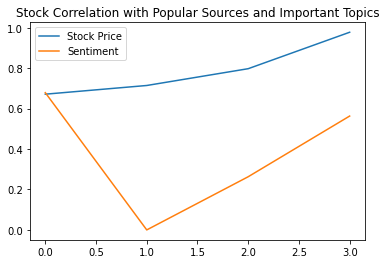

In [ ]:
plt.title('Stock Correlation with Popular Sources and Important Topics')
plt.plot(df_outerSource['ScaledClose'], label='Stock Price')
plt.plot(df_outerSource['ScaledAverage'], label='Sentiment')
plt.legend()
plt.show();

In [ ]:
corrSource,_=pearsonr(df_outerSource.Close,df_outerSource.AverageCompound)
print(corrSource)

0.21536242872104477


# Trying to give weightage to topics and sources

In [ ]:
import pandas as pd
import requests
from urllib.request import Request, urlopen
from datetime import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
  
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler

In [ ]:
dfTopicSource=pd.read_csv('/content/drive/MyDrive/week2/TopicModellingForGoogle.csv')
dfTopicSource.columns

Index(['Unnamed: 0', 'index', 'title', 'media', 'date', 'datetime', 'desc',
       'link', 'img', 'neg', 'neu', 'pos', 'compound', 'topic',
       'absoluteCompound'],
      dtype='object')

In [ ]:
dfTopicSource.shape

(210, 15)

In [ ]:
news_websites_media_ranking='https://www.w3newspapers.com/newssites/'
req = Request(news_websites_media_ranking, headers={'User-Agent' : "Magic Browser"})
webpage = urlopen(req).read()

In [ ]:
popularity = list ()
popularitySoup=BeautifulSoup(webpage)
for i in popularitySoup.find_all('h3'):
  popularity.append(i.text)
len(popularity)

55

In [ ]:
dfTopicSource['SourceImportance']=0

In [ ]:
for i in range(len(popularity)):
  for j in dfTopicSource.index:
    if(dfTopicSource.media.loc[j]==popularity[i]):
      dfTopicSource['SourceImportance'].loc[j]=i+1    
dfTopicSource

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance
0,0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,0
1,1,8113,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,1_facebook_that_company_oculus,0.2263,0
2,2,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,21
3,3,24339,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182,1_facebook_that_company_oculus,0.3182,0
4,4,32452,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184,1_facebook_that_company_oculus,0.7184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,1_facebook_that_company_oculus,0.6249,0
206,206,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,1_facebook_that_company_oculus,0.6249,0
207,207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506,0
208,208,1556130,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.211,0.789,0.000,-0.7506,1_facebook_that_company_oculus,0.7506,0


In [ ]:
dfTopicSource['topicImportance']=0

In [ ]:
topic_list=['3_billion_facebook_million_stock','2_zuckerberg_donald_trump_ceo']

In [ ]:
for i in dfTopicSource.index:
  if(dfTopicSource['topic'].loc[i] in topic_list):
    dfTopicSource['topicImportance'].loc[i]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dfTopicSource

,Unnamed: 0,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance,topicImportance
0,0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,0,0
1,1,8113,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,1_facebook_that_company_oculus,0.2263,0,0
2,2,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,21,0
3,3,24339,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182,1_facebook_that_company_oculus,0.3182,0,0
4,4,32452,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184,1_facebook_that_company_oculus,0.7184,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,205,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,1_facebook_that_company_oculus,0.6249,0,0
206,206,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,1_facebook_that_company_oculus,0.6249,0,0
207,207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506,0,1
208,208,1556130,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.211,0.789,0.000,-0.7506,1_facebook_that_company_oculus,0.7506,0,0


In [ ]:
dfTopicSource.columns

Index(['Unnamed: 0', 'index', 'title', 'media', 'date', 'datetime', 'desc',
       'link', 'img', 'neg', 'neu', 'pos', 'compound', 'topic',
       'absoluteCompound', 'SourceImportance', 'topicImportance'],
      dtype='object')

In [ ]:
dfTopicSource = dfTopicSource.loc[:, ~dfTopicSource.columns.str.contains('^Unnamed')]
dfTopicSource=dfTopicSource.reset_index(drop=True)
dfTopicSource=dfTopicSource.drop_duplicates()
dfTopicSource.datetime=pd.to_datetime(dfTopicSource.datetime)
type(dfTopicSource.datetime.loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
dfTopicSource

,index,title,media,date,datetime,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance,topicImportance
0,0,Facebook to contact 87 million users affected ...,The Guardian,"Apr 8, 2018",2018-04-08,All 2.2 billion Facebook users will receive a ...,https://www.theguardian.com/technology/2018/ap...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,0,0
1,8113,What You Don’t Know About How Facebook Uses Yo...,The New York Times,"th · Apr 11, 2018",2018-04-11,Facebook tracks both its users and nonusers on...,https://www.nytimes.com/2018/04/11/technology/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,1_facebook_that_company_oculus,0.2263,0,0
2,16226,Facebook-Cambridge Analytica: A timeline of th...,CNBC,"Apr 10, 2018",2018-04-10,Facebook CEO Mark Zuckerberg (C) leaves the of...,https://www.cnbc.com/2018/04/10/facebook-cambr...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,21,0
3,24339,'Utterly horrifying': ex-Facebook insider says...,The Guardian,"Mar 20, 2018",2018-03-20,"Sandy Parakilas, the platform operations manag...",https://www.theguardian.com/news/2018/mar/20/f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.901,0.099,0.3182,1_facebook_that_company_oculus,0.3182,0,0
4,32452,Facebook Privacy Settings: 18 changes you shou...,Trusted Reviews,"Mar 22, 2019",2019-03-22,You can find a list of apps that have access t...,https://www.trustedreviews.com/news/facebook-p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.824,0.176,0.7184,1_facebook_that_company_oculus,0.7184,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1531844,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.786,0.214,0.7184,1_facebook_that_company_oculus,0.7184,0,0
205,1539940,Facebook Removes Network in Ethiopia for Coord...,Adweek,5 days ago,2021-06-17,Facebook Removes Network in Ethiopia for Coord...,https://www.adweek.com/media/facebook-removes-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.841,0.159,0.6249,1_facebook_that_company_oculus,0.6249,0,0
207,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,2021-06-18,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506,0,1
208,1556130,Facebook Inc. Cl A stock outperforms competito...,MarketWatch,4 days ago,2021-06-18,"Shares of Facebook Inc. Cl A FB, +1.64% rose 1...",https://www.marketwatch.com/story/facebook-inc...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.211,0.789,0.000,-0.7506,1_facebook_that_company_oculus,0.7506,0,0


In [ ]:
dfFB=pd.read_csv('/content/drive/MyDrive/week2/FB.csv')
dfFB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2281,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,12250800
2282,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,15795200
2283,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,17232200
2284,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,17794100


In [ ]:
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])
dfTopicSource[["ScaledAverage"]] = scaler.fit_transform(dfTopicSource[["compound"]])

In [ ]:
dfFB=dfFB.rename(columns={'Date':'datetime'})

In [ ]:
dfFB['datetime'] = pd.to_datetime(dfFB.datetime, errors='ignore').dt.date
dfTopicSource['datetime'] = pd.to_datetime(dfTopicSource.datetime, errors='ignore').dt.date

In [ ]:
df_outerSource = pd.merge(dfFB, dfTopicSource,on='datetime')
df_outerSource

,datetime,Open,High,Low,Close,Adj Close,Volume,ScaledClose,index,title,media,date,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance,topicImportance,ScaledAverage
0,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728,170372,"Facebook IPO: What went wrong? - May. 23, 2012",CNN,"May 23, 2012","Facebook's IPO was a mess from day one, with N...",https://money.cnn.com/2012/05/23/technology/fa...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,0_facebook_information_facebooks_data,0.2263,0,0,0.697802
1,2012-09-11,18.920000,19.580000,18.850000,19.430000,19.430000,50508200,0.005328,446135,Mark Zuckerberg: Our Biggest Mistake Was Betti...,TechCrunch,"Sep 11, 2012","Today, Mark Zuckerberg revealed that Facebook'...",https://techcrunch.com/2012/09/11/mark-zuckerb...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,0,0,0.558831
2,2012-10-04,22.320000,22.400000,21.410000,21.950001,21.950001,46892100,0.013227,600188,Facebook: One Billion and Counting - WSJ,The Wall Street Journal,"Oct 4, 2012",Facebook said it has topped one billion monthl...,https://www.wsj.com/articles/SB100008723963904...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.155,0.845,0.000,-0.5267,1_facebook_that_company_oculus,0.5267,0,0,0.235384
3,2014-02-04,62.049999,63.139999,61.820000,62.750000,62.750000,45985500,0.141111,608295,"Facebook: 10 years of social networking, in nu...",The Guardian,"Feb 4, 2014","By the end of 2013, Facebook boasted 1.23bn mo...",https://www.theguardian.com/news/datablog/2014...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767,1_facebook_that_company_oculus,0.4767,0,0,0.266089
4,2014-02-13,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,729890,Here's a List of 58 Gender Options for Faceboo...,ABC News,"Feb 13, 2014","Harrison, who worked on the project, is in the...",http://abcnews.go.com/blogs/headlines/2014/02/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,7,0,0.767625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1491364,Man robbed victim after arranging phone sale o...,KAKE,4 days ago,(KAKE) - Police have arrested a 20-year-old ma...,https://www.kake.com/story/44124691/man-robbed...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2500,1_facebook_that_company_oculus,0.2500,0,0,0.712356
147,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1515652,Lobbyists for Silicon Valley Giants Like Faceb...,Wall Street Journal,4 days ago,Tech industry lobbyists are challenged by the ...,https://www.wsj.com/articles/tech-industrys-gl...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,0_facebook_information_facebooks_data,0.0000,2,0,0.558831
148,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1523748,Facebook says it removed fake Ethiopia account...,Reuters,4 days ago,Facebook said the network posted mainly in Amh...,https://www.reuters.com/technology/facebook-re...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.949,0.051,0.1027,1_facebook_that_company_oculus,0.1027,6,0,0.621899
149,2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1548035,Facebook employees are losing faith in Mark Zu...,Fortune,4 days ago,Facebook CEO Mark Zuckerberg has long faced sc...,https://fortune.com/2021/06/17/facebook-ceo-ma...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.225,0.775,0.000,-0.7506,2_zuckerberg_donald_trump_ceo,0.7506,0,1,0.097887


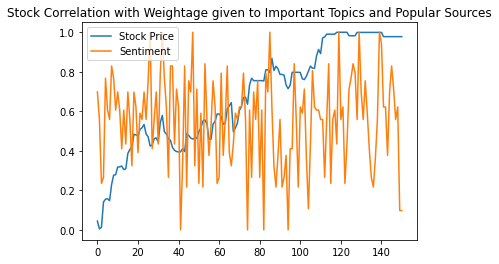

In [ ]:
plt.title('Stock Correlation with Weightage given to Important Topics and Popular Sources')
plt.plot(df_outerSource['ScaledClose'], label='Stock Price')
plt.plot(df_outerSource['ScaledAverage'], label='Sentiment')
plt.legend()
plt.show();

In [ ]:
corrSource,_=pearsonr(df_outerSource.Close,df_outerSource.compound)
print(corrSource)

-0.013104697787745178


In [ ]:
df_outerSource=df_outerSource.set_index('datetime')

In [ ]:
df_outerSource

,Open,High,Low,Close,Adj Close,Volume,ScaledClose,index,title,media,date,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance,topicImportance,ScaledAverage
datetime,,,,,,,,,,,,,,,,,,,,,,,
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728,170372,"Facebook IPO: What went wrong? - May. 23, 2012",CNN,"May 23, 2012","Facebook's IPO was a mess from day one, with N...",https://money.cnn.com/2012/05/23/technology/fa...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,0_facebook_information_facebooks_data,0.2263,0,0,0.697802
2012-09-11,18.920000,19.580000,18.850000,19.430000,19.430000,50508200,0.005328,446135,Mark Zuckerberg: Our Biggest Mistake Was Betti...,TechCrunch,"Sep 11, 2012","Today, Mark Zuckerberg revealed that Facebook'...",https://techcrunch.com/2012/09/11/mark-zuckerb...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,0,0,0.558831
2012-10-04,22.320000,22.400000,21.410000,21.950001,21.950001,46892100,0.013227,600188,Facebook: One Billion and Counting - WSJ,The Wall Street Journal,"Oct 4, 2012",Facebook said it has topped one billion monthl...,https://www.wsj.com/articles/SB100008723963904...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.155,0.845,0.000,-0.5267,1_facebook_that_company_oculus,0.5267,0,0,0.235384
2014-02-04,62.049999,63.139999,61.820000,62.750000,62.750000,45985500,0.141111,608295,"Facebook: 10 years of social networking, in nu...",The Guardian,"Feb 4, 2014","By the end of 2013, Facebook boasted 1.23bn mo...",https://www.theguardian.com/news/datablog/2014...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767,1_facebook_that_company_oculus,0.4767,0,0,0.266089
2014-02-13,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,729890,Here's a List of 58 Gender Options for Faceboo...,ABC News,"Feb 13, 2014","Harrison, who worked on the project, is in the...",http://abcnews.go.com/blogs/headlines/2014/02/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,7,0,0.767625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1491364,Man robbed victim after arranging phone sale o...,KAKE,4 days ago,(KAKE) - Police have arrested a 20-year-old ma...,https://www.kake.com/story/44124691/man-robbed...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2500,1_facebook_that_company_oculus,0.2500,0,0,0.712356
2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1515652,Lobbyists for Silicon Valley Giants Like Faceb...,Wall Street Journal,4 days ago,Tech industry lobbyists are challenged by the ...,https://www.wsj.com/articles/tech-industrys-gl...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,0_facebook_information_facebooks_data,0.0000,2,0,0.558831
2021-06-18,334.529999,336.149994,329.000000,329.660004,329.660004,23025100,0.977714,1523748,Facebook says it removed fake Ethiopia account...,Reuters,4 days ago,Facebook said the network posted mainly in Amh...,https://www.reuters.com/technology/facebook-re...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.949,0.051,0.1027,1_facebook_that_company_oculus,0.1027,6,0,0.621899


In [ ]:
train_dfs = df_outerSource.copy()

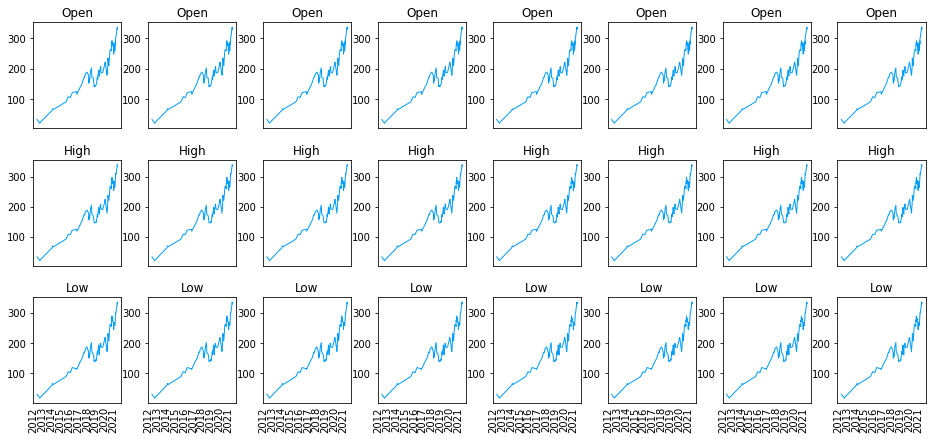

In [ ]:
# Plot each column
register_matplotlib_converters()
nrows = 3
ncols = int(round(train_dfs.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x = train_dfs.index

for f, i in enumerate(range(nrows)):
    for j in range(ncols):
        ax[i, j].xaxis.set_major_locator(mdates.YearLocator())
        assetname = train_dfs.columns[f]
        y = train_dfs[assetname]
        ax[i, j].plot(x, y, color='#039dfc', label='Facebook', linewidth=1.0)
        ax[i, j].set_title(assetname)
        ax[i, j].tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show()

In [ ]:
# Indexing Batches
train_df = train_dfs.sort_values(by=['datetime']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,ScaledClose,index,title,media,date,desc,link,img,neg,neu,pos,compound,topic,absoluteCompound,SourceImportance,topicImportance,ScaledAverage
0,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.044728,170372,"Facebook IPO: What went wrong? - May. 23, 2012",CNN,"May 23, 2012","Facebook's IPO was a mess from day one, with N...",https://money.cnn.com/2012/05/23/technology/fa...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.917,0.083,0.2263,0_facebook_information_facebooks_data,0.2263,0,0,0.697802
1,18.920000,19.580000,18.850000,19.430000,19.430000,50508200,0.005328,446135,Mark Zuckerberg: Our Biggest Mistake Was Betti...,TechCrunch,"Sep 11, 2012","Today, Mark Zuckerberg revealed that Facebook'...",https://techcrunch.com/2012/09/11/mark-zuckerb...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000,1_facebook_that_company_oculus,0.0000,0,0,0.558831
2,22.320000,22.400000,21.410000,21.950001,21.950001,46892100,0.013227,600188,Facebook: One Billion and Counting - WSJ,The Wall Street Journal,"Oct 4, 2012",Facebook said it has topped one billion monthl...,https://www.wsj.com/articles/SB100008723963904...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.155,0.845,0.000,-0.5267,1_facebook_that_company_oculus,0.5267,0,0,0.235384
3,62.049999,63.139999,61.820000,62.750000,62.750000,45985500,0.141111,608295,"Facebook: 10 years of social networking, in nu...",The Guardian,"Feb 4, 2014","By the end of 2013, Facebook boasted 1.23bn mo...",https://www.theguardian.com/news/datablog/2014...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767,1_facebook_that_company_oculus,0.4767,0,0,0.266089
4,64.180000,67.330002,64.050003,67.330002,67.330002,61911700,0.155466,729890,Here's a List of 58 Gender Options for Faceboo...,ABC News,"Feb 13, 2014","Harrison, who worked on the project, is in the...",http://abcnews.go.com/blogs/headlines/2014/02/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.915,0.085,0.3400,1_facebook_that_company_oculus,0.3400,7,0,0.767625


In [ ]:
train_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ScaledClose',
       'index', 'title', 'media', 'date', 'desc', 'link', 'img', 'neg', 'neu',
       'pos', 'compound', 'topic', 'absoluteCompound', 'SourceImportance',
       'topicImportance', 'ScaledAverage'],
      dtype='object')

In [ ]:
# List of considered Features
FEATURES = [#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
            'ScaledClose',
       #'index', 'title', 'media', 'date', 'desc', 'link', 'img', 'neg', 'neu',
       #'pos', 'compound', 'topic', 'absoluteCompound', 
       'SourceImportance',
       'topicImportance', 'ScaledAverage']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['ScaledClose', 'SourceImportance', 'topicImportance', 'ScaledAverage']


,ScaledClose,SourceImportance,topicImportance,ScaledAverage,Prediction
146,0.977714,0,1,0.829280,0.977714
147,0.977714,0,0,0.712356,0.977714
148,0.977714,2,0,0.558831,0.977714
149,0.977714,6,0,0.621899,0.977714
150,0.977714,0,0,0.097887,0.977714


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(151, 4)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.7)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(56, 50, 4) (56,)
(45, 50, 4) (45,)
0.4961447136960627
0.4961447136960627


In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 200 Input shape: 50 4


In [ ]:
# Training the model
epochs = 10
early_stop = EarlyStopping(monitor='loss', patience=1)
history = model.fit(x_train, y_train, 
                    batch_size=1, 
                    epochs=epochs, 
                    callbacks=[early_stop])

Epoch 1/10
56/56 [==============================] - 2s 31ms/step - loss: 0.0051
Epoch 2/10
56/56 [==============================] - 2s 32ms/step - loss: 0.0042
Epoch 3/10
56/56 [==============================] - 2s 31ms/step - loss: 0.0043


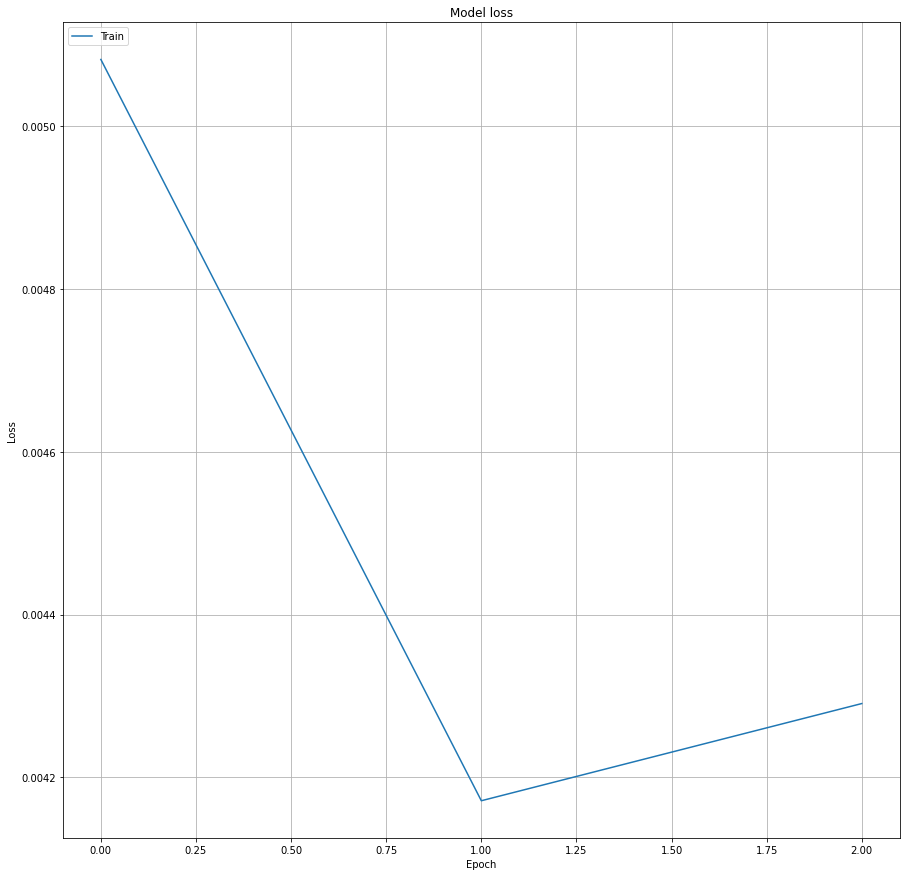

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(15, 15), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred = model.predict(x_test)
# Get the predicted values
y_pred_unscaled = scaler_pred.inverse_transform(y_pred)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.13
Mean Absolute Percentage Error (MAPE): 12.98 %
Median Absolute Percentage Error (MDAPE): 14.26 %


In [ ]:
def rev_min_max_func(scaled_val):
    max_val = max(df_outerSource['Close'])
    min_val = min(df_outerSource['Close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

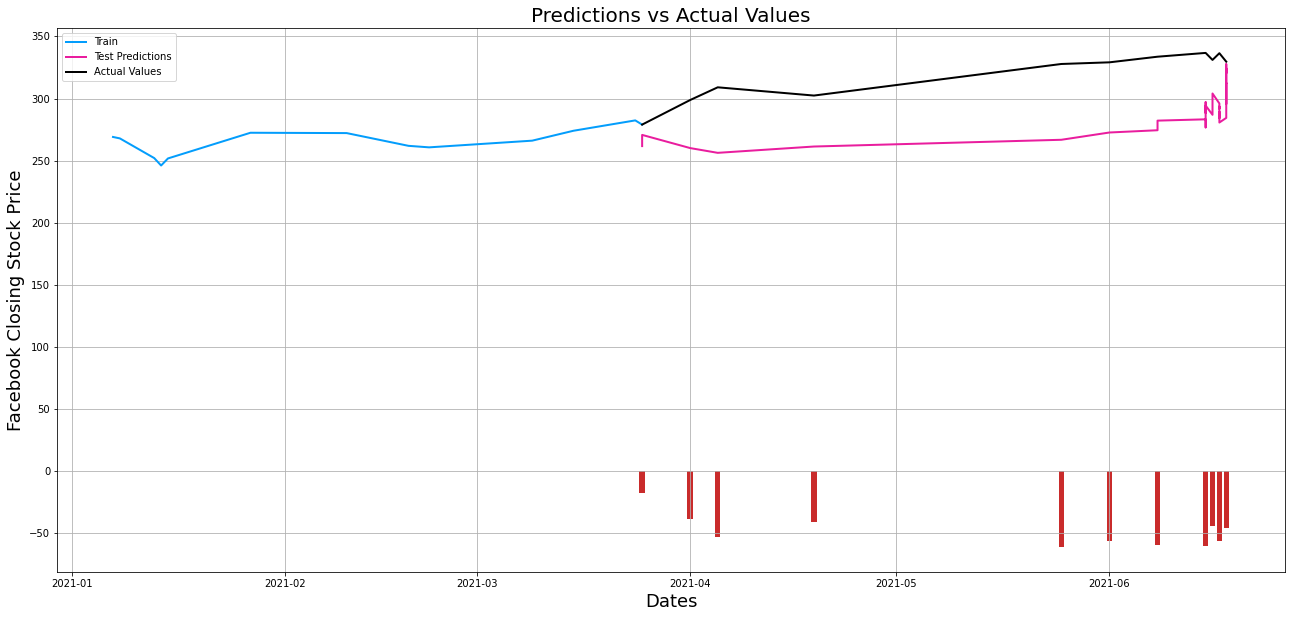

In [ ]:
# Get the predicted values
pred_unscaled = scaler_pred.inverse_transform(y_pred_unscaled)

# The date from which on the date is displayed
display_start_date = pd.Timestamp('today') - timedelta(days=200)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
train['Inverse']=train['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid['Inverse']=valid['ScaledClose'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Prediction", pred_unscaled.ravel(), True)
valid['InversePrediction']=valid['Prediction'].apply(lambda x: rev_min_max_func(x))
valid.insert(1, "Difference", valid["InversePrediction"] - valid["Inverse"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > display_start_date]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Inverse"]]
xv = valid['Date']; yv = valid[["Inverse", "InversePrediction"]]
plt.title("Predictions vs Actual Values", fontsize=20)
plt.xlabel("Dates", fontsize=18)
plt.ylabel("Facebook Closing Stock Price", fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["InversePrediction"], color="#E91D9E", linewidth=2.0)
plt.plot(xv, yv["Inverse"], color="black", linewidth=2.0)


# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
plt.grid()
plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")
plt.show()

In [ ]:
new_df = data_filtered

# Get the last 100 day closing price values and scale the data to be values between 0 and 1
last_100_days = new_df[-100:].values
last_100_days_scaled = scaler.transform(last_100_days)

# Create an empty list and Append past 100 days
X_test_new = []
X_test_new.append(last_100_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled)

# Print last price and predicted price for the next day
price_today = rev_min_max_func(round(new_df['ScaledClose'][len(new_df)-1], 2))
predicted_price = rev_min_max_func(round(pred_price_unscaled.ravel()[0], 2))
percent = round(100 - (predicted_price * 100)/price_today, 2)

plus = '+'; minus = '-'
print(f'The close price for Facebook on 21 June 2021 was {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if percent > 0 else minus}{percent}%)')

The close price for Facebook on 21 June 2021 was 330.4036
The predicted close price is 311.3644052958488 (+5.76%)


# Historical Stock Data Facebook

In [ ]:
# Remote data access for pandas
import pandas_datareader as webreader #Not required
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfFB=pd.read_csv("/content/drive/MyDrive/week2/FB.csv")
dfFB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
dfFB=dfFB.set_index('Date')
train_dfs = dfFB.copy()

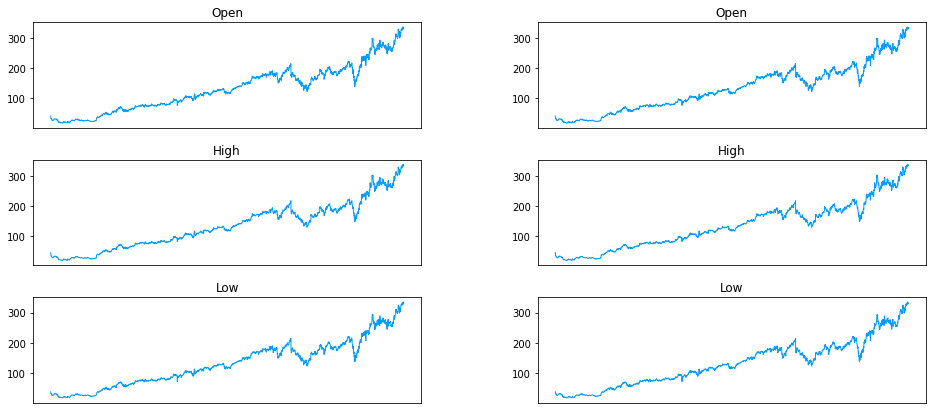

In [ ]:
# Plot each column
register_matplotlib_converters()
nrows = 3
ncols = int(round(train_dfs.shape[1] / nrows, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
x = train_dfs.index

for f, i in enumerate(range(nrows)):
    for j in range(ncols):
        ax[i, j].xaxis.set_major_locator(mdates.YearLocator())
        assetname = train_dfs.columns[f]
        y = train_dfs[assetname]
        ax[i, j].plot(x, y, color='#039dfc', label='Facebook', linewidth=1.0)
        ax[i, j].set_title(assetname)
        ax[i, j].tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show()

In [ ]:
# Indexing Batches
train_df = train_dfs.sort_values(by=['Date']).copy()

# We safe a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
# List of considered Features
FEATURES = ['Close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Close']


,Close,Prediction
2281,336.769989,336.769989
2282,336.750000,336.750000
2283,331.079987,331.079987
2284,336.510010,336.510010
2285,329.660004,329.660004


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(2286, 1)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 75

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.7)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1526, 75, 1) (1526,)
(685, 75, 1) (685,)
18.58
18.58


In [ ]:
type(x_test),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print("Number of neurons:",n_neurons, "Input shape:",x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=False, 
               input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Number of neurons: 75 Input shape: 75 1


In [ ]:
# Training the model
epochs = 10
early_stop = EarlyStopping(monitor='loss', patience=1)
history = model.fit(x_train, y_train, 
                    batch_size=1, 
                    epochs=epochs, 
                    callbacks=[early_stop])

Epoch 1/10
1526/1526 [==============================] - 30s 10ms/step - loss: 7906.4822
Epoch 2/10
1526/1526 [==============================] - 16s 11ms/step - loss: 1676.8646
Epoch 3/10
1526/1526 [==============================] - 16s 11ms/step - loss: 720.0858
Epoch 4/10
1526/1526 [==============================] - 16s 11ms/step - loss: 199.6025
Epoch 5/10
1526/1526 [==============================] - 16s 10ms/step - loss: 53.2341
Epoch 6/10
1526/1526 [==============================] - 16s 10ms/step - loss: 23.9688
Epoch 7/10
1526/1526 [==============================] - 16s 11ms/step - loss: 11.5196
Epoch 8/10
1526/1526 [==============================] - 16s 11ms/step - loss: 12.1080
Epoch 9/10
1526/1526 [==============================] - 16s 10ms/step - loss: 9.4132
Epoch 10/10
1526/1526 [==============================] - 16s 11ms/step - loss: 8.9591


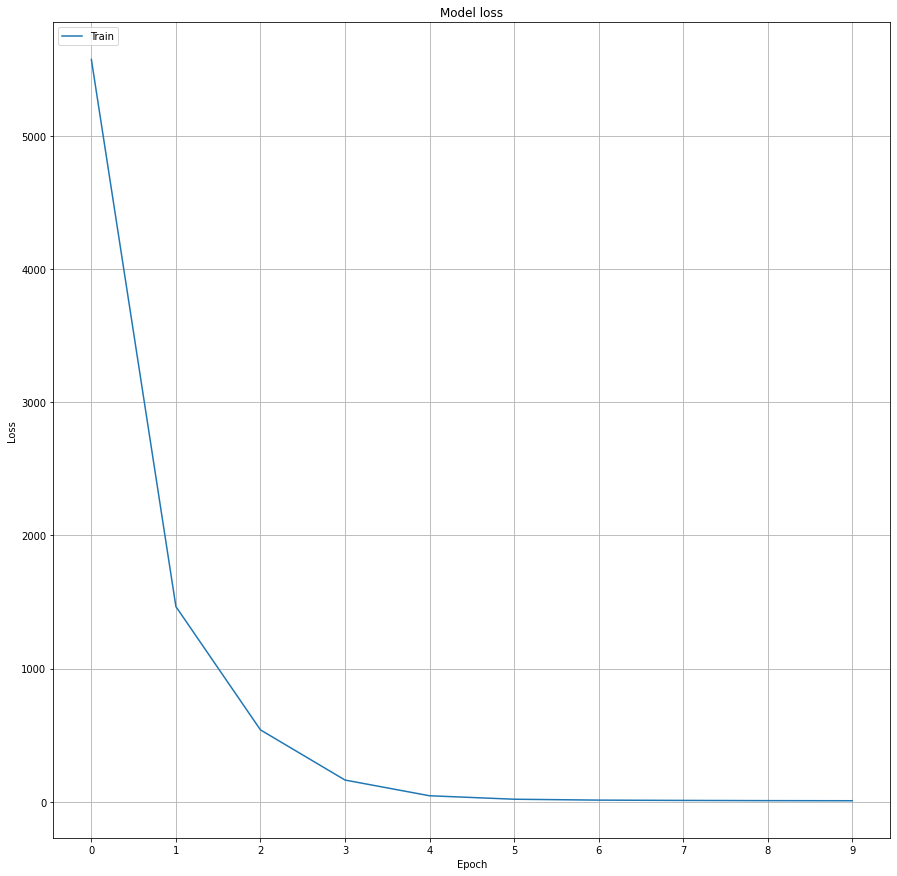

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(15, 15), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred = model.predict(x_test)
# Get the predicted values
y_pred_unscaled = y_pred
y_test_unscaled = y_test.reshape(-1, 1)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_unscaled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 33.2
Mean Absolute Percentage Error (MAPE): 12.4 %
Median Absolute Percentage Error (MDAPE): 4.85 %


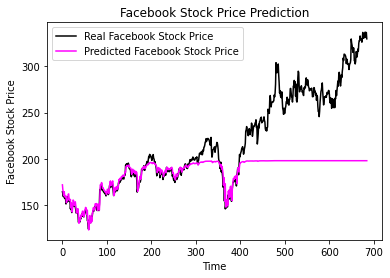

In [ ]:
# Visualising the results
plt.plot(y_test, color = 'black', label = 'Real Facebook Stock Price')
plt.plot(y_pred, color = 'magenta', label = 'Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()

In [ ]:
historical_model=model.save('/content/drive/MyDrive/week2/historical/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/historical/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/week2/historical/assets


# Ensemble by averaging

## Imports and APIs

In [ ]:
!pip install GoogleNews

In [ ]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce

#Scaling
from sklearn.preprocessing import MinMaxScaler

#Web scraping for source popularity
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

#Loading saved models
from keras.models import load_model

## The testing dataset

In [ ]:
dfEnsemble=pd.read_csv('/content/drive/MyDrive/week2/FBTest.csv')
dfEnsemble

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-09,245.000000,246.529999,239.240005,244.500000,244.500000,22174900
1,2020-07-10,243.690002,245.490005,239.320007,245.070007,245.070007,22982700
2,2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900
3,2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100
4,2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600
...,...,...,...,...,...,...,...
247,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
248,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
249,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
250,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


In [ ]:
dfEnsemble.Date=pd.to_datetime(dfEnsemble.Date).dt.date
type(dfEnsemble.Date[0])

datetime.date

## Model 1: Historical data
Attributes:


1.   Closing price



In [ ]:
historical_model=load_model('/content/drive/MyDrive/week2/historical/')

In [ ]:
dfHistorical=dfEnsemble.copy()

In [ ]:
dfHistorical=dfHistorical.set_index('Date')
dfHistorical=dfHistorical['Close']
dfHistorical

Date
2020-07-09    244.500000
2020-07-10    245.070007
2020-07-13    239.000000
2020-07-14    239.729996
2020-07-15    240.279999
                 ...    
2021-07-01    354.390015
2021-07-02    354.700012
2021-07-06    352.779999
2021-07-07    350.489990
2021-07-08    345.649994
Name: Close, Length: 252, dtype: float64

In [ ]:
# List of considered Features
FEATURES = ['Close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(dfHistorical)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Close']


,Close,Prediction
Date,,
2021-07-01,354.390015,354.390015
2021-07-02,354.700012,354.700012
2021-07-06,352.779999,352.779999
2021-07-07,350.489990,350.489990
2021-07-08,345.649994,345.649994


In [ ]:
# List of considered Features
FEATURES = ['Close']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(dfHistorical)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Close']


,Close,Prediction
Date,,
2021-07-01,354.390015,354.390015
2021-07-02,354.700012,354.700012
2021-07-06,352.779999,352.779999
2021-07-07,350.489990,350.489990
2021-07-08,345.649994,345.649994


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(252, 1)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 75

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = 0

test_data = np_data
# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
#x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
#print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
#print(x_train[1][sequence_length-1][index_Close])
#print(y_train[0])

(177, 75, 1) (177,)


In [ ]:
y_historical=historical_model.predict(x_test)

In [ ]:
y=y_historical.tolist()
HistoricalOutput=list ()
for i in y:
  HistoricalOutput.append(i[0])
HistoricalOutput

[198.0721435546875,
 198.07347106933594,
 198.0719451904297,
 198.07330322265625,
 198.0669403076172,
 198.07254028320312,
 198.06259155273438,
 198.05955505371094,
 198.0637664794922,
 198.0732879638672,
 198.07379150390625,
 198.07388305664062,
 198.07252502441406,
 198.06997680664062,
 198.071533203125,
 198.07110595703125,
 198.07177734375,
 198.07241821289062,
 198.07115173339844,
 198.06961059570312,
 198.0699920654297,
 198.06814575195312,
 198.06710815429688,
 198.07150268554688,
 198.07130432128906,
 198.0720672607422,
 198.0718536376953,
 198.07366943359375,
 198.07383728027344,
 198.07321166992188,
 198.0727081298828,
 198.07363891601562,
 198.0734405517578,
 198.07223510742188,
 198.0718994140625,
 198.07046508789062,
 198.07064819335938,
 198.0712432861328,
 198.07131958007812,
 198.07083129882812,
 198.07156372070312,
 198.07008361816406,
 198.0662078857422,
 198.06674194335938,
 198.0662078857422,
 198.07147216796875,
 198.07174682617188,
 198.06961059570312,
 198.070114

In [ ]:
dfHistoricalOutput=data_filtered_ext[['Prediction']][:177]
dfHistoricalOutput['HistoricalOutput']=HistoricalOutput
dfHistoricalOutput

,Prediction,HistoricalOutput
Date,,
2020-07-09,244.500000,198.072144
2020-07-10,245.070007,198.073471
2020-07-13,239.000000,198.071945
2020-07-14,239.729996,198.073303
2020-07-15,240.279999,198.066940
...,...,...
2021-03-16,279.279999,198.053070
2021-03-17,284.010010,198.049896
2021-03-18,278.619995,198.048309


## Model 2: Sentiment Analysis by Source
Attributes

*   Source Popularity List
  * Scraping
*   GoogleNews API for the required range
  * Sentiment Analysis using vader
  * Pre-processing
  * Filtering by source popularity
*   Facebook Closing price for those dates
  * Need to make sure its in the date range of model 1

### Popularity list

In [ ]:
news_websites_media_ranking='https://www.w3newspapers.com/newssites/'
req = Request(news_websites_media_ranking, headers={'User-Agent' : "Magic Browser"})
webpage = urlopen(req).read()

In [ ]:
popularity = list ()
popularitySoup=BeautifulSoup(webpage)
for i in popularitySoup.find_all('h3'):
  popularity.append(i.text)
len(popularity)

55

### Google News Scraping

Dates required are between 2020-07-09 to 2021-03-19

In [ ]:
dfgoogle=pd.DataFrame()

In [ ]:
from GoogleNews import GoogleNews
googlenews = GoogleNews(lang='en',start='09/07/2020',end='19/03/2021')
googlenews.search('Facebook')

In [ ]:
for i in range(2,googlenews.total_count()//100):
  print("Extracting news at page",i)
  googlenews.get_page(i)
  dfgoogle=dfgoogle.append(pd.DataFrame(googlenews.results()))
  print("Extracted")
dfgoogle

Extracting news at page 2
Extracted
Extracting news at page 3
Extracted
Extracting news at page 4
Extracted
Extracting news at page 5
Extracted
Extracting news at page 6
Extracted
Extracting news at page 7
Extracted
Extracting news at page 8
Extracted
Extracting news at page 9
Extracted
Extracting news at page 10
Extracted
Extracting news at page 11
Extracted
Extracting news at page 12
Extracted
Extracting news at page 13
Extracted
Extracting news at page 14
Extracted
Extracting news at page 15
Extracted
Extracting news at page 16
Extracted
Extracting news at page 17
Extracted
Extracting news at page 18
Extracted
Extracting news at page 19
'NoneType' object is not iterable
Extracted
Extracting news at page 20
'NoneType' object is not iterable
Extracted
Extracting news at page 21
'NoneType' object is not iterable
Extracted
Extracting news at page 22
'NoneType' object is not iterable
Extracted
Extracting news at page 23
'NoneType' object is not iterable
Extracted
Extracting news at page 

KeyboardInterrupt: ignored

In [ ]:
dfgoogle

,title,media,date,datetime,desc,link,img
0,Facebook bans news in Australia as fight with ...,CNN,"Feb 19, 2021",2021-02-19 00:00:00.000000,Facebook (FB) has barred Australians from find...,https://www.cnn.com/2021/02/17/media/facebook-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Facebook to Prohibit Sharing of News Content i...,The Wall Street Journal,"g · Feb 17, 2021",2021-02-17 00:00:00.000000,Tech giant says the government continues to mi...,https://www.wsj.com/articles/facebook-to-prohi...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Facebook Blocks News In Australia Over Governm...,NPR,"th · Feb 17, 2021",2021-02-17 00:00:00.000000,Facebook said Wednesday that it is preventing ...,https://www.npr.org/2021/02/17/968723929/faceb...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,"Facebook board upholds Trump ban, just not ind...",AP News,"May 5, 2021",2021-05-05 00:00:00.000000,"6 Capitol riot, the company's quasi-independen...",https://apnews.com/article/trump-facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,"Facebook Ban On Donald Trump Will Hold, Social...",NPR,"th · May 5, 2021",2021-05-05 00:00:00.000000,Facebook was justified in its decision to susp...,https://www.npr.org/2021/05/05/987679590/faceb...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
169,Woman transforms $20 find from Facebook Market...,Yahoo,1 day ago,2021-07-10 12:40:46.515554,Woman transforms $20 find from Facebook Market...,https://www.yahoo.com/lifestyle/woman-transfor...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
170,Wall Street's top analysts have turned more bu...,CNBC,27 mins ago,NaT,Berg is the eighth best-performing analyst on ...,https://www.cnbc.com/2021/07/11/wall-street-an...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
171,India an innovation crucible for Facebook prod...,The Economic Times,1 day ago,2021-07-10 12:40:46.804985,Facebook India MD Ajit Mohan on India being a ...,https://economictimes.indiatimes.com/tech/tech...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
172,Asia’s live-streamers cash in as Covid-19 send...,South China Morning Post,1 day ago,2021-07-10 12:40:46.806992,"Amid rising unemployment, it is a tempting sou...",https://www.scmp.com/week-asia/economics/artic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


### Filtering by sources

In [ ]:
dfgoogle = dfgoogle.loc[dfgoogle['media'].isin(popularity)]
dfgoogle

,title,media,date,datetime,desc,link,img
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05 00:00:00.000000,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
10,Facebook earnings beat but the company warns o...,CNBC,"Jan 27, 2021",2021-01-27 00:00:00.000000,"In the U.S. and Canada, Facebook's user base f...",https://www.cnbc.com/2021/01/27/facebook-fb-ea...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
12,Apple’s Privacy Change Will Hit Facebook’s Cor...,Wall Street Journal,"g · Jan 29, 2021",2021-01-29 00:00:00.000000,New feature on iPhones will limit Facebook's a...,https://www.wsj.com/articles/apples-privacy-ch...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
13,"Facebook, Twitter make editorial decisions to ...",CNBC,"Oct 14, 2020",2020-10-14 00:00:00.000000,Facebook and Twitter decided to limit the dist...,https://www.cnbc.com/2020/10/14/facebook-makes...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
16,Facebook takes down Ugandan pro-Museveni accou...,Reuters,"Jan 11, 2021",2021-01-11 00:00:00.000000,KAMPALA (Reuters) - Facebook has taken down a ...,https://www.reuters.com/article/uk-uganda-elec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
124,Facebook Antitrust Lawsuit: What You Need To Know,Forbes,4 days ago,2021-07-07 12:40:45.253219,"According to the government, Facebook Inc. (FB...",https://www.forbes.com/advisor/investing/updat...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
128,‘I raped you’: Facebook message leads to arres...,ABC News,3 days ago,2021-07-08 12:40:45.261329,Keeler was on vacation with her boyfriend last...,https://abcnews.go.com/US/raped-facebook-messa...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
136,"Facebook, JPMorgan Chase, Netflix: Stocks That...",Wall Street Journal,1 day ago,2021-07-10 12:40:45.555974,"Facebook, JPMorgan Chase, Netflix: Stocks That...",https://www.wsj.com/articles/facebook-jpmorgan...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
141,Why You Should Stop Using Your Facebook Messen...,Forbes,1 day ago,2021-07-10 12:40:45.902018,"If you're a regular reader of this column, you...",https://www.forbes.com/sites/zakdoffman/2021/0...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


### Sentiment Analysis

In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
from datetime import datetime
# Iterate through the headlines and get the polarity scores using vader
scores = dfgoogle['desc'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
dfgoogle = dfgoogle.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
dfgoogle['datetime'] = pd.to_datetime(dfgoogle.datetime,format='%Y%m%d', errors='ignore').dt.date

dfgoogle.head()

,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.87,0.072,0.1027
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.87,0.072,0.1027
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.87,0.072,0.1027
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.87,0.072,0.1027
5,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.87,0.072,0.1027


In [ ]:
dfgoogle=dfgoogle.drop_duplicates()
dfgoogle=dfgoogle.reset_index(drop=True)
dfgoogle

,title,media,date,datetime,desc,link,img,neg,neu,pos,compound
0,Facebook has six months to determine if Trump ...,Reuters,"on · May 5, 2021",2021-05-05,May 5 (Reuters) - Facebook Inc's (FB.O) oversi...,https://www.reuters.com/world/us/facebook-over...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.058,0.870,0.072,0.1027
1,Facebook earnings beat but the company warns o...,CNBC,"Jan 27, 2021",2021-01-27,"In the U.S. and Canada, Facebook's user base f...",https://www.cnbc.com/2021/01/27/facebook-fb-ea...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767
2,Apple’s Privacy Change Will Hit Facebook’s Cor...,Wall Street Journal,"g · Jan 29, 2021",2021-01-29,New feature on iPhones will limit Facebook's a...,https://www.wsj.com/articles/apples-privacy-ch...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.3612
3,"Facebook, Twitter make editorial decisions to ...",CNBC,"Oct 14, 2020",2020-10-14,Facebook and Twitter decided to limit the dist...,https://www.cnbc.com/2020/10/14/facebook-makes...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
4,Facebook takes down Ugandan pro-Museveni accou...,Reuters,"Jan 11, 2021",2021-01-11,KAMPALA (Reuters) - Facebook has taken down a ...,https://www.reuters.com/article/uk-uganda-elec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.4019
5,"Trump sues Facebook, Twitter and Google, claim...",Reuters,3 days ago,2021-07-08,Trump is seeking class action status for the l...,https://www.reuters.com/world/us/trump-says-he...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.114,0.886,0.000,-0.4767
6,Here's what Facebook will show if a candidate ...,CNBC,"Nov 2, 2020",2020-11-02,Facebook is ready to label content from any ca...,https://www.cnbc.com/2020/11/02/facebook-will-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.3612
7,How Facebook and Twitter decided to take down ...,NBC News,"Jan 14, 2021",2021-01-14,Mark Zuckerberg started to consider indefinite...,https://www.nbcnews.com/tech/tech-news/how-fac...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
8,Facebook closes above $1 trillion market cap f...,CNBC,2 weeks ago,2021-06-27,Facebook has hit $1 trillion in market capital...,https://www.cnbc.com/2021/06/28/facebook-hits-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.069,0.855,0.076,0.0516
9,"No, Facebook Didn’t Restore Trump's Account Today",Forbes,1 month ago,2021-06-11,Social media users circulated photos Wednesday...,https://www.forbes.com/sites/joewalsh/2021/06/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.827,0.173,0.5574


In [ ]:
dfgoogle.to_csv('GoogleSourceEnsembleData.csv')

### Generating Attributes

In [ ]:
dfFB=dfEnsemble.rename(columns={'Date':'datetime'})
dfFB

,datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-07-09,245.000000,246.529999,239.240005,244.500000,244.500000,22174900
1,2020-07-10,243.690002,245.490005,239.320007,245.070007,245.070007,22982700
2,2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900
3,2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100
4,2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600
...,...,...,...,...,...,...,...
247,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
248,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
249,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
250,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


In [ ]:
dfSentiment=pd.merge(dfFB,dfgoogle,on='datetime')
dfSentiment

,datetime,Open,High,Low,Close,Adj Close,Volume,title,media,date,desc,link,img,neg,neu,pos,compound
0,2020-09-25,249.399994,255.750000,246.610001,254.820007,254.820007,18351300,While Facebook works to create an oversight bo...,NBC News,"Sep 25, 2020",Some of Facebook's most vocal critics are tire...,https://www.nbcnews.com/tech/tech-news/faceboo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.179,0.821,0.000,-0.5859
1,2020-10-13,277.579987,279.100006,273.390015,276.140015,276.140015,18063300,Facebook says it will finally ban anti-vaccina...,CNBC,"Oct 13, 2020",Facebook said Tuesday it is launching a new gl...,https://www.cnbc.com/2020/10/13/facebook-bans-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
2,2020-10-14,277.619995,278.750000,271.500000,271.820007,271.820007,15577800,"Facebook, Twitter make editorial decisions to ...",CNBC,"Oct 14, 2020",Facebook and Twitter decided to limit the dist...,https://www.cnbc.com/2020/10/14/facebook-makes...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000
3,2020-11-02,264.600006,270.470001,257.339996,261.359985,261.359985,27165700,Here's what Facebook will show if a candidate ...,CNBC,"Nov 2, 2020",Facebook is ready to label content from any ca...,https://www.cnbc.com/2020/11/02/facebook-will-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.3612
4,2020-12-16,274.760010,277.859985,272.510010,275.670013,275.670013,15885000,Facebook blasts Apple in new ads over iPhone p...,CNBC,"Dec 16, 2020",Facebook is running ads Wednesday decrying App...,https://www.cnbc.com/2020/12/16/facebook-blast...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.845,0.155,0.5574
5,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300,Facebook takes down Ugandan pro-Museveni accou...,Reuters,"Jan 11, 2021",KAMPALA (Reuters) - Facebook has taken down a ...,https://www.reuters.com/article/uk-uganda-elec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,0.909,0.091,0.4019
6,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300,"Amazon, Microsoft, Facebook and others pause p...",CNBC,"Jan 11, 2021","Tech companies including Amazon, Facebook, Goo...",https://www.cnbc.com/2021/01/11/facebook-halts...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.179,0.821,0.000,-0.5859
7,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300,Facebook Says It Is Removing All Content Menti...,Wall Street Journal,"g · Jan 11, 2021",Facebook Says It Is Removing All Content Menti...,https://www.wsj.com/articles/facebook-says-it-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.103,0.815,0.082,-0.1779
8,2021-01-11,260.480011,263.470001,255.899994,256.839996,256.839996,30412300,Facebook bans all 'stop the steal' content,NBC News,"Jan 11, 2021",Facebook bans all 'stop the steal' content. Th...,https://www.nbcnews.com/tech/tech-news/faceboo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.132,0.868,0.000,-0.5423
9,2021-01-14,253.399994,255.029999,244.610001,245.639999,245.639999,29739400,How Facebook and Twitter decided to take down ...,NBC News,"Jan 14, 2021",Mark Zuckerberg started to consider indefinite...,https://www.nbcnews.com/tech/tech-news/how-fac...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",0.000,1.000,0.000,0.0000


In [ ]:
dfSentiment[["ScaledClose"]] = scaler.fit_transform(dfSentiment[["Close"]])

### Model prediction

In [ ]:
saved_model=load_model('/content/drive/MyDrive/week2/')

In [ ]:
dfSentiment=dfSentiment.set_index('datetime')
dfSentiment=dfSentiment[['ScaledClose','compound']]
dfSentiment

,ScaledClose,compound
datetime,,
2020-09-25,0.087554,-0.5859
2020-10-13,0.290892,0.0000
2020-10-14,0.249690,0.0000
2020-11-02,0.149928,0.3612
2020-12-16,0.286409,0.5574
2021-01-11,0.106819,0.4019
2021-01-11,0.106819,-0.5859
2021-01-11,0.106819,-0.1779
2021-01-11,0.106819,-0.5423


In [ ]:
# List of considered Features
FEATURES = ['ScaledClose','compound']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(dfSentiment)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['ScaledClose', 'compound']


,ScaledClose,compound,Prediction
datetime,,,
2021-06-11,0.816595,-0.2732,0.816595
2021-06-11,0.816595,-0.4767,0.816595
2021-07-07,1.000000,0.0516,1.000000
2021-07-08,0.953839,-0.4767,0.953839
2021-07-08,0.953839,0.3612,0.953839


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(30, 2)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 10

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = 0

test_data = np_data
# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
#x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
#print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(20, 10, 2) (20,)


In [ ]:
y_sentiment=saved_model.predict(x_test)

In [ ]:
y=y_sentiment.tolist()
SentimentOutput=list ()
for i in y:
  SentimentOutput.append(i[0])
SentimentOutput

[0.45645999908447266,
 0.4693480134010315,
 0.4619005024433136,
 0.47075632214546204,
 0.487745076417923,
 0.4870941638946533,
 0.49525827169418335,
 0.5183911919593811,
 0.5507742762565613,
 0.6181950569152832,
 0.7104023098945618,
 0.7712783217430115,
 0.8232887387275696,
 0.8582229018211365,
 0.8885289430618286,
 0.9514753222465515,
 0.9680849313735962,
 0.9976413249969482,
 1.063512921333313,
 1.0761511325836182]

In [ ]:
dfSentimentOutput=data_filtered_ext[['Prediction']][10:]
dfSentimentOutput['SentimentOutput']=SentimentOutput
dfSentimentOutput

,Prediction,SentimentOutput
datetime,,
2021-01-21,0.259704,0.456460
2021-01-27,0.252742,0.469348
2021-01-28,0.184645,0.461901
2021-01-29,0.121030,0.470756
2021-02-11,0.236052,0.487745
2021-03-09,0.191702,0.487094
2021-03-24,0.348117,0.495258
2021-03-26,0.356509,0.518391
2021-04-09,0.637291,0.550774


## Model 3: Macro economic Trends



1.   Scaled Net Income
2.   Scaled Return on Assets
3.   Scaled PE Ratio
4.   Scaled Close



In [ ]:
macro_model=load_model('/content/drive/MyDrive/week2/macro/')

### Getting the attributes

In [ ]:
#Net Income
net_income='https://www.macrotrends.net/stocks/charts/FB/facebook/net-income'
req = Request(net_income)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)
dfNetIncome=dfs[1]
dfNetIncome['datetime']=pd.to_datetime(dfNetIncome['Facebook Quarterly Net Income(Millions of US $)']).dt.date
dfNetIncome['QuarterlyNetIncome']=dfNetIncome['Facebook Quarterly Net Income(Millions of US $).1'].str.lstrip('$')
for i in range(len(dfNetIncome.QuarterlyNetIncome)):
  if(isinstance(dfNetIncome.QuarterlyNetIncome[i],str)):
    dfNetIncome.QuarterlyNetIncome[i]=dfNetIncome.QuarterlyNetIncome[i].replace(',','')
    dfNetIncome.QuarterlyNetIncome[i]=float(dfNetIncome.QuarterlyNetIncome[i])
dfNetIncome[["ScaledNetIncome"]] = scaler.fit_transform(dfNetIncome[["QuarterlyNetIncome"]])
dfNetIncome=dfNetIncome.dropna()

In [ ]:
#ROA
roa='https://www.macrotrends.net/stocks/charts/FB/facebook/roa'
req = Request(roa)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)
dfroa=dfs[0]
dfroa.columns=['_'.join(col) if type(col) is tuple else col for col in dfroa.columns.values]
dfroa['datetime']=pd.to_datetime(dfroa['Facebook ROA - Return on Assets Historical Data_Date']).dt.date
dfroa['QuarterlyROA']=dfroa['Facebook ROA - Return on Assets Historical Data_Return on Assets'].str.rstrip('%').astype(float)
dfroa[["ScaledROA"]] = scaler.fit_transform(dfroa[["QuarterlyROA"]])

In [ ]:
#PE Ratio
# Reading the webpage
pe_ratio='https://www.macrotrends.net/stocks/charts/FB/facebook/pe-ratio'
req = Request(pe_ratio)
webpage = urlopen(req).read()
dfs=pd.read_html(webpage)

# Choosing the dataframe required
dfPE=dfs[0]
dfPE

#Data Preprocessing
dfPE['datetime']=pd.to_datetime(dfPE[('Facebook PE Ratio Historical Data','Date')]).dt.date
type(dfPE.datetime[0])

dfPE['QuarterlyPE']=dfPE[('Facebook PE Ratio Historical Data',    'PE Ratio')].astype(float)

dfPE["ScaledPE"] = scaler.fit_transform(dfPE[('QuarterlyPE','')].to_numpy().reshape(-1,1))

In [ ]:
dfFB=dfEnsemble.rename(columns={'Date':'datetime'})
dfFB[["ScaledClose"]] = scaler.fit_transform(dfFB[["Close"]])

In [ ]:
dfs=[dfFB[['datetime','ScaledClose']],
                  dfPE[['datetime','ScaledPE']],
                  dfroa[['datetime','ScaledROA']],
                  dfNetIncome[['datetime','ScaledNetIncome']]]
dfMacro=reduce(lambda left,right: pd.merge(left,right,on='datetime'), dfs)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
dfMacro

,datetime,ScaledClose,"(ScaledPE, )",ScaledROA,ScaledNetIncome
0,2020-09-30,0.253187,0.009915,0.190910,0.703437
1,2020-12-31,0.342894,0.007712,0.210284,1.000000
2,2021-03-31,0.513145,0.006246,0.233218,0.848554


### Model

In [ ]:
macro_model=load_model('/content/drive/MyDrive/week2/macro/')

In [ ]:
dfMacro=dfMacro.set_index('datetime')

In [ ]:
# List of considered Features
FEATURES = dfMacro.columns

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(dfMacro)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['ScaledClose']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['ScaledClose', ('ScaledPE', ''), 'ScaledROA', 'ScaledNetIncome']


,ScaledClose,"(ScaledPE, )",ScaledROA,ScaledNetIncome,Prediction
datetime,,,,,
2020-09-30,0.253187,0.009915,0.190910,0.703437,0.253187
2020-12-31,0.342894,0.007712,0.210284,1.000000,0.342894
2021-03-31,0.513145,0.006246,0.233218,0.848554,0.513145


In [ ]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['ScaledClose'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(3, 4)


In [ ]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 1

# Prediction Index
index_Close = 0

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = 0

test_data = np_data
# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 2 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
#x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
#print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
#print(x_train[1][sequence_length-1][index_Close])
#print(y_train[0])

(2, 1, 4) (2,)


In [ ]:
y_macro=macro_model.predict(x_test)

In [ ]:
y=y_macro.tolist()
MacroOutput=list ()
for i in y:
  MacroOutput.append(i[0])
MacroOutput

[0.14443102478981018, 0.16064801812171936]

In [ ]:
dfMacroOutput=data_filtered_ext[['Prediction']][1:]
dfMacroOutput['MacroOutput']=MacroOutput
dfMacroOutput

,Prediction,MacroOutput
datetime,,
2020-12-31,0.342894,0.144431
2021-03-31,0.513145,0.160648


## Final Neural Network/ Weight Determination

In [ ]:
dfIntermediate=dfHistoricalOutput.merge(dfSentimentOutput['SentimentOutput'],left_index=True,right_index=True)

In [ ]:
dfIntermediate

,Prediction,HistoricalOutput,SentimentOutput
2021-01-21,272.869995,198.069290,0.456460
2021-01-27,272.140015,198.072327,0.469348
2021-01-28,265.000000,198.070480,0.461901
2021-01-29,258.329987,198.070419,0.470756
2021-02-11,270.390015,198.066101,0.487745
2021-03-09,265.739990,198.060516,0.487094


In [ ]:
def rev_min_max_funcEnsemble(scaled_val):
    max_val = max(dfEnsemble['Close'])
    min_val = min(dfEnsemble['Close'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val

In [ ]:
dfIntermediate['SentimentOutput']=dfIntermediate['SentimentOutput'].apply(lambda x: rev_min_max_funcEnsemble(x))

In [ ]:
dfIntermediate

,Prediction,HistoricalOutput,SentimentOutput
2021-01-21,272.869995,198.069290,287.414863
2021-01-27,272.140015,198.072327,289.032567
2021-01-28,265.000000,198.070480,288.097755
2021-01-29,258.329987,198.070419,289.209338
2021-02-11,270.390015,198.066101,291.341767
2021-03-09,265.739990,198.060516,291.260064


In [ ]:
dfIntermediate['WeightedAverage']=0.17*dfIntermediate.HistoricalOutput + 0.83*dfIntermediate.SentimentOutput
dfIntermediate['FinalAverage']=0.8*dfIntermediate.WeightedAverage + 0.2*250.284537
dfIntermediate['AbsoluteError']=abs(dfIntermediate.FinalAverage-dfIntermediate.Prediction)
dfIntermediate

,Prediction,HistoricalOutput,SentimentOutput,WeightedAverage,FinalAverage,AbsoluteError
2021-01-21,272.869995,198.069290,287.414863,272.226116,267.837800,5.032195
2021-01-27,272.140015,198.072327,289.032567,273.569326,268.912368,3.227647
2021-01-28,265.000000,198.070480,288.097755,272.793119,268.291402,3.291402
2021-01-29,258.329987,198.070419,289.209338,273.715722,269.029485,10.699498
2021-02-11,270.390015,198.066101,291.341767,275.484904,270.444830,0.054815
2021-03-09,265.739990,198.060516,291.260064,275.416141,270.389820,4.649830


In [ ]:
dfMacroOutput

,Prediction,MacroOutput
datetime,,
2020-12-31,0.342894,0.144431
2021-03-31,0.513145,0.160648


In [ ]:
dfMacroOutput['MacroOutput']=dfMacroOutput['MacroOutput'].apply(lambda x: rev_min_max_funcEnsemble(x))
dfMacroOutput['Prediction']=dfMacroOutput['Prediction'].apply(lambda x: rev_min_max_funcEnsemble(x))
dfMacroOutput

,Prediction,MacroOutput
datetime,,
2020-12-31,273.160004,248.248980
2021-03-31,294.529999,250.284537


### Statistical Tests

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

In [ ]:
details={'HistoricalOutput':[198.069290,198.072327,198.070480,198.070419,198.066101,198.060516 ],
         'SentimentOutput':[287.414863,289.032567,288.097755,289.209338,291.341767,291.260064],
         'MacroOutput':[250.284537,250.284537,250.284537,250.284537,250.284537,250.284537]}
dfVIF=pd.DataFrame(details)

In [ ]:
dfVIF

,HistoricalOutput,SentimentOutput,MacroOutput
0,198.069290,287.414863,250.284537
1,198.072327,289.032567,250.284537
2,198.070480,288.097755,250.284537
3,198.070419,289.209338,250.284537
4,198.066101,291.341767,250.284537
5,198.060516,291.260064,250.284537


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = dfVIF.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfVIF.values, i) for i in range(len(dfVIF.columns))]
#print(vif_data["VIF"])
vif_data

,feature,VIF
0,HistoricalOutput,2.177895e+00
1,SentimentOutput,2.177895e+00
2,MacroOutput,5.616827e+09


Don't know how to interpret

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = dfVIF[['HistoricalOutput','SentimentOutput']].columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfVIF[['HistoricalOutput','SentimentOutput']].values, i) for i in range(len(dfVIF[['HistoricalOutput','SentimentOutput']].columns))]
#print(vif_data["VIF"])
vif_data

,feature,VIF
0,HistoricalOutput,38322.390922
1,SentimentOutput,38322.390922


Shows that the Historical and Sentiment output are highly correlated with eachother.

In [ ]:
pearsonr(dfVIF.HistoricalOutput,dfVIF.SentimentOutput)

(-0.7354189248378608, 0.09574396427233589)

Correlation doesn't have a p-value that indicates its statistical significance.

# CEO Narratives

https://www.annualreports.com/Company/facebook

In [ ]:
narrative_dict={2012:"This has been an exciting and challenging year for Facebook. We connected one billion people, we transformed our products and business to be primarily focused on mobile, and we transitioned to being a public company. Our guiding compass is our mission: to give people the power to share and make the world more open and connected. This is why we are here. We try to help you stay connected with everyone you care about, give you a voice to share what’s important to you, and hopefully make the world a little smaller as a result. Each step in our journey brings new opportunities to serve the world in new ways. Over the next few years, our focus on our mission will lead us to work on a few of the world’s greatest opportunities. We can help redefine the relationship we all have with our phones and technology so it’s more about people and less about apps and features. We process the world through interacting with other people. Our technology should be personal and work in the same way. It’s natural and it’s how we’re wired. The work we’re doing on Home is the start of this effort. We can help connect the next five billion people. Over the next five to ten years, most people with feature phones will get smart phones. Some of them will get smart phones just so they can use Facebook to stay connected with family and friends. We feel it is a great opportunity—as well as our responsibility—to help everyone in the world get connected and join the modern knowledge economy. We can establish Facebook as one of the great economic engines of our time. Small businesses will be able to acquire new customers and build deeper relationships than ever before. Great brands will be better able to tell their stories and build meaningful connections with consumers. E-commerce services will be able to sell products inline as millions of people discuss them. Developers will have the tools to remake every product category and deliver new experiences to people everywhere. When I think about the world today, the thing that amazes me most is how many people’s lives are getting better every day by just getting online and joining the knowledge economy. As we all connect with the people we care about, with our communities, with businesses and with governments, we are all empowered. Together, we are about to see the most empowered generation in history. If Facebook can help enable this future, in the process we will build a global platform that creates lasting value for people everywhere and a strong lasting company as well. These are technology problems and they are also social problems. This is the kind of work that Facebook, our culture and our community are uniquely built to do. I want to thank everyone at Facebook and in our community for helping us get so far. Our journey is 1% done. I’m excited to build something great together.",
20182:"We had another solid quarter. Revenue grew 42% year-over-year to $13.2 billion. And Facebook now has more than 2.2 billion monthly actives, with almost 1.5 billion using it every day. For the first time today, we're also releasing how many people use at least one of our apps --Facebook, WhatsApp, Instagram, or Messenger –and that's 2.5 billion people each month. This number betterreflects our community for a couple of reasons. First, it refers to individual people rather than active accounts, so it excludes when people have multiple active accounts on asingleapp. And second, it reflects that many people use more than one of our services. Dave will explain this in more detail later. I want to start by talking about all the investments we've made over the last six months to improve safety, security and privacy across our services. This has been a lot of hard work, and it's starting to pay off.We recently launched two important ad transparency tools: one to let anyone see the ads any page is running --even if the ads are not targeted toyou --and the other: an archive of ads with political or issue content starting in the US, ready for the midterm elections. These ads are now labeled so you can clearly see who's paying for them. And within the archive, you can see the budget associated with each ad, how many people saw it, and search all ads with political or issue content an advertiser has run for up to seven years. This level of transparency will mean increased accountability and responsibility for advertisers globally.Over the next 18 months, there are important elections beyond the US in Brazil, India, and the EU. These will all be real tests for Facebook. But I'm more confident we will get this right given our resultsduring last year's French and German elections, theAlabamaspecialelection--as wellas this month's presidential election in Mexico --where our systems found and removed thousands of fake accounts, pages and groups that violated our policies. Of course security is not a problem you ever fully solve. We face sophisticated, well-funded adversaries who are constantly evolving. But during each election, we learn and improve too.We're also making progress in the fight against misinformation. We're getting rid of the financial incentives for spammers to create fake news --much of which iseconomically motivated. And we stop pages that repeatedly spread false information from buying ads. We also use AI to prevent fake accounts that generate a lot of the problematic content from ever being createdin the first place.Our investments in AI mean we can now remove more bad content quickly because we don't have to wait until after it's reported. It frees our reviewers to work on cases where human expertise is needed to understand the context or nuance of a situation. In Q1, for example, almost 90% of graphic violence content that we removed or added a warning label to was identified using AI. This shift from reactive to proactive detection is a big change --and it will make Facebook safer for everyone.I also want to talk about privacy. GDPR was an important moment for our industry. We did see a decline in monthly actives in Europe --down by about 1 million people as a result. At the same time, it was encouraging to see the vast majority of people affirm that they want us to use context --including from websites they visit --to make their ads more relevant and improve their overall product experience.Looking ahead, we will continue to invest heavily in security and privacy because we have a responsibility to keep people safe. But as I've said on past calls, we’re investing so much in security that it will significantly impact our profitability. We’re starting to see that this quarter. But in addition to this we also have a responsibility to keep building services that bring people closer together in new ways as well. In light of increased investment in security, we could choose to decrease our investment in new product areas, but we're not going to --because that wouldn't be the right way to serve our community and because we run this company for the long term, not for the nextquarter. Dave will talk about this in a few minutes.Now, perhaps one of the most important things we've done this year to bring people closer together is to shift News Feed to encourage connection with friends and family over passive consumption of content. We've launched multiple changes over the last half to News Feed that encouraged more interaction and engagement between people and we plan to keep launchingmore like this.Of course connecting isn't limited to News Feed. Now more than 200 million people are members of meaningful groups on Facebook --these are communities that, upon joining, they become the most important part of your Facebook experience and a big part of your real-world social infrastructure. These are groups for new parents, for people with rare diseases, for volunteering, for military families deployed to a new base, and more. We believethere is a community for everyone on Facebook.The communities often span online and offline, and bring people together in person.We've found that every great community has an engaged leader. But running a group can take a lot of time, so we have a roadmap to make it easier. That will enable more meaningful groups to get formed, which will help us find relevant ones to recommend to you, and eventually achieve our 5-year goal of helping 1 billion people be a part of meaningful communities. Since the 1970s, there has been a long decline in people joining physical groups around the world, and that has contributed to a broad feeling of loneliness and isolation. But if we can help 1 billion people be a part of something meaningful, that can reverse this trend.Talking about being part of something meaningful, it's inspiring to see how people are using our fundraising tools to make a difference. Last month, a campaign to raise $1,500 for undocumented children separated from their families at the border ended up going viral and raising more than $20 million from more than half a million donors around the world. This quarter, we added the ability for pages to create and donate to fundraisers for causes they care about too.This quarter we also reached a milestone with now more than abillion actives on Instagram. It's a moment to reflect on how this acquisition has been an amazing success. When Instagram joined us, the team had only 16 people. Since then, Kevin and the team have built Stories, Direct, and now IGTV. This has been a story of great innovation and product execution. It's also a story of how effective the integration has been. We believe Instagram has been able to use Facebook's infrastructure to grow more than twice as quickly asit would have on its own. A big congratulations to the Instagram team --and to all the teams across our company that have contributed to this success.I'm really excited about video too, and this quarter we launched IGTV. People are watching less TV and more video, but most video is not yet optimized for mobile. IGTV will help solve that problem. It's designed specifically for mobile and makes watching long-form, vertical video from creators easy. There's a standalone IGTV app, but you can also watch within theInstagram app. That means the entire Instagram community has been able to use it from the start.We're also seeing Watch start to grow more quickly on Facebooktoo. Our teams are focused on building new experiences that help people connect and start conversations. We recently rolled out Watch Party to all groups, so you can watch and chat with friends at the same time. And we're seeing some real traction with some of theoriginal programs --from the talk show Red Table Talk featuring Jada Pinkett-Smith to SKAM, an interactive series that started in Norway and features a new style of storytelling where the characters have accounts on Facebook and Instagram and key parts of the story are told not just through video but through posts on their pages.Stories continue to be a big part of the future of sharing too –and they’re growing quickly across WhatsApp, Instagram, Facebook and Messenger. While we started off just implementing the basic stories format, we've now moved well beyond it and have built lots of new features like polls, questions, and collaborative stories in groups and events. We're also making progress developing Stories into a great format for ads. We've made the most progress here on Instagram, butthis quarter we started testing Stories ads on Facebook too.The other major trend we're seeing is the shift to more private messaging. There's a lot to build here. We've been testing payments on WhatsApp in India. It gives people a really simple way to send money to each other and contributes to greater financial inclusion. Of the people who have tested this, feedback and usage have been very strong. All signs point to a lot of people wanting to use this when the government gives us the green light. In the meantime, we've broadened our focus to building this for other countries so we cangive more people this ability faster. Over the next five years, we're focused on building out the business ecosystem around messaging on WhatsApp and Messenger.More broadly, our strategy is to use Facebook's computing infrastructure, business platforms, and security systems to serve people across all of our apps. For example, we made the decision a decade ago to build our own data centers, and we opened our first custom-built data center in 2011. Today, we have six data centers around the globe, and we're working on building eight more. We're using AI systems and our global community operations team to fight spam, harassment, hate speech, and terrorism across all our apps to keep people safe. This is incredibly useful for apps like WhatsApp and Instagram as it helps us manage the challenges of hyper-growth there more effectively.Beyond apps --and looking at the next 10 years --we're making a lot of progress with VR. Our goal is to create a feeling of presence, like you're right there with people you care about even if you might behalfway around the world. Oculus Go is off to a good start, and at $199, it's going to be how a lot of people experience virtual reality for the first time.Overall, this is a critical year for Facebook. We've made progress preventing abuse, forged ahead with new innovations, and are adapting our services to the new trends of messaging, stories, videos, and groups. As always, thank you all for being a part of this journey, and I'm looking forward to making more progress together",
20183:"We had a solid quarter, and our community and business continue to grow quickly. 2.3 billion people now use Facebook every month, and 1.5 billion every day. Revenue grew 33% year-over-year to $13.7 billion.Last quarter, for the first time, we also shared the number of people who use at least one of our apps each month. We believe this is a better way to measure our community over time because so many people use more than one of our apps. There are now more than 2.6 billion people using Facebook, WhatsApp, Instagram, or Messenger each month, up from around 2.5 billion last quarter. And now, on average, more than 2 billion people use at least one of our services every day. Today I want to talk about our strategy overall as we navigate challenges and opportunities on several fronts. For one,we're seeing the way people connect shifting to private messaging and stories. We have great products here that people love, but it will take some time for our business to catch up to our community growth. Two, we're seeing video grow dramatically across the ecosystem, and while Watch is now growing very quickly, we're well behind YouTube and still working to make this a unique people-centric experience. Three, we continue to face increased safety and security threats. We have significantly improved our systems here, but we have more to do.Let's start with messaging and stories.Public sharing will always be very important, but people increasingly want to share privately too --and that includes both to smaller audiences with messaging, and ephemerally with stories. People feel more comfortable being themselves when they know their content will only be seen by a smaller group and when their content won't stick around forever. Messaging and stories make up the vast majority of growth in the sharing that we're seeing.On messaging specifically, we think we've built the best messaging apps in the world. People now send around 100 billion messages each day using our services, and even our second most popular service, Messenger, has a higher daily message volume than SMS had globally at its peak. And this isn't just text -people share more photos, videos and links on WhatsApp and Messenger than they do on social networks.We are leading in most countries, but our biggest competitor by far is iMessage, and in important countries like the US where the iPhone is strong, Apple bundles iMessage as a default texting app, and it’s still ahead. In countries where there's more competition between iOS and Android, like much of Europe, people tend to preferour services.Now, it's worth noting that one of the main reasons people prefer our services --especially WhatsApp --is because of its stronger record on privacy. WhatsApp is completely end-to-end encrypted, does not store your messages, and doesn't store the keys to your messages in China or anywhere else. This is important because if our systems can't see your messages, then that means governments and bad actors won't be able to access them through us either.Our roadmap focuses on continuing to make WhatsApp and Messenger even simpler, faster, and adding basic utility features like payments. We've found that every time we make our services faster and simpler, people communicate more. We'll also keep pushing our messaging services to be more privateand secure, and we believe this will continue to be a competitive advantage for us.On the business side of messaging, our first step has been to enable people to connect with businesses organically in ways they find useful, and then the second step is to give businesses additional paid tools to increase those interactions. We're well into step one at this point, with more than 3 million accounts on WhatsApp Business. We’ll begin step two with a couple of products: paid messaging and ads in stories. And by making businesses pay to send messages, we believe it will make them more selective with what they send. Payments will make each of these services more useful for people and businesses even though we don't plan to profit from it directly. I'll update with more progress on these efforts in the next few quarters. On stories, we are even better positioned. People now share more than 1 billion stories every day. We lead in almost every country.There are a couple of reasons we've focused on building stories in all our apps. First, I just think that this is the future. People want to share in ways that don't stick around permanently and I want to make sure that we fully embraced this. Second, stories is a medium, like feeds, that can feel very different invery different contexts. So just like most major social apps have feeds --including Pinterest, Twitter, or LinkedIn --but you wouldn't say that those services do the same things, I think many services will have stories in the future too but will serve different functions.While this effort is going well, we're also working through a couple of challenges here:One is that while WhatsApp Status and Instagram Stories immediately took off and have been huge successes, Facebook Stories started off slower.It's now growing quickly and I think we'll be in a better position soon, but our effort to shift Facebook from News Feed-first to stories-first hasn't been as smooth as I'd hoped. But this is important for the Facebook community long term.Another challenge is that we're earlier in developing our ads products for stories, so we don't make as much money from them yet as we do from feed ads. We're following our normal playbook here of building out the best consumer products first and focusing on succeedingthere before ramping up ads. I'm optimistic that we'll get ads in stories to perform as well as feed over time, and that the opportunity will be even bigger because it looks like stories will be a bigger medium than feed has been.But I want to be upfront that even assuming we get to where we want to go --from a feed-only world to a feed-plus-stories world --it will take some time and our revenue growth may be slower during that period, like it was while transitioning our products to mobile.Now, talking about messaging and stories raises the question of what's the future of our feed products and the Facebook app overall.On feeds specifically, people continue to use them heavily --and we don't expect that to decrease. From a business perspective, feeds will drive the majority of our growth over the next couple of years, at least until stories become an even bigger driver.On the Facebook app overall, what we see is that we are generally stable although we may be close to saturated indeveloped countries, while we continue to grow quickly in developing countries. For a few years, we saw a trend where people's time spent was increasing primarily because they were consuming more video and public content even as they interacted with friends and family less. But people were telling us what they wanted was to interact with people more, so we didn't think this trend was sustainable. We've made a number of changes this year to focus the product on meaningful social interactions, and those generally seem to be working. That means the trends in how people are interacting have improved, even though we've purposefully reduced time spent on things like lower-quality viral videos and news to achieve this. While there's a lot to do to improve News Feed, our roadmap for the Facebook app is very focused on a few priorities: stories, which we've discussed, video, which I'll get to in a moment, and a much bigger focus on communities and groups. If the last 10 years have been about friends and family, then the next 10 years will be about your communities as well. When we say communities, we mean both helping people connect with people who share their interests --which is a major need in people's lives --and also building out specific services for bringing people closer together --like helping you find someone to date, or find a job, or buy and sell things, or grow your small business, or create an event, or start fundraisers, or bring together a group to volunteer. A lot of these services are growing quickly. Hundreds of millions of people now belong to meaningful communities that are a central part of their social support structure. Marketplace is now used by 800 million people --and is emerging as one of the most popular places to buy vehicles online. On jobs, our new tool has helped people find more than 1 million jobs. On fundraisers, in the last year we've helped people raise more than $300 million for charities on their birthdays alone. And I'm looking forward to rolling out dating across the world soon too. These are services that generally benefit from having everyone you know connected on a single platform. And while people may not spend as much time in some of these tools as in News Feed, these are very high-value activities for our community.We're seeing a similar dynamic in Instagram, where there's still a lot to improve in feed, but we're increasingly focused on other experiences as well. But in Instagram, instead of focusing on communities we're very focused on helping you exploreyour interests. This will take the form of IGTV, which I'll discuss more in a minute, plus new shopping experiences, and really building out Explore. These areas have huge potential for serving our community, and a lot of potential for businesses as well.For example, Explore is already about 20% of the time that people spend in Instagram. But unlike feed, we haven't built any ads experience for it yet, so that’s an opportunity.Now, I want to discuss what we're seeing with video specifically since it's such an important and growing area.Our efforts have grown but we've had challenges reconciling all this passive video consumption with what people uniquely want from us, which is meaningful social interactions. Video has grown a lot on our services, butas I mentioned earlier, we hit a dynamic where when it grows in feeds in Facebook and Instagram, it displaces some social interactions and people tell us it makes the experience less valuable, even though they're spending more time on it.So the solution to this has been building separate video experiences outside of our feeds, with Watch on Facebook and IGTV on Instagram. What we've found is that when people seek out video experiences intentionally, they don't displace social interactions as much, and the quality of the experience is generally higher. We've also been able to build experiences that help creators build communities around their content --which fits our mission and our focus to encourage meaningful interactions.At this point, Watch has really hit its stride and it’s growing incredibly quickly --about 3x in the last few months in the US alone. IGTV is still earlier in its development, but I think we have a good sense of how to make it work as well. To be clear, these services are still well behind YouTube, which is our primary competitor in this space, but they're growing very quickly.That said, beyond the mission challenges of video displacing social interactions, there's also a business challenge, which is that video monetizes significantly less well per minute than people interacting in feeds. So this means that even though we've made video more community-oriented and minimized displacement of social interactions, as video grows it will still displace some other services where we'd probably make more money.From a mission and a business perspective, we still believe this is the right thing to do. Video is a critical part of the future, it's what our community wants, and as long as we can make it social I think it will end up being a large part of our business as well.Next, I want to talk about safety and security. Let me start by saying that last month we had a serious security issue. Our teams did well to find and close the vulnerability quickly, but we have a long road ahead to prevent these kinds of attacks in the future.Over the last couple of years, though, we've done a lot of work and made a lot of progress. We still have at least a year before our systems are at the level that we want, but they're getting better every day –and that's both technology and people. Our systems for proactively identifying harmful content are improving. Our systems for detecting interference in elections are a lot more mature now.The upcoming elections will be a real test of the protections we've put in place. With a community of more than two billion people we will see all the good and bad that humanity can do, and we will never be perfect, but I'm proud of the work that we’re doing here. We've reduced the incentives to spread misinformation. We're partnering more closely with governments and outside experts to improve security --including here in the US. And we've set a new standard for transparency in advertising. This quarter alone, we've found and taken down foreign influence campaigns from Russia and Iran attempting to interfere in the US, UK, Middle East and elsewhere --as well as groups in Brazil that have been active in their own country.We still have a lot of work to do in all of these areas that I’ve talked about. News Feed continues to be very important. We're building the best messaging and stories and community tools in the world. Our video services are getting better and growing quickly. We still have a lot of work to do on safety. And we're also heavily investing inAR and VR, as well as hardware for bringing people closer together --like Portal for video presence, and Oculus Quest, the all-in-one VR experience that delivers Rift-like quality with no wires attached.With all of this ahead, I expect 2019 to be another year of significant investment. Dave will say more about this in a moment. But I want you to know that looking out beyond 2019 I know that we need to make sure our costs and revenue are better matched over time, and that's something that I'm focused onas well.Overall, this has been an important year. It's been a tough year, but we've built products that I'm proud of and made a lot of progress on some of our hardest issues.",
20191:"This was a strong quarter, and our community and business continue to grow. There are now around 2.7 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and more than 2.1 billion people are using at least one every day.We're continuing to see fast adoption of stories --with each of our three stories experiences --Facebook and Messenger, Instagram, and WhatsApp --having more than half a billion daily actives. Since our last call, I've written about some major updates on the future of our services and how we're thinking about some of the important social issues facing the internet. So I'll focus my time today on these, starting with our privacy-focused vision for the future of social networking.The basic idea here is that in our lives we all have public spaces like the town square and private spaces like our living rooms. In our digital lives, we also need both public and private spaces.For the last 15 years, Facebook and Instagram have become the digital equivalents of the town square where you can do almost anything you want with lots of people at once --stay in touch with your friends, meet new people, find communities that share your interests, start businesses, buy and sell things, and organize fundraisers for causes. They aren't just tools for sharing one thing; they're these whole rich platforms for lots of ways to interact in larger communities.Today, people increasingly want the intimacy of connecting privately as well. So I think there also needs to be a digital equivalent of the living room --a platform just as built out with all of the ways you'd want to interact privately. We already see that messages, small groups and stories are by far the fastest growing areas of online communication. And we also know that people want additional tools for private interactions like payments and commerce.I expect the digital town squares like Facebook and Instagram will always be important and will only continue to grow in importance. There's a lot more to build there as well and I'm excited about that. But over time I believe there's an even bigger opportunity with the digital living room to build a platform focused on privacy. We all need to communicate privately, and this service could be even more important in our lives. So I think we should focus our efforts on building this privacy-focused platform.Our plan is to build this the way we've developed WhatsApp: focus on the most fundamental and private use case --messaging --make it as secure as possible with end-to-end encryption, and then build more ways for people to interact on top of that.This privacy-focused platform will be built around several principles:Private interactions. You should have simple, intimate spaces where you have complete confidence that what you say and do is private.Encryption. Your private communications should besecure, and end-to-end encryption prevents anyone --including even us --from seeing what you share.Reducing permanence. You shouldn't have to worry about what you share coming back to hurt you later, so we won't keep around messages or stories for longer than necessary. Safety. You should expect we'll do everything we can to keep you safe on our services, within the bounds of an encrypted service. So we're taking the time to get this right upfront before we ship this platform.Interoperability. You should be able to use any of our apps to reach your friends, and you should be able to communicate across our networks easily and securely.And finally, secure data storage. You should expect that we won’t store sensitive data in countries where it might be improperly accessed because of weak rule of law or governments that can forcibly get access to your data.Over the next few years, we're going to rebuild more of our services around these ideas. There are a lot of open questions and real tradeoffs on important social issues, so we're committed to working openly on this and consulting with experts and governments as we go.Now, I know one of the questions we've gotten frequently is about how this will affect our business model, so I'll address that here.The reality is any impact will be longer term and we don't know exactly how this will play out yet. But on some of the questions like whether encrypting content will hurt our business, I'm more confident that won't be a significant issue. We don't use thecontent of messages between people to target ads today, so encrypting that content won't change what we do. It will strengthen people's privacy without meaningfully affecting our business. Similarly, reducing the permanence of data may have some impact, but we've generally found that more recent data is more useful for recommendations anyway, so this is another step that should have a much bigger impact on strengthening people's privacy than it will have on our business. Our stance on data localization is a risk. That is, if we get blocked in a major country, that will hurt our community and our business. But our principles on data localization aren't new and this has always been a risk.Some people have asked whether more use of private social platforms will replace the more public platforms. Our privacy roadmap applies to all our products, but we believe there needs to continue to be both the digital town square and the digital living room. As private platforms have grown, in some cases we've seen some cannibalization of the more public platforms in countries like India, where WhatsApp is very popular, but the broader pattern across the world is that people want to use both private and public platforms --so I believe building out this private social platform is a much greater opportunity than it is a risk.In thinking about the opportunity and impact to our business, by far the most important factor will be whether people choose to use our products and whether we can build the leading private social platforms in most countries. Now remember, we are not currently the leading messaging platform in either the United States, China, or Japan, which are the three largest economies in the world. Our apps aren't in China, but innovating and succeeding in the othercountries is going to be very important. People want a private social platform that is as strong on privacy as possible, so delivering this is both in the interests of our community and our business. As always, our first step is going to be to focus on building the services people want. We're still in the early stages of developing this, and we'll share more as our plans develop.The other piece I published in the last month was about the four areas of internet regulation I think would be most helpful around content, elections, privacy, and data portability.The reason I wrote this is because I've spent most of the last couple of years focused on addressing the important social issues around the internet, and while I'm proud of the progress we've made, these are areas where it doesn't feel right for a private company to make such important policy decisions by ourselves. If the rules for the internet were being written from scratch today, I don't think people would want private companies to be making so many decisions around speech, elections, and data privacy without a more robust democratic process.For harmful content, I think there should be a public process for determining what's allowed and required for keeping harmful content to a minimum. That could be through government or industry, but having common standards is critical since people use so many different services to share content.For elections, there have long been laws defining what is political advertising, but we need to update those regulations to reflect today's threats like the ways that foreign nation states try to interfere in elections now. Those threats are often not covered by today's laws and I think we'd be better off if companies didn't define those policies themselves.For privacy, I believe it would be positive if more countries adopted regulation like GDPR as a common framework. At this point, realistically, most countries will adopt privacy regulation, and the most likely alternative to a global framework like GDPR is the fragmentation of the internet --and more countries following the approach of authoritarian regimes adopting strict data localization policies where governments can more easily access people's data, and I'm highly concerned about that future.For data portability, if you have data in one service, you should be able to move it to another. But we need a common understanding of nuanced questions likewhat is your data and what is someone else's.If I share my birthday with you, is that now your data that you should be able to bring to your calendar app so it can remind you later? Or is that only my data? And if a platform like Facebook facilitates data portability and you’re bringing data to another app, whose responsibility is it if that app misuses your data? The absence of clear rules here discourages companies like ours from building tools to make it easier to move data between apps. These questions involve difficult tradeoffs. We can't have complete free speech but no hate. We can't have complete privacy while also stopping every safety threat. We can't tell platforms to keep everyone's data private, but then expect a broad definition of data portability for research or competition. The values and equities at stake are too important and too conflicting for any company to balance them in a way that everyone will be comfortable with. So part of building trust will be deferring to a public process on how to make these tradeoffs.I understand that any regulation may hurt our business. But I think it's necessary. Getting these issues right is more important than our interests. And I believe that regulation will help establish trust when people know that theright systems of governance and accountability are in place. Over the long term, I believe that that increase in the trustworthiness of the internet can have a much larger positive impact for our community and our business than any short term hit that we’re going to take.Overall, this is an important time for Facebook. I'm excited about the direction we're heading and looking forward to discussing how we should address some of these issues more directly.As always, thank you for being on this journey with us",
20192:"This was an important quarterfor us. Our community and business continue to grow, and there are now more than 2.7 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and more than 2.1 billion people who use at least one of our services each day.We continue to focus on our four priorities for this year --making progress on the major social issues, building qualitatively new experiences, building our business, and communicating what we stand for more transparently. I'm going to focus on our first two priorities today, but first I want to talk about the recent news that we reached a settlement with the FTC over privacy concerns.As part of this, we've agreed to pay a $5 billion fine. But even more importantly, we're making some major changes to how we build our services and run this company. This will require investing a significant amount of our engineering resources in building tools to review our products and the ways we use data. It will also significantly increase our accountability by bringing the process for auditing our privacy controls more in line with how financial controls work at public companies with Sarbanes Oxley. We'll have to certify quarterlythat we're meeting all our privacy commitments. And just as we have an audit committee of our board overseeing our financial controls, we will now also have a new privacy committee of our board that will oversee our privacy program and work with an independent privacy auditor that willreportto this new committee and to the FTC. We’re asking one of our most experienced leaders in product to take on the role of Chief Privacy Officer for Product, reporting to me and managing our privacy program. We'll also be more rigorous in monitoring developers who access data through our platform. Together, we expect these changes will set a new standard for our industry.This is a major shift for us. We build services that billions of people trust every day to  communicate with the people they care about. Privacy has always been important to the services we provide, and now it’s even more central to our future vision for social networking. It's critical that we get this right, and we're going to build it into all our systems. It's going to take time to do this properly, and I expect it will take us longer to ship new products, especially while we're getting this up and running. I also expect that, just as with the work we have been doing on safety and integrity, we’re going tocontinue to identify and fix issues as we develop our systems.But our goal is to build privacy protections that are as strong as the best services we provide, and this settlement gives us clear requirements moving forward.Now, turning to our company priorities, our top priority is making progress on the major social issues facing the internet, includingprivacy, and also elections, harmful content, data portability, and more. In all these areas, I've advocatedthat I believe the internet would benefit from governments setting clearer rules. I don't believe it's sustainable for private companies to be making so many decisions on social issues without a robust democratic process. Either the right regulations will get put into place, or we expect frustration with our industry will continue to grow.This quarter I spent time in Europe talking with policymakers about how this could work. I met with President Macron to discuss a framework for harmful content. This is an area where I believe there could be an effective public process led by democratically elected governments in Europe, and perhaps in the US,a process for industry standards and self-regulation.But we're not waiting for regulation to increase independent oversight. We just released our third transparency report, which shows the progress we're making on many categories of harmful content, including hate speech and graphic violence, but also the areas where we still need to do better, like bullying and harassment. I believe more companies should release transparency reports that enumerate the prevalence of harmful content on their services. This would help companies and governments design better systems for dealing with it. After next year, we're going to publish these reports quarterly so people can hold us accountable at the same cadence asthese earnings calls.We're also moving forward with our plans foran independent oversight board for decisions on content. I believe it's important that people can appeal the decisions, and that we're creating systems that are transparent and that people can trust. We've been working with experts on freedom of expression around the world, and we've gotten a lot of public input on how this could work, which we published in a report last month. We expect to form this oversight board by the end of this year.We also continue to invest heavily in protecting elections --including more advanced efforts to stop co-ordinated inauthentic behavior, new ads transparency tools, and more fact-checking partnerships. Our adversaries are continually getting more sophisticated, but recent elections in the EU and India show that our efforts are working. After the recent EU elections, the former President of the EU Parliament said that we met the commitments to fight election interference that I made in my testimony to the EU Parliament, and that thanks to our efforts the elections were much cleaner online. We'll continue building on these efforts as we approach the 2020 US elections to make sure that we stay ahead. Next, I know there's a lot to discuss in terms of policy, but I also want to discuss our second priority --delivering qualitatively new experiences for our community. There are a few efforts I'm particularly excited about:The first is our privacy-focused vision for the future of social networking --starting with secure, private and interoperable messaging. We're very focused on delivering this over the next five years, building on the foundation we have with Messenger and WhatsApp.With Messenger, we're rewriting the app from scratch to make it the fastest and most secure major messaging platform in the world, and we're working towards making end-to-end encryption and reduced permanence the default for all conversations. With that foundation, we're starting to explore how a private social platform could become the center of your social experience, for example, by bringing together all of your ephemeral stories from your different apps into one place. We're also building things like the ability to co-watch videos together. This shows how something like video chat, which is growing quickly as a basic way we communicate, can become more of a platform for more ways we want to interact privately in the future.With WhatsApp, which already has incredibly strong privacy and performance, we're more focused on building out all the ways you'd want to interact in thisdigital living room. WhatsApp Status is already the most popular ephemeral stories product in the world, and we continue to see good momentum there. With millions of small businesses using WhatsApp Business, we're also building new tools like product catalogs that entrepreneurs around the world can use for free. This matters especially for the growing number of small businesses that don't have a web presence, or that use private messaging platforms like WhatsApp as their main way of interacting with customers.This connects to the next product area I'm very excited about, which is commerce and payments. These are huge and important spaces, and we have efforts in several major areas to deliver qualitatively better experiences than what exists today --from Instagram Shopping to Facebook Marketplace to payments across our apps to the new Libra project that we announced with 27 other companies recently. These efforts are important both for our product experience and our business. Once people have connected to their networks on social platforms, one of the biggest questions is how can we help them use thosenetworks that they have created to create opportunity, and one of the best ways to do that is through commerce.Instagram Shopping will improve the experience of browsing and shopping from your favorite brands and creators, while also giving emerging creators a powerful new way to build a business and sustain their community. Facebook Marketplace gives people a way to buy and sell goods in a trusted network with real identities. Hundreds of millions of people already use Marketplace monthly. We're also building ways for people to interact with businesses through messaging, like WhatsApp Business, because people don't like having to call businesses and would rather engage asynchronously over messages if possible. Payments is part of this I'm particularly excited about. When I look at the kinds of private interactions we can make easier, payments may be the most important for the long term. We're continuing to test payments on WhatsApp in India, and are close to launching in other countries as well. In the future, we'll enable people to use the same payments account to send money to friends and businesses on WhatsApp, shop on Instagram, or make transactions on Facebook. Being able to send money as easily as you can send a photo will open up new opportunities for businesses.More broadly, I believe there's an opportunity to help a lot more businessesaccess financial tools. Last month we announced that we were working with 27 other organizations to form theLibra Association. The association will create a new currency called Libra, which will be powered by blockchain technology. The Libra Association will be independent of Facebook or any other member, but we plan to support this currency across our services. The goal is to empower billions of people around the world, who use services like WhatsApp but might be excluded from banking services, with access toa safe, stable, and well-regulated cryptocurrency. There are a lot of possibilities here, and both Facebook and the Association plan to work with regulators to help address their all of their concerns before Libra will be ready to launch. We worked with other prospective members of the association to release a white paper outlining the Libra concept in advance specifically so that we could address these important questionsoutin the open, and we're committed to working with policymakers to get this right.The third product area I want to highlight where we're focused on delivering a qualitatively better experience than what exists today is in the future computing platforms of augmented and virtual reality.This quarter, we shipped Oculus Quest, our first all-in-one headset with no wires and full freedom of movement. It has gotten great reviews and we're selling them asfast as we can make them. More importantly, we've delivered an experience that people keep using week after week, and buying more content. There's still a lot of work ahead to develop this ecosystem and deliver the future of VRand ARproducts that we dream of, but thisis an important milestone. In a few years, we've improved the state of the art from the original Rift, which cost $600 and needed to be tethered to a $1000 PC, to now Quest, which costs $400 all in, and is a superior experience in many ways. There's goingto be even more innovation over the next few years, and we now have the platform we're going to build on going forward.The reason augmented and virtual reality will delivera qualitatively better experience than traditional computing platforms is that they deliver the feeling of presence --that you're actually there with another person or in another place. The feeling of presence is so important to social interactions and how we're wired to interact as people. Soeven if it has taken longer than we expected todeliver this at scale, I continue to believe that this will be one of the most important contributions we make to the way we all use technology over the long term.That's my update on our work on the major social issues we face and building new product experiences. We've made a lot of progress this quarter and a have a lot more ahead. Our business continues to perform well, and Sheryl is going totalk more about that in a minute.But this was also an important quarter because now we have a clearer path forward --not just in terms of product and business, but in terms of guidance from regulators, which sets clear expectations and gives us a foundation to build on",
20193:"Before we get started, I want to talk about the announcement we just shared that Sue Desmond-Hellmann is leaving our board to focus on her health and other commitments. Sue has been a wonderful and thoughtful voice on our board for six years, and I'm deeply, personally grateful for everything she has done for this company.This was a good quarter for our community and our business. There are now around 2.8 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and around 2.2 billion people using at least one of our services daily. The Facebook app had a particularly strong quarter, including in the US and Canada. We also recently released thatwe estimate that more than 140 million businesses, mostly small businesses, are using our services each month to grow, create jobs and become social hubs in their communities.This has been a busy quarter on a lot of fronts.We've launched a number of exciting new products, like Facebook Dating in the US, which is doing quite well, Threads for Instagram, a camera-first experience to share with your close friends, Facebook News, our dedicated product for news that we've built in partnership with news publishers, and we introduced Horizon, a new social experience for VR. We also released hand-tracking technology for Oculus and Oculus Link so your Quest is basically now a Rift too. We're making progress building out the private social platform across WhatsApp, Messenger and Instagram Direct. And we have multiple exciting initiatives around commerce and payments that are moving forward, from Marketplace to Instagram Shopping to payments in WhatsApp and continuing our discussions on Libra.This has also been a busy quarter on the policy and social issues front. We formally entered into a settlement with the FTC to make structural changes and build a rigorous privacy program that will set a new standard for our industry. We're about a year out now from the2020 elections and we just announced that the systems we've built are now so advanced that we've proactively identified and removed multiple foreign interference campaigns coming from Russia and Iran. And we've found ourselves in the middle of the debate about what political speech is acceptable in the upcoming campaigns.But today I want to focus on talking about principles. Because from a business perspective, it might be easier for us to choose a different path than the one that we're taking. So I wantto make sure everyone is clear about what we stand for, and why we're making some of the decisions that we're making.I gave a speech a couple weeks ago about the importance of standing for voice and free expression. I believe strongly --and I believe history supports --that free expression has been important for driving progress and building more inclusive societies around the world, that at times of social tension there has often been an urge to pull back on free expression, and that we will be best served over the long term by resisting this urge and defending free expression.Today is certainly a historical moment of social tension, and I view an important role of our company as defending free expression.Now this has never been absolute and of course we take our responsibility to prevent harm very seriously too. I think we invest more in getting harmful content off our services than any other company in the world. Those who follow us closely know that we have more than 35,000 people working on safety and security, and that our budget for this work is billions of dollars a year --more than the whole revenue of our company at the time of our IPO earlier in this decade. And we're going to keep investing more here. But while we work hard to remove content that can cause real danger, I think we also need to be careful about adopting more and more rules that restrict the ways that people can speak and what they can say.Right now, the content debate is about political ads. Should we block political ads with false statements? Should we block all political ads? Google, YouTube and most internet platforms run these same ads, most cable networks run these same ads, and of course national broadcasters are required by law to run them by FCC regulations. I thinkthere are good reasons for this. In a democracy, I don't think it's right for private companies to censor politicians or the news. And although I've considered whether we should not carry these ads in the past and I’ll continue to do so, on balance so farI've thought we should continue. Ads can be an important part of voice --especially for candidates and advocacy groups that the media might not otherwise cover so they can get their message into debates. And it's hard to define where to draw the line. Would we really want to block ads for important political issues like climate change or women's empowerment? Instead, I believe the better approach is to work to increase transparency. Ads on Facebook are already more transparent than anywhere else. We have a political ads archive so anyone can scrutinize every ad that's run --you can see every message, who saw it, how much was spent –and that’s something that no TV or print media does.Since this is an earnings call, I want to talk about the business impact of all this.Some people accuse us of allowing this speech because they think all we care about is making money. That's wrong. I can assure you, from a business perspective, the controversy this creates far outweighs the very small percent of our business that these political ads make up. We estimate these ads from politicians will be less than 0.5% of our revenue next year. That's not why we're doing this. To put this in perspective, the FTC fine that these same critics said wouldn't be enough to change our incentives was more than 10x bigger than this. The reality is we believe deeply that political speech is important, and that's what is driving us.Other people say this policy is a part of a broader pattern of us building a system that incentivizes inflammatory content to fuel our business. Again, to the contrary, I think we've done more than any of the other major internet platforms to try to build positive incentives into our systems. We don't let any of our News Feed or Instagram Feed teams set goals around increasing time spent on our services. We rank feeds to encourage meaningful social interactions --helping people connect with friends, family and their communities. We have real people come in and tell us what content they saw that was most meaningful to them and sparked valuable discussions, and then we build systems to try to surface that kind of content. We've taken many steps over the years to fight clickbait and polarization, and now we're even testing removing like counts in Instagram andFacebook. We do this because we know that if we help people have meaningful interactions, they'll find our services more valuable and that's the key to building something sustainable and growing over time.Last year, you probably remember that we made a series of changes that emphasized friends and family and reduced time spent on our services. One change removed 50 million hours of viral video watching a day. We did this knowing it would mean people spend less time on our apps --which is not what you doif you're just prioritizing engagement over everything else. I take getting the incentives right very seriously and we're willing to make huge sacrifices in the short term to do what we think is right and will be better over time.Finally, some people say this is just all a cynical political calculation and that we're acting in a way we don't believe because we're trying to appease conservatives. That's wrong too. We face a lot of criticism from both progressives and conservatives. Frankly, if our goal were trying to make either side happy, then we're not doing a very good job because I'm pretty sure everyone is frustrated with us. Our values on voice and free expression are not partisan. But unfortunately, in our current environment, a lot of people look at every decision through the lens of whether it's going to help or hurt the candidate they want in winning their next election. A lot of people have told us: you've got to pick a side, or else both sides are going to cause problems for you. Sadly, from apractical perspective, they may be right. But we can't make decisions that way. So over the next year of campaigns, we're going to be at the center of the debate anytime there's content or policies on any of our services that people believe could advantage or disadvantage their side. This may lead to more investigations, and the candidates are going to criticize us.I expect that this is going to be a very tough year. We try to do what we think is right, but we're not going to get everything right. This is complex stuff and anyone who says the answers are simple hasn't thought long enough about all the nuances and downstream challenges.I get that some people are going to disagree with our decisions. I get that some people are going to think our decisionsmay have a negative impact on things they really care about. But I don't think anyone can say we're not doing what we believe, or that we haven't thought hard about these issues.I could be wrong, but my experience running this company so far has been that if we do what we believe is right, even when it's unpopular for years at a time --then eventually it has worked out best for our community and for our business too.There's a lot at stake here. We are at a cross-roads not only in our own country, but in the future of the global internet as well. China is building its own internet and media ecosystem that’s focused on very different values. And as these systems compete, this question of which nation's values will determine what speech is allowed for decades to come really puts into perspective the issues that we face today. Because while we may disagree on exactly where to draw the line on specific issues, we at least can disagree. That's what free expression is about.Voice and expression have been important for progress throughout history. They've been important in the fight for democracy worldwide. I believe that voice and free expression are an important part of the path forward today, and that's why our company will continue standing for these principles.As always, I am grateful for all of your support in everything we do --and that's especially true today. In addition to these challenges, there are a lot of great things going on that I'm incredibly proud of and excited about, and I'm glad that our community and business trends continue heading in a good direction.",
20194:"This was a good quarter for our community and our business, and a strong end to the year. There are now around 2.9 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and around 2.3 billion people using at least one of our services daily. There are now more than 140 million small businesses that use our services to grow --the vast majority of which use our services for free.Last year I shared our four company priorities, and they're still our priorities in 2020: making progress on the major social issues, building qualitatively new product experiences, continuing to grow our business, and getting out there and communicating more transparently.Today I'm going to focus mostly on the new product experiences we're building, but before I get to that, this is going to be another critical year for making progress on social issues.We're very focused on election integrity –and this is an area where I'm proud of the progress we've made preventing foreign interference. We were behind in 2016, but after working to protect elections in countries across the world from the EU to India to Mexico to the US midterms for the past few years, we think our systems are now more advanced than any other company and we're often alerting law enforcement and intelligence about threats we identify. There will still be debate about what kinds of political speech should be allowed, especially as the 2020 electionsheat up,but by any objective measure our efforts on election integrity have made a lot of progress. This is also going to be a big year for our greater focus on privacy as well. As part of our FTC settlement, we committed to building privacy controls and auditingthat will set a new standard for our industry –going beyond anything required by law today. We currently have more than 1,000 engineers working on privacy-related projects and helping to build out this program. Related to this, just yesterday we announced we're rolling out a Privacy Checkup tool to nearly 2 billion people reminding them of the controls they have and making sure they're set the way they wantthem. We also introduced a new tool that notifies you anytime your account signs into a new service. So it’s going to take time, but over the next decade I want us to build a reputation for privacy that's as strong as our reputation around building good, stable services.When it comes to these important social issues, I don't think private companies should be making so many important decisions by themselves. I don't think each service should individually decide what content or advertising is allowed during elections, or what content is harmful overall. There should be a more democratic process for determining these rulesand regulations. For these issues, it's not enough to make principled decisions–the decisions also need to be seen as legitimate and reflecting what the community wants. That's why I've called for clearer regulation for our industry. And until we get clearer rulesor establish other mechanisms of governance, I expect we and our whole industry will continue to face a very high level of scrutiny.During this, our job is to keep doing what we think is right on the social issues, and to stayfocused on continuing to deliver product improvements and better experiences for our community. The product areas I'm most focused on for the next chapter of our company are building out the private social platform and more intimate communities, enablingmore commerce and payments, and delivering the next computing platform.When I look at the internet today, we all have thisability to connect with people, content and opportunities coming from all around the world in ways that were unimaginable just a generation ago. I grew up in a town of 10,000 people and making a long-distance call anywhere outside the area was very expensive. Today we all have access to billions of people. That's made it easier to find people who are into the same things you are. But as our networks and communities have gotten so large, we increasingly crave a sense of intimacy and privacy. Delivering this experience is our focus.Across our services, the greatest growth in how people are communicating continues to come from private messaging, small groups, and disappearing stories where your data doesn't stick around forever. There's a lot more to do here. While the Facebook and Instagram apps have developed with lots of different ways to interact with the people you care about, our private communication apps are still pretty much just about texting. So we've spent the last year building infrastructure to turn our private messaging apps --WhatsApp and Messenger --into richer private social platforms where you can hang out and be present with friends, find groups with your interests, and engage with businesses more naturally. Some of these are bigger projects, like full end-to-end encryption, interoperabilityacross the appsor rewriting our apps for performance-theyare going to take a long time to see through. But we should start seeing more new experiences later this year. And this will all be built on a very strong privacy foundation.Commerce and payments is another area that will be important for the private social platform but also across all of our apps, including Facebook and Instagram. Our goal here is to make sure every individual small business entrepreneur out there has the same opportunity and access to the same type ofsophisticated tools that historically only the big companies have hadaccess to. That's what we stand for --putting power in individuals’hands.One example we've been working on is WhatsApp Payments. You'll be able to send money as quickly and easily assending a photo. We got approval to test this with a million people in India back in 2018, and when so many of the people kept using it week after week, we knew it was going to be big when we get to launch. I'm really excited about this and I expect this to start rolling this out in a number of countries and for us to make a lot of progressherein the next six months.Beyond WhatsApp Payments, we're working on several other efforts to help facilitate more commerce, from Facebook Marketplace to Instagram Shopping to our work on Facebook Pay orour work on Libra. This is such a big space and it's important for empowering people so we're taking a number of different approaches --ranging from people buying and selling to each other directly,to businesses setting up storefronts to people engaging with businesses directly through messaging, and a number of things on payments, ranging from using existing national systems like India's UPI to creating new global systems.Having small businesses succeed is not onlykey to creating broad economic growth where everyone can support themselves; it's also important to maintaining healthy communities since small businesses are often where people come together. We see on our services all the time how the small businesses that use our tools are often at the heart of their local communities. So this is a top priority for uson both fronts –the social mission and the business.We've also been focused on delivering the next computing platform with augmented and virtual reality. The defining characteristic of AR and VR is that they deliver thissense of presence --like you're right there with another person or in another place. This is the holy grail of social experiences and will let us build things we've only dreamed of for the last 15 years --like letting people interact as if they're in person together no matter where they are, or letting people live wherever they want and hologram into work so they can access opportunities anywhere and don't have to move to a city or another country to finda job.While full augmented reality is still a number ofyears away, we hit a real milestone for virtual reality with Quest. Sales are stronger than we expected and people are buying and engaging with more content than we'd expected too. On Christmas day, people bought almost $5 million worth of content in the Oculus Store. That's an outlier day, but still this isreal volume by any measure and it shows the progress this ecosystem is making. The experience also just keeps getting better. Last quarter we shipped hand-tracking, which almost no one thought was going to be possible with Quest hardware. And we shipped Oculus Link so you can run all your Rift content from your PC on Quest.On the AR side, while we're working on the long term hardware and operating system, it's worth noting that our Spark AR platform isthe most widely used AR platform in the world with hundreds of millions of people interacting with effects every month. Artists are using this to create new face filters and other tools that are going viral across Instagram and Facebook. We're well positioned hereoveralland we're going to keep developing this platform.Those are some of the bigger product initiatives I'm excited about. Aside from these, we're also focused on communicating, more clearly,what we stand for. One critique of our approach formuch of the last decade was that because we wanted to be liked, we didn't always communicate our viewsas clearlybecause we worried about offending people. This led to positive but shallow sentiment towards usand towards the company.My goal for this next decade isn't to be liked, but to be understood. In order to be trusted, people need to know what you stand for.So we're going to focus more on communicating our principles --whether that's standing up for giving people a voice against those who would censor people who don't agree with them, standing up for letting people build their own communities against those who say that new types of communities forming on social media is dividing us, standing up for encryption against those who say privacy mostly helps bad people, standing up for giving small businesses more opportunity and sophisticated tools against those who say targeted advertising is a problem, or standing up for serving every person in the world against those who say you have to pay a premium in order to really be served. These positions aren't always going to be popular, but I think it's important for us to take these debates head on. I know that there are a lot of people who agree with these principles, and there are whole a lot more who are open to them and want to see these arguments get made. So expect more of that this year.This is going to be another important year. It's going to be an intense year with the elections. Some of our long-term technology bets are going to start coming to fruition. We have strong business momentum. And we have to get out there and show what we stand for.As always, I amgrateful to all of you for your support and for being on this journey with us. And now I'm going to hand it over to Sheryl to talk about our business.",
20201:"Thanks everyone for joining us today. Before we get started, I just want to say that I know this is a very hard time for a lot of people. I know many of you are calling in from New York, where this has been particularly tough, although almost everyone has been affected by what's going on in some way. So I want to start by acknowledging that, and taking a moment to thank everyone working on the frontlines to help all of us get through this.There is a lot of uncertaintynowabout what the world will look like over the coming months, and Sheryl and Dave are going to give some more context on what that means for our business. The impact on our business has been significant, and I remain very concerned that this health emergency and therefore the economic fallout will last longer than people are currently anticipating. And while there are massive societal costs from the current shelter-in-place restrictions, I worry that re-opening certain places too quickly before infection rates have been reduced to very minimal levels will almost guarantee future outbreaks and worse longer term health and economic outcomes.With that said, I want to use this time today to discuss how we're responding to Covid, what we're seeing across our services, and some reflections on how we plan to run the company going forward.Our response has beenfocused on three areas: helping people stay connected while we're apart, assisting the public health response, and working on the economic recovery, especially for small businesses.I'll start with how we're assisting the public health response.The first step here is connecting people with authoritative health information. We built a Covid-19 Information Center with authoritative information from health officials and governments, and messages encouraging people to stay home that are coming from public figures they trust. We put this Covid-19 Information Center at the top of everyone's Facebook app, and so far we’ve directed more than 2 billion people to it. Equally important is also limiting the spread of misinformation. We don't allow content that puts people at imminent risk of physical harm, so when people share hoaxeslike that inhaling water cures Covid --which is both false and will be physically harmful if anyone does that --we take that down. For other types of misinformation, we partner with independent fact-checkers, who have marked more than 4,000 pieces of content related to Covid as false, which has resulted in more than 40 million warning labels being seen across our services. And we know these work because 95% of the time when someone sees a warning label, they don't click through to view thatcontent.Beyond helping people broadly access high quality information, we're also focused on helping governments and health authorities get better data in a privacy protective way to inform key policy decisions that they need to make as well. We partnered with Carnegie Mellon to run a widespread symptom survey on Facebook, and we're using their findings to produce daily county-by-county maps of the symptoms people are experiencing across the country, and soon globally as well. Since people experiencing symptoms is a precursor to them going to the hospital or getting more seriously ill, this tool can help local governments and health officials plan how to allocate scarce health resources like PPE and ventilators, as well as determine when it is safe to start re-opening an area --or when an area will needto have tighter shelter orders if symptoms re-emerge.Just this morning, we announced that we're working to connect these symptom surveys to ground truth infection rate data from large serology and PCR studies that arefunded separately by the Chan Zuckerberg Initiative to more accurately determine the true infection and exposure levels globally on a local regionbasis as well.This is work we're uniquely positioned to do because Facebook is a global community and people use their authentic identities on our service so that means we can make sure the data is meaningful. But we're very focused on doing this work in ways we know will be helpful to the health response and that protects people's privacy and human rights, which is why we've primarily focused on how aggregate data can help.Outside of Facebook, Priscilla and my work at the Chan Zuckerberg Initiative alongside leading experts in science and health continues to inform my views on the best ways for us to assist in this health response and also what we should expect going forward with this disease.Next I want to discuss how we're helping people stay connected with the people they care about, even while we can't be together during this period.This is our core mission, and I'm proud of how we've supported people around the world during this time. We know that people especially rely on social apps in times of crisis and in times when we can't be together in person. Right now we're experiencing both of those all around the world at the same time, so we're seeing major increases in use of our services.For the first time ever, there are now more than 3 billion people actively using Facebook, Instagram, WhatsApp or Messenger each month. That includes 2.6 billion people using Facebook alone, and more than 2.3 billion people using at least one of our services every day. In many of the places hardest hit by the virus, messaging volumehasincreased more than 50%, and voice and video calling have more than doubled acrossMessenger and WhatsApp. In Italy, for example, we've seen up to 70% more time spent across our apps, Instagram and Facebook Live views doubled in one week, and we’ve also seen time in group video calling increase by more than 1,000% over March.Making sure our services are stable and reliable during this period is a top priority. We're monitoring usage closely and adding capacity in our data centers where we can. The investments we've made in the shared infrastructure that powers all of our different services over the years have helped us manage this, but it has been a challenge while all our teams have beenworking remotely.I'msharing these numbers to give you a sense of the surge in people relying on our services that we're seeing. Obviously I wish the circumstances were different, and I don't expect this exact spike in usage willsustain over a longer period of time. But in some areas, I think we're seeing an acceleration in pre-existing long-term trends --like the dramatic increase in online private social communication --that is likely to continue. If nothing else, this usage shows that for a lot people around the world, these services are part of the social infrastructure that brings us together.Even before Covid-19, our product strategy was already focused on building out private social platforms and on enabling online commerce, so it is well-aligned with what people need now.Last week, we announced a number of new product improvements around video presence, which has emerged as an especially critical part of the private social platform during this time. Our view is that video presence includes three categories --video calling, video rooms, and live video --and we plan to lead and offer the best services for social uses in each of those different categories.Video calling is when you actually ring a person's phone or computer. It's by far the most used type of videochat. Between WhatsApp and Messenger, there are more than 700 million daily actives participating incalls. We're doubling the size of WhatsApp video calls from 4 to 8. This is important because WhatsApp is the most popular end-to-end encrypted calling service, so if you care about privacy and encryption and you want to be able to reach anyone, you're probably using WhatsApp. Now you’re going to be able to get your whole family or a larger group together on calls.For video rooms, we announced a completely new product called Messenger Rooms. The idea is you can create a room for any activity or event you want, send a link to your friends or have them discover your room on Facebook, and they can drop by and hang out for a bit. This is different from any other video presence experience because itis serendipitous. You don't have to plan out an event and schedule it in advance if you don't want --it can be much more spontaneous and fun. I've really enjoyed getting to usethis as we've been building Messenger Rooms internally and I'm looking forward to getting it in more people's hands around the world soon.Live video is also particularly important right now. People used to primarily livestream physical events, but since almost no one is planning physical events right now, live-streaming has become the primary venue for many events --whether that's the pope's weekly mass on Facebook Live or DJs hosting dance parties on Instagram. Every day more than 800 million daily actives are engaging with livestreams across workout classes, concerts, and more. We've pivoted the Facebook Events team to help people create online events, including enabling people and small businesses to charge people that join their events in order to support businesses that relied on in-person services before. The last area of our response I want to discuss is how we're helping with the economic recovery, especially for small businesses.Sheryl will talk about this more, but with so many businesses forced to close their physical storefronts, more are looking to build their digital presencesand those who already invested in their digital presencesare increasingly viewing them as their primary storefronts. We're working on a number of ways to deepen this experience --helping people buy items and services directly within our apps --and we'll have a lot more to share soon. Overall though, our business depends on the success of small businesses. This is a moment where we feel that we are well-positioned to be champions for small businesses' interests and supporters of important infrastructure they’re going toneedin orderto move online.One aspect of online commerce I want to mention is the partnership we just announced with Jio Platforms in India. The largest Facebook and WhatsApp communities in the world are in India, and we think there's an especially important opportunity to serve small businesses and enable commerce there over the long term. By bringing together JioMart, which is Jio's small business initiative to connect millions of shops across India, with WhatsApp, we think that we’re going to be able to create a much better shopping experience. There's a lot more we can do here and I'm looking forward to making progress with the team at Jio.Now, beyond our immediate plans to help respondto the pandemic, I want to share some reflections on how we're planning to run the company during this period. I've always believed that in times of economic downturn the right thing to do is keep investing in building the future. I believe this for a few reasons. First, when the world changes quickly, people have new needs and that means there are more new things to build. Second, since many big companies will pull back on investments, there are a lot of things that wouldn't otherwise get built that we can help deliver. And third, I believe there is a sense of responsibility and duty to invest in the economic recovery and to provide stability for your community and stakeholders if you have the ability to do so. We’re in a fortunate position to be able to do this. Along with our strong financial position and the important social value our services provide, we're planning to hire at least 10,000 more people in product and engineering roles this year so we can continue building and making progress. That said, with advertisers spending less and our business performance below previous expectations, we do plan to moderate some areas of our expense growth, especially in business functions. We accept that our profit margins will decrease this year as we continue investing, and Dave will share more on our financial outlook in a few minutes. But this economic pullback has certainly reinforced for me the importance of maintaining high margins. Our financial position has allowed us to continue investing in building products and making investments like our partnership with Jio even when the underlying economic conditions are challenging.As always, I am grateful to everyone on this journey with us, and that's especially true during this period. As our services play an especially important role right now --in helping people stay connected, in assisting the public health response, and working on the economic recovery --I really want to thank all of our employees who are working hard to deliver these services,and everyone who has believed in us and supported our company over the years to help us get to the point where can deliver these services for people around the world. So thank you",
20202:"Thanks everyone for joining us today. I hope you're all doing okay and staying healthy.  This was a strong quarterfor us, especially compared to what we expected at the start. There are now more than 3.1 billion people using our services every month to stay connected, and more than 180 million businesses who use our tools to connect with customers. We also had more than 9 million active advertisers across our services as many shifted their business online. As I said yesterday: the tech industry is an American success story. The products we build have changed the world for the better and improved people's lives. Our industry is one of the ways that America shares its values with the world, and one of our greatest economic and cultural exportsofour country. Facebook is part of this story. We started with an idea --to give people the power to share and connect --and we've built services that billions of people find useful. I'm proud that we've given a platform for people to make their voices heard, and given small businesses access to tools that only the largest players used to have.  Since Covid emerged, people have used our services to stay in touch with friends and family who they can't be with in person, and to keep their businesses running online even when physical stores are closed. In many ways, amidst this very difficult period for people around the world, our services are more important now than ever before.  It's worth reflecting on this for a moment, because there's such a fundamental difference between how the vast majority of people actually experience our services, and the impression you'd get if you just read much of the commentary about Facebook. Imagine going through this pandemic two decades ago when the internet was nascent. Facebook didn’t even exist. Sheltering in place is incredibly disruptive now, but until recently it would have meant almost no connection with your friends and the broader economy. Most of the small businesses whose storefronts had to close would have gone under, and there wouldn't have been another infrastructure like the internet that they could move quickly to in order to stay afloat. People sharing their day to day experiences with friends, communicating in groups with people who share interests, watching entertaining content, and buying and selling things –this is how the vast majority of people use our services. Yet some seem to wrongly assume that most of the content on our services is about politics, news,misinformation, or hate. Let me be clear: it's not. These make up a small part of the content on our services, although they are all things that people generally tell us they'd like to see even less of. We do not profit from misinformation or hate, and wedo not want this content on our platforms. People come to our services to connect with people they care about. That is why people are using our services at record levels now, and enabling more of those meaningful social interactions is how we succeed. And we have a plan to further reduce the amount of harmful content. Our AI systems already proactively identify about 90% of hate speech we remove before anyone reports it --no other internet service does anything remotely as sophisticated as this --and weare committed to continuing to improve. We're having an independent audit done of our Community Standards Enforcement Report, which is our transparency report on how effectively we're removing harmful content. We're also opening ourselves up to an audit from the Media Rating Council to look at our content monetization policies and brand safety controls, and we're going to work with the Global Alliance for Responsible Media to provide greater transparency into our measurement of hate speech numbers. Some also seem to wrongly assume that our business is dependent on a few large advertisers. While we value every single one of the businesses that use our platforms, the biggest part of our business is serving small businesses. Our advertising is one of the most effective tools that small businesses have to find customers,togrow their businesses, and to create jobs.  That's why I am often troubled by the calls to go after internet advertising, especially during a time of such economic turmoil like we face today with Covid. It’s true that making it more difficult to target ads would affect the revenue of companies like Facebook. But the much bigger cost of such a move would be to reduce the effectiveness of the ads and opportunities for small businesses to grow. This would reduce opportunities for small businesses so much that it would probably be felt at a macro-economic level. Is that really what policymakers want in the middle of a pandemic and recession? The right path, I believe,is regulation that keeps people’s data safe while allowing the benefits of this kind of personalized and relevant advertising. Looking forward, I expect the rest of this year to continue to be unpredictable.From a health perspective, with Covid growing quickly in the US, thereis currently no end in sight for when our teams here will be able to return to our offices. It is incredibly disappointing because it seems like the US could have avoided this current surge in cases if our government had handled this better. For Facebook's part, we are continuing to show our Covid Information Center to share authoritative health information. To date, we have directed more than 2 billion people to see it in order to see important health messages, including interviews with Dr. Fauci, and recently, information about why wearing a mask is so important. During this time, we have found that most Facebook employees can work productively remotely. Even before Covid, we had a long term goal of enabling more remote work since the ability to feel present even when you're remote is a core aspect of our own product work on video presence, Workplace, and virtual and augmented reality. We're using this moment to accelerate these plans --and I expect that up to 50% of our employees will be remotelong-term,within the next 5-10 years. This will enable us to attract and retain broaderpools oftalent regardless of where they live. Economically, with the initial CARESAct stimulus ending here in the US, it is unclear what the economic outlook will be during this next period. I continue to believe that getting the virus under control is the most important step we can take towards economic recovery. For our part, we are accelerating our work to help small businesses sell online through our services. We launched Facebook Shops to let businesses set up a storefront and sell across our apps, and thatis scaling quickly. We’re going tohave more to share there soon. WhatsApp Business now has 50 million people using it and is growing quickly. We've also created grant programs to help small businesses during this period --including a $100 million program to support small businesses globally, and another $100 million program specifically to support Black-owned businesses, Black creators and non-profits that serve the Black community here in the US. Politically, Covid has added a heightened level of uncertainty to this year's elections. Because of the virus, many people may not want to go to the polls in person, so voting by mail will be more important than ever. Since many people haven't voted by mail before, it's critical that we get official voting information in front of people and help people register to vote. We have built a Voting Information Center and our goal is to help 4 million Americans register to vote in this election. This will be the largest voting information drive in American history, and double the number of people that we helped register in 2016 and 2018. We've already started attaching links to official voting information to any post from political candidates discussing voting. Our goal is to help people register to vote regardless of what thesecandidates or posts are saying. We’re also continuing to focus on stopping election interference, including removing voter suppression. We have already broadened our policies here and have adopted new policies to partner with local election officials to remove false information about voting in the period leading up to the elections. We are currently considering additional steps we might take. With all this going on, I've been impressed by how much progress our teams have been able to make on our proactive product priorities around building a private messaging platform, enablingsmall businesses andcommerce, and building the future computing platforms around virtual and augmentedreality. We announced Messenger Rooms in April, and people around the world can now join a Room from any one of our apps –or even if you don’t have an account with us at all. We expanded Messenger Kids this quarter to 143 new countries and territories, helping a lot of parents as they look for ways to safely preserve their children’s friendships remotely. And our AR and VR and hardware products keep getting better --we saw an increase in Portal sales across the product line this quarter and Quest, which we launched last May, already has more usage than any other device in our ecosystem.As I told Congress yesterday: I'm proud of the services we build and how they improve people's lives. I'm thankful to everyone at Facebook who is doing this important work, and to all of our partners and everyone else on this journey",
20203:"We had another strong quarter as people and businesses continue to rely on our services to stay connected and create economic opportunity, especiallyduring these tough times.Now 2.5 billion people around the world use one or more of our apps each day, more than 200 million businesses use our free tools, and there are more than 10 million active advertisers across our services. Most of these are small businesses, which otherwise would have a much harder time moving online and reaching customers during this pandemic --and that's something I'm really proud of.Before I cover other topics, the election is of course top of mind for everyone right now, so I want to start there. I've discussed our efforts many times on previous calls, but I want to take a few minutes to reiterate how far we've come since 2016.Four years ago, our security teams were looking for traditional threats like hacking, but what we ended up seeing was something new --coordinated interference campaigns, using fake accounts, that tried to spread misinformation and discord. Since then, we've built the most advanced systems in the world to find and remove these threats, and it shows in the numbers. In the years since, we've taken down more than 100 networks, including from Russia, Iran and China –and we block millions of potentially abusive accounts every day. No other company has systems nearly as advanced.We've also taken industry-leading steps to make ads transparent, so people know who's trying to gain their support. Anyone who wants to run a political or social issue ad has to go through our authorization process first --and between March and September, we rejected ads 2.2 million times, before they could run, for trying to target the US without authorization. We also built the Ads Library, where you can see any ad that's running on Facebook or Instagram, even if it's not targeted to you. For political and social issue ads, you can see who paid for the ad and what audience the ad reached --making political advertising on Facebook more transparent than any other medium.We're very focused on voter suppression, working closely with experts in the space, including civil rights leaders --and I'm grateful for their guidance here. Our policies prohibit misrepresentations of when and how to vote and content meant to intimidate people into not showing up to polling places, like claiming ICE will be there. And we recently expanded these policies to include implicit misrepresentations, like for example, claims that you'll get Covid by voting in person. From March through mid-October, we removed more than 135,000 pieces of content in the US for breaking these rules.These are all changes we've made in the last four years --and they've helped us protect the integrity of more than 200 different elections around the world, including in the EU, India and Indonesia. And they've been important for stopping abuse ahead of next week's vote in the US. But 2020 has also brought new challenges.Covid raises questions abouthow people will vote safely, which will lead to higher levels of voting by mail. I'm worried that with our nation so divided and election results potentially taking days or weeks to be finalized, there is a risk of civil unrest across the country. Given this, companies like ours need to go well beyond what we've done before. That's why we've taken additional steps to help people register to vote however they're comfortable, to clear up confusion about how this election will work, and reduce the chance of uncertainty and unrest.It would take too long for me to cover everything we've done in detail, but I'd like to mention a few things:First, we ran the largest voting information campaign in American history. We estimate that we've helped 4.4 million people register, exceeding the goal that we set for ourselves this summer. We also estimate that in September, we helped 100,000 people sign up to bepoll workers, and South Carolina saw 20% of their total sign-ups to-date over a single weekend that we ran thatrecruitment drive.3As of this Tuesday, we've blocked new political and social issue ads from running the week ahead of Election Day and after the election. We're doing this because while I generally believe the best antidote to bad speech is more speech, in the final days of an election there may simply not be enough time to contest newclaims.If any candidate or campaign tries to declare victory before the final results are called, we'll put a notification at the top of people's Facebook and Instagram feeds letting them know the results aren't final yet, and we'll put an informationallabel on candidates’ posts saying the same.We're also attaching an information label to content that seeks to delegitimize the outcome of the election or any particular voting methods.And when thereis a projected winner, we'll send people notifications letting them know and we'll show them in the Voting Information Center we've been displaying at the top of our apps.Finally, we've made a number of important content moderation decisions in recent weeks, including banning QAnon and Holocaust denial content, as well as rejecting ads that discourage vaccines. To be clear, this is not a shift in our underlying philosophy or strong support of free expression. Instead, it's a reflection of the increased risk of violence and unrest, and an increased risk of harm associated with vaccine misinformation as we near an approved Covid vaccine. Even the strongest free expression advocates don't think you should be able to yell 'fire!' in a crowded theater because they recognize your actions or speech should not be allowed to put people in imminent risk of physical harm. Our policies here try to balance free expression and safety as well, and that's what we're doing.While next week will certainly be a test for Facebook, our systems have been tested in many elections overthe last few years. Election integrity is and will be an ongoing challenge, and I'm proud of the work we've done here. I also know that our work doesn't stop after November 3rd. So we will keep anticipating new threatsevolving our approach, and fighting to protect the integrity of the democratic process and the right of people to make their voices heard around the world.Now with that all said, I want to spend the rest of our time talking about our product work.We're making significant investments in hiring to develop a range of new products across the spectrum --from messaging to Reels, to our commerce efforts, to our longer term AR and VR platform work through Facebook Reality Labs. Dave will share more on the scope of those investmentsin just a few minutes. While we face intense competition in every area of what we do, I'm proud of the products we keep delivering for our community.First, on messaging. Private messaging continues to be one of the fastest-growing forms of communication, now with roughly 100 billion messages exchanged every day on WhatsApp alone. But these conversations are still often fragmented across different apps, and people tell us they want to be able to use the app they like best to reach everyone who they want to message. To address this, we've been working on a long-term infrastructure project to let people message across apps, and we've now started rolling out an update to Instagram that brings the best features from Messenger and creates a better messaging experience across both apps. Early feedback has been positive so far.This quarter we also expanded Reels --a new way to create and discover short, entertaining videos. People have always come to Instagram to express themselves and be entertained --and the community has been telling us they want a way to make and watch short-formvideos for a while. The early results make mequiteoptimistic here. I also want to say I've been impressed by the AR effects built by over 400,000 creators on our AR platform. There's obviously a lot of competition in this spaceas well, but I think that we’re going tobring something new and higher quality that delivers value for creatorsand people who want to watch this content. This quarter we also took major steps forward in building the next computing platform. We launched Quest 2, our most advanced virtual reality headset, right in time for the holidays. It delivers a real sense of presence --like you're right there with another person or in another place --and we've worked to make it accessible to more people. It's lighter, faster, has a sharper screen, and a new price point of just $300. Pre-orders have outpaced the original Quest pre-orders by more than 5x and have surpassed our expectations.We're also laying the foundation for AR glasses, which will be the holy grail of delivering a sense of presence while not taking you away from the physical world. One dayyou're going tobe able to sit down for dinner with your parents even if they're on the other side of the country, or look up directions without having to take out your phone and take yourself out of the moment. We're working on the building blocks for true consumer AR glasses. In the meantime, we're partnering with Luxottica, the maker of Ray-Ban and Oakley, to build our first smart glasses whichwill launch sometime next year.Supporting small businesses also continues to be a major focus for us and it's more important now than ever. Sheryl will cover this in more detail shortly, but I want to call out a few new products we've shipped. The Facebook Shop tab gives people a dedicated place to shop and find products; the Facebook Small Business Suite lets businesses easily manage their presence across our apps; and Paid Online Events lets businesses, creators and educators make money by live-streaming classes, talks and other events. In WhatsApp, we just announced how we’re going tomake it easier for people to buy products directly within a chat, and integrating WhatsApp business features with Facebook Shops so that way, when a small business sets up a shop, they can now establish, or will be able to establish a commercial presence across Facebook, Instagram and WhatsApp all at the same time.We continue to see how personalized advertising is helping small businesses find customers, grow their businesses, and create jobs. I continue to believe that we need new regulation that allows for personalizedandrelevant ads while protecting people's data and privacy. I worry that some proposals, especially in the EU, and actions planned by platform companies like Apple, could have a meaningful negative effect on small businesses and economic recovery in 2021 and beyond.This is one of the policy questionsthat we're going toneed to continue showing up and engaging on for the future of the internet. There are very different visions of that future held in different parts of the world. Some are motivated by different values, and others by strategic advantage. We're going tohave to stand up strongly for our vision of an internet where every individual can have access to free services and every small business can have access to the samekinds oftools to grow and create jobs thatthe big companieshave.I'm grateful to everyone at Facebook and allof our partners who are working to making this vision a reality. And I'm proud of all the new products and experiences we've been able to deliver this year. As always, thank you for being on this journey with us.",
20204:"Our community and business had a strong end of the year. As Covid continued to keep many of us apart and at home, people and businesses continued relying on our services to stay in touch and create economic opportunity. 2.6 billion people now use one or more of our apps each day and more than 200 million businesses --mostly small businesses --use our free tools to reach customers.Those numbers give a sense of scale, but some of the storieswe hearshow the impact. Groups have formed where Covid long-haulers are helping each other through a scary experience wherethere's not much else to turnto. Teachers are sending class assignments to students through WhatsApp. Local bookstores and coffee shops are using Instagram to let customers know they're open for curbside pick-up. We saw people come together to raise $1.8 billion for nonprofits and personal causes through our fundraising tools last year --including $175 million for Covid-related causes alone. I'm proud of the role our services played in helping people support each other during what has been such a hard time.I've spent a fair amount of time on recent earnings calls talking about our election integrity efforts, so I’m not going todiscuss them at length today, but I do want to call out that, according to our estimates, we easily surpassed our goal to help 4 million people register to vote as part of the largest effort to distribute authoritative voting information in recent history --and I want to thank everyone involved in our teams and outside involved with that effort.Today I'm going to focus on our product work, and specifically I'm going to focus on four themes that I'm excited about for the year ahead: communities, private messaging, commerce tools for small businesses, and building the next computing platform.Let'sstart with communities. I think that helping people build communities is one of the most important things that we can do. Our social fabric is made of multiple different layers through which we get our social support. First, we have friends and family. That's the most personal layer. Then we have communities we're a part of --where we feel a sense of purpose and belonging, explore interests, develop skills, grow as individuals, and meet new people. And then finally, there's the safety net that society andgovernment provide. In many parts of the world, there’s been anunfortunate decline in community participation over the last several decades –that’s thatsecond layer. This isn’t something that we can solve alone, but I think we can help. So now that we've helped billions of people stay connected with friends and family, helping everyone find and participate in communities that are meaningful to them has been our next goal. We even updated our mission a few years ago to reflect this, making it: 'give people the power to build community and bring the world closer together.'Today,more than 600 million people are now members of a group on Facebook that they consider to be meaningful in their lives. This has grown steadily over time --and I hear all the time from people who are in parenting groups that they're a major resource as they navigate raising kids, or from people who found a group that shares the same health condition and they can lean on that community for knowledge and support, or from people who've moved to a new place and joined local groups to meet people and get situated.Our product focus now is to develop this community infrastructure beyond feeds and message boards to help people build and run full self-sustaining community institutions. So we're building tools to help groups get things done together and provide support for people that span messaging, video chat, and even communities' own websites. And we’reexploring different ways to raise funds, including donations, merchandise andmembership fees, to help group leaders support their community’s operations, and hire people for differentroles that are needed to build sustainable communities for the long term. As we continue to focus on this, we need to make sure the communities people connect with are healthy and positive. That's something we've been focused on for a while now. One way of coursethatwe do this is by taking down groups that break our rules against things like violence or hate speech. In September, we shared that we had removed more than 1 million groups in the last year alone. But there are also a lot of groups that we may not want to encourage people to join, even if they don't violate our policies. For example, we stopped recommending civic and political groups in the US ahead of the elections. We’re continuing to fine tunehow this works, butnow we plan to keep civic and political groups out of recommendations for the long term, andwe plan toexpand that policyglobally. To be clear, this is a continuation of work we’ve been doing for a while to turn down the temperature and discourage divisive conversations and communities.Along these same lines, we're also currently considering steps we could take to reduce the amount of political content in News Feed as well. We're still working throughexactlythe best waysto do this. And to be clear, of course we'll still enable people to engage in political groups and discussions if they wantto. These canoften be important and helpful. They can be ways that peopleorganize grassroots movements, speak out against injustice, or learnfrom people with different perspectives. So we want these discussions to be able to keep happening. But one of the top pieces of feedback we're hearing from our community right now is that people don't want politics and fighting to take over their experience on our services. So one theme for this year is that we're going to continue tofocuson helping millions more people participate in healthy communities and we're going to focus even more on being a force for bringing people closer together.Next, let's talk about private messaging. As we've discussed before, while people enjoy connecting with friends and communities in the digital equivalent of a town square in appslike Facebook and Instagram, the fastest growing social experiences are about connecting privately in the digital equivalent of the living room in services like WhatsAppand Messenger. That's why we kicked off a big effort a couple of years ago to re-imagine what a modern social platform would look like if you built it from the bottom up to be privacy-first. We identified several core principles. A private social platform should be built around the most intimate interactions that we have: and that’s one-on-one conversations. The most important aspect of privacy and security is that your conversations should stay between you. That means your conversations should always be end-to-end encrypted and they should disappear when you're done with them. Safety and reducing spam matter too, and that means that we should maintain a minimum amount of metadata to build sophisticated tools to stop bad actorsusing these services. You should have choice overwhat services you use, so we should make messaging as interoperable as possible across our apps. And, finally,no matter what, we should only store people's data in countries where weknow wecan keep itsecure --and we should continue opposing data localization in countries with weak records on human rights or privacy. I think these are the privacy principles that matter most to people --first and foremost people care that their conversations stay private, but after that people also care about safety and other convenience too. And from this perspective, WhatsApp --and the direction we're heading in with Messenger --are the best private social apps available. We have a lot of competitors who makeclaims about privacy that are often misleading. Apple recently released so-called nutrition labels which focus largelyon metadata that apps collect rather than the privacy and security of people's actual messages. But iMessage stores non-end-to-end encrypted backups of your messages by default unless you disable iCloud, so Apple and governments have the ability to access most people's messages. So when it comes to what matters most --protecting people's messages, I think that WhatsApp is clearly superior.Since I try to use these earnings calls to discuss aspects of business strategy that I think are important for investors to understand, I do want to highlight that we increasingly see Apple as one of our biggest competitors. iMessage is a key linchpin of their ecosystem. It comes pre-installed on every iPhone and they've preferenced it with private APIs and permissions, which is why iMessage is the most used messaging service in the US. And now, we’re also seeingApple’s business depend more and more ongaining share in apps and services against us and other developers. Apple has every incentive to use their dominant platform position to interfere with how our apps and other apps work, which they regularly do to preference their own. This impacts the growth of millions of businesses around the world, including with theupcoming iOS14 changes, many small businesses will no longer be able to reach their customers with targeted ads. Apple may say that they're doing this to help people, but the moves clearly track their competitive interests. I think this dynamic is important for people to understand because weand others are going to be up against thisfor the foreseeable future.Our messaging services continue growing, but it's an uphill battle and ourservices need to be that much better as private social platforms to succeed. To make surewe remainthe best, a couple years back we kicked off a number of long-term efforts that have started shipping recently, and more of these projects around strengthening encryption, ephemerality, interoperability and offering other tools are going to be shipping throughoutthis year.Now, let's talk about commerce. Our goal here is to give every individual entrepreneur and small business access to thesamekinds of tools that historically only the big companies have had access to. We've always cared about this, but the pandemic has made it more urgent.It used to be the case that only large companies could afford to have analytics or targeted advertising capacity to reach their customers. It was expensive to build these capabilities and it often required building teams and storing large amounts of data in-house, which most small businesses can’tdo. One of the things I'mmost proud of is that we build the tools so we can offer these same capabilities to small businesses, often for free. So when you hear people say that we hold a lot of data, that's because hundreds of millions of businesses that would have otherwise had to do this individually and would have had no easy way of doing so are now using our services to help them reach customers. When you hear people say that we're connecting data from lots of sources, that's to help small businesses reach customers more efficiently. Big companies often do this themselves, but small businesses can'ta lot of time,so we do this for them. When you hear people argue that we shouldn't be doingthese things --or that we should go back to the old days of untargeted televisionads–I think that what theyare really arguing for is a regression where only the largest companies have this capacity, small businesses are severely disadvantaged, and competition is diminished.With our commerce tools, we've made it sothata business can set up a shop once, and then they'll have an online storefront in both Facebook and Instagram immediately, and eventuallyonWhatsApp and Messenger as well. We recently expanded checkout to all US businesses, making the process of buying a lot more seamless. And asthelockdowns continued, we saw more small businesses and creators also use Paid Online Events as a way to make money.WhatsApp is also an important part of our strategy here. More than 175 million people message a WhatsApp business account every day and we're building new features to make it even easier to transact with businesses in the app. We introduced carts, which lets people browse catalogs, select multiple products, and send the order as a message to abusiness.The more people that interact with businesses, the better tools we’re going toneed to provide for businesses to help them support their customers. Many businesses need more than a phone to manage their customer service, so we'rebuilding tools to let businesses store and manage their WhatsApp chats using our secure hosting infrastructure if they wouldlike. We're in the process of updating WhatsApp's privacy policy and terms of service to reflect these optional experiences. To clarify some confusionthat we’ve seen, this update does *not* change the privacy of anyone's messages with friends and family. All of these messages are end-to-end encrypted, which means we can't see or hear what you say, and we never will unless the person you messagedchooses toshare it. And business messages will only be hosted on our infrastructure if the business chooses to do so. We want everyone to know the lengths that we go to to protect your private messages, so we're moving the date of this update back to give everyone time to understand what theupdate means.Finally, let's discuss our work building the next computing platform. This is one of the areas that I'm most excited about our progress heading into 2021. If you look at the history of computing, every 15 years or so a new major platform emerges that integrates technology more naturally and ubiquitously into our lives --starting with mainframes, then PCs, then browser-based computing, and then mobile. I believethatthe next logical stephereis an immersive computing platform that just delivers this magical sense of presence --that you're really there with another person or in another place. Our phones can't deliver this, and neither can any other technology that has come before it. This is going tounlock the types of social experiences I've dreamed aboutbuilding since I was a kid, and it's what we're building towards at Facebook Reality Labs.We launched Quest 2 in October and it's on track to be the first mainstream virtual realityheadset. We designed it sothatanyone could jump in --with the best and most immersive experience out there --and at aprice that makes it available to as many people as possible. I think that Facebook has done more than any other company tohelpbring virtual realityto the mainstream. It's been great to see so many people embrace this, especially this year during the pandemic. We're seeing people use it to play games with friends when they can't be together in person, to do workouts in their living room, or to meet with colleagues while working from home. There are a lot of reasons Quest 2 was one of the hot holiday gifts this year.We're also seeing a growing ecosystem of developers building amazing new experiences for the platform. Right now,more than 60 Oculus developersare generating revenue in the millions–that’s nearly twice as many as a few months ago.In previous quarters, I've talked about our long term, future goals when it comes to virtual reality. But I think this quarter's results show that thisfuture is here.Augmented reality glasses are going to be a key part of this vision too. We're still working on some of the foundational technology to underpin these --and the ultimate product is still some years away. But this year we're excited to deliver a first glimpse of what will be when we launch our first pair of smart glasses from Ray-Ban, in partnership with Luxottica.During this pandemic, we’ve also seen Portal has proven to be a great way for people to stay connected --and especially over the holiday as families had to celebrate apart. This year, we're focused on expanding the role of Portal and virtual reality presence into the workplace --bringing more features thatcanimprove remote presence, collaboration and productivity.2021 has a lot of unknowns. We don't know when vaccines are going tobe widely available, when our teams will be back in the office, or when our lives will start feeling normal again. But what I do know is thatwe’re going to keep investing in and innovating on the big themes that I discussed here in order to put more power in the hands of people and small businesses. I personally believe that technology can unlock progress and opportunity --and that the full story of the Internet has not yet been written. "}
#20184:"Our community continues to grow and our business delivered good results this quarter. There are now 2.7 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and more than 2 billion people who use at least one of our services every day.On our last call, I talked about our overall strategy as we face some important opportunities and challenges. Today I want to give you an update and talk about our priorities for 2019. For the past couple of years,most of our focus and energy has gone into addressing some of the biggest social issues around the future of the internet --including election integrity, content governance, safety and security, data privacy, and digital well-being. These are all complexissues, but we've made real progress. In many of these areas we believe we’ve built the most advanced systems in the world –in many cases more advanced than any other company or government. And in other areas we have clear roadmaps ahead. Still, there's a lot more to do, and I expect it will take strong execution through 2019 and beyond before we get all our systems to the levels we need.But we’ve fundamentally changed how we run this company. We’ve changed how we build services to focus more on preventing harm. We've invested billions of dollars in security, which has affected our profitability. We've taken steps that reduced engagement in WhatsApp to stop misinformation, and reduced viral videos in Facebook by more than 50 million hours a day to improve well-being.We’ve made significant progress, and we’re going to continue this work. But we’re also going to allocate more of our energy to building new and inspiring ways to help people connect and build community.Going into 2019, we're focused on four priorities:First, continue making progress on the major social issues facing the internet and our company.Second, build new experiences that meaningfully improve people's lives today and set the stage for even bigger improvements in the future.Third, keep building our business by supporting the millions of businesses --mostly small businesses --that rely on our services to grow and create jobs.And fourth, communicate more transparently about what we're doing and the role our services play in the world.I want to take a minute to talk about each of these.First, continue making progress on the major social issues.The most important work here is to keep executing our roadmap to build systems that can proactively identify harmful content so we can act on it sooner. We just finished a year of very heavy investment to get these systems to a better place, and we've seen the results of that in recent elections, including the US midterms, and in our transparency reports where we report what percent of violating content we identify proactively. We ended 2018 with more than 30,000 people working on safety and security --up from 10,000 people a couple of years ago.This work will never be finished, but I now believe we've built some of the most advanced systems in the world for dealing with these issues. However, this raises a broader set of values questions about how to use these systems. One question is about who decides what speech is acceptable and what isn’t. Right now we have a deliberative process of consulting with experts around the world. But I've increasingly come to believe that we shouldn't be making so many of these decisions about content ourselves. In November, I wrote a note on A Blueprint for a System of Content Governance and Enforcement, which includes giving people the ability to appeal our internal content decisions to an independent body. We're currently working with experts to design this system, and we plan to start piloting it this half.Another important issue is the future of privacy and encryption. People really value the privacy that encrypted messaging brings, and we've built the most secure global messaging service in the world. As people increasingly share more privately, we're working on making more of our products end-to-end encrypted by default, and making more of our products ephemeral so your information doesn't stick around forever. I'll discuss this more over the coming quarters.Our second priority for 2019 is that as we make progress on these social issues, we also need to deliver new experiences that meaningfully improve people's lives. I'm not talking about the many day-to-day iterative improvementswe make so that ranking gets a bit better or things get somewhat faster, but major improvements to people's lives that whole communities recognize and say "wow, we're all doing something new on Facebook or WhatsApp that we weren't doing before". The last experience like this was Stories which continues to grow very quickly –for example, Instagram just passed 500M daily actives on Stories. But the reality is we've put most of our energy into security over the past 18 months so that building new experienceswasn't the priority over that period.This year I think we're going to deliver several of these experiences:Messaging is the area that's growing the most quickly, and this year people are going to feel these apps becoming the center of their social experience in more ways. We'll roll out payments on WhatsApp in some more countries. Private sharing in groups and stories will become more central to the experience. We're going to onboard millions of more businesses that people can interact with.In Facebook, the way people experience groups and communities will continue to deepen. We're going to get to a point soon where people feel like Facebook is about communities as much as it's about your friends and family --where almost everyone is in a group that is meaningful to them and that community is a central part of their experience.On Facebook, I also expect this to be the year where Watch becomes more mainstream. There are now 400 million people who use it every month, and people spend on average over 20 minutes on Watch daily. This means we're finding ways for video to grow outside of News Feed so it doesn't displace the social interactions that people primarily come to our services for. In Instagram, one of the areas I'm most excited about this year is commerce and shopping. There's a lot of natural activity happening here, and this year I expect us to deliver some qualitatively new experiences around that.Longer term, I remain very focused on building technology that brings people togetherin new ways, including through AR and VR. I'm looking forward to Oculus Quest shipping this spring --the feedback there so far has been very positive. And I've also been positively surprised that Portal has done better than I expected it to. I love usingit with my own family, but we'd never shipped Facebook-branded hardware before, and a lot of people said this would be a difficult time to start, so I'm pleased that so many people are enjoying this experience of being able to feel closer to the people they care about, even when they're physically far apart.Our third priority is to continue strong execution on our business.In the past couple of years, a lot of our business challenges have been self-imposed. The reality is that we had a number of substantive issues that we needed to address, and the investments we made in safety, security, privacy, and well-being both increased our costs and in some cases reduced our revenues. But as I said at the time, I believe these investments are the right thing to do and will make our community and our business stronger over the long term.And what we've seen is that the fundamentals of the business remain strong. More than 90 million small businesses now use our products --the vast majority of them for free --and of those we surveyed, half tell us that they've been able to grow their businesses and hire more people since joining Facebook. This means they're using our services to create millions of jobs. This is one of the most important contributions that we feelwe can make to the world. To put this in perspective, the US economy added about 2.6 million jobs last year.Our last priority is to get out there more and make the case for the role our services play in the world.Right now there's a lot of negativity about the impact of technology --some of it is fair and some of it is misplaced. And we and the tech industry overall should be scrutinized heavily because we play a role in many people's lives. My approach here is to listen to the critique first, work onaddressing our issues, figure out what we believe are the most important principles to uphold, and then go and engage in the debate.I feel like we've come out of 2018 not only having made real progress on important issues, but having a clearer sense of what we believe are the right ways to move forward. We’re still going to make mistakes along the way, but we now have a clearer sense of the path ahead. We're ready to work with people to understand our role and move towards good outcomes --whether that'sregulation on content or data, cooperation on shared threats, working openly to make sure AI best serves people, or just standing up for the kind of open and connected world that we all want to see. The internet is a massive force for change, and we're at the center of a lot of the debate that brings. But our core value to people and society remains the same: we offer a service, free to everyone, that helps you stay connected with the people you care about, express what you're thinking and feeling, get help when you need it most, support the causes and ideas you believe in, start and grow businesses no matter where you are. That makes a lot of good possible, and we're committed to building technology that people can use to create positive change.As always, thank you for being along on this journey with us, and now here's Sheryl to talk about our busines"}

In [ ]:
vader=SentimentIntensityAnalyzer()

In [ ]:
print("CEO Narratives:")
print("2012:",vader.polarity_scores(narrative_dict[2012]))
print("2018Q2:",vader.polarity_scores(narrative_dict[20182]))
print("2018Q3:",vader.polarity_scores(narrative_dict[20183]))
#print("2018Q4:",vader.polarity_scores(narrative_dict[20184]))
print("2018Q4:",vader.polarity_scores("Our community continues to grow and our business delivered good results this quarter. There are now 2.7 billion people using Facebook, Instagram, WhatsApp or Messenger each month, and more than 2 billion people who use at least one of our services every day.On our last call, I talked about our overall strategy as we face some important opportunities and challenges. Today I want to give you an update and talk about our priorities for 2019.For the past couple of years,most of our focus and energy has gone into addressing some of the biggest social issues around the future of the internet --including election integrity, content governance, safety and security, data privacy, and digital well-being. These are all complexissues, but we've made real progress. In many of these areas we believe we’ve built the most advanced systems in the world –in many cases more advanced than any other company or government. And in other areas we have clear roadmaps ahead. Still, there's a lot more to do, and I expect it will take strong execution through 2019 and beyond before we get all our systems to the levels we need.But we’ve fundamentally changed how we run this company. We’ve changed how we build services to focus more on preventing harm. We've invested billions of dollars in security, which has affected our profitability. We've taken steps that reduced engagement in WhatsApp to stop misinformation, and reduced viral videos in Facebook by more than 50 million hours a day to improve well-being.We’ve made significant progress, and we’re going to continue this work. But we’re also going to allocate more of our energy to building new and inspiring ways to help people connect and build community.Going into 2019, we're focused on four priorities:First, continue making progress on the major social issues facing the internet and our company.Second, build new experiences that meaningfully improve people's lives today and set the stage for even bigger improvements in the future.Third, keep building our business by supporting the millions of businesses --mostly small businesses --that rely on our services to grow and create jobs.And fourth, communicate more transparently about what we're doing and the role our services play in the world.I want to take a minute to talk about each of these.First, continue making progress on the major social issues.The most important work here is to keep executing our roadmap to build systems that can proactively identify harmful content so we can act on it sooner. We just finished a year of very heavy investment to get these systems to a better place, and we've seen the results of that in recent elections, including the US midterms, and in our transparency reports where we report what percent of violating content we identify proactively. We ended 2018 with more than 30,000 people working on safety and security --up from 10,000 people a couple of years ago.This work will never be finished, but I now believe we've built some of the most advanced systems in the world for dealing with these issues. However, this raises a broader set of values questions about how to use these systems.One question is about who decides what speech is acceptable and what isn’t. Right now we have a deliberative process of consulting with experts around the world.But I've increasingly come to believe that we shouldn't be making so many of these decisions about content ourselves.In November, I wrote a note on A Blueprint for a System of Content Governance and Enforcement, which includes giving people the ability to appeal our internal content decisions to an independent body. We're currently working with experts to design this system, and we plan to start piloting it this half.Another important issue is the future of privacy and encryption. People really value the privacy that encrypted messaging brings, and we've built the most secure global messaging service in the world.As people increasingly share more privately, we're working on making more of our products end-to-end encrypted by default, and making more of our products ephemeral so your information doesn't stick around forever. I'll discuss this more over the coming quarters."))
print("2019Q1:",vader.polarity_scores(narrative_dict[20191]))
print("2019Q2:",vader.polarity_scores(narrative_dict[20192]))
print("2019Q3:",vader.polarity_scores(narrative_dict[20193]))
print("2019Q4:",vader.polarity_scores(narrative_dict[20194]))
print("2020Q1:",vader.polarity_scores(narrative_dict[20201]))
print("2020Q2:",vader.polarity_scores(narrative_dict[20202]))
print("2020Q3:",vader.polarity_scores(narrative_dict[20203]))
print("2020Q4:",vader.polarity_scores(narrative_dict[20204]))

CEO Narratives:
2012: {'neg': 0.01, 'neu': 0.799, 'pos': 0.191, 'compound': 0.9982}
2018Q2: {'neg': 0.036, 'neu': 0.808, 'pos': 0.155, 'compound': 0.9997}
2018Q3: {'neg': 0.018, 'neu': 0.81, 'pos': 0.172, 'compound': 0.9999}
2018Q4: {'neg': 0.025, 'neu': 0.805, 'pos': 0.169, 'compound': 0.9985}
2019Q1: {'neg': 0.034, 'neu': 0.838, 'pos': 0.127, 'compound': 0.9992}
2019Q2: {'neg': 0.022, 'neu': 0.812, 'pos': 0.166, 'compound': 0.9999}
2019Q3: {'neg': 0.039, 'neu': 0.844, 'pos': 0.117, 'compound': 0.9988}
2019Q4: {'neg': 0.022, 'neu': 0.83, 'pos': 0.148, 'compound': 0.9997}
2020Q1: {'neg': 0.019, 'neu': 0.856, 'pos': 0.125, 'compound': 0.9996}
2020Q2: {'neg': 0.039, 'neu': 0.812, 'pos': 0.149, 'compound': 0.9995}
2020Q3: {'neg': 0.054, 'neu': 0.791, 'pos': 0.155, 'compound': 0.9996}
2020Q4: {'neg': 0.029, 'neu': 0.824, 'pos': 0.147, 'compound': 0.9999}
